## Descripción del dataset

### Link https://www.inegi.org.mx/datosprimarios/iavl/default.html#Tabulados

### Registro administrativo de la industria automotriz de vehículos ligeros

El Registro Administrativo de la Industria Automotriz de Vehículos Ligeros ofrece datos mensuales por empresa referentes a la venta, producción y exportación de las **unidades vehiculares nuevas**, sin especificar valores monetarios.

Para la difusión de este registro administrativo, se dispone de la autorización de las 21 empresas afiliadas a la Asociación Mexicana de la Industria Automotriz, A.C. (AMIA), Mitsubishi Motors S.A. de C.V. y Giant Motors Latinoamérica S.A. de C.V. para publicar información sobre el número de vehículos de cada una de las 34 marcas y modelos correspondientes que producen y/o comercializan en México.

Esta **información proporcionada directamente por las empresas**, no se somete a **ningún tratamiento** de tipo estadístico y mantiene el carácter de registro administrativo, por lo tanto, cuando alguna empresa **no suministra la información requerida**, se utiliza **N.D. (No Disponible)**, indicando que la cifra no fue entregada al INEGI para su publicación.

En este caso se tomo el historico de Enero del 2005 a Febrero del 2020 de las ventas al público de vehículos ligeros por marca, modelo, segmento y país origen

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [313]:
df = pd.read_csv("data/ventas_autos.csv") ## load the data
df.columns = df.columns.str.lower() ## transform the name of the columns to lowercase
df.columns 

Index(['tema', 'año', 'mes', 'marca', 'modelo', 'tipo', 'segmento', 'origen',
       'país origen', 'cantidad'],
      dtype='object')

In [314]:
df.head()

tema   año    mes  marca         modelo  \
0  Venta al publico de vehículos  2005  Enero  Acura            Mdx   
1  Venta al publico de vehículos  2005  Enero  Acura             Rl   
2  Venta al publico de vehículos  2005  Enero  Acura        Tl 3.5l   
3  Venta al publico de vehículos  2005  Enero   Audi             A3   
4  Venta al publico de vehículos  2005  Enero   Audi  A4 1.8 Cabrio   

               tipo segmento     origen     país origen cantidad  
0  Camiones ligeros    SUV's  Importado          Canadá       18  
1       Automóviles  De Lujo  Importado           Japón        4  
2       Automóviles  De Lujo  Importado  Estados Unidos       38  
3       Automóviles  De Lujo  Importado          Brasil       74  
4       Automóviles  De Lujo  Importado        Alemania        9

In [14]:
df.describe()

Año
count  67167.000000
mean    2012.192103
std        4.432692
min     2005.000000
25%     2008.000000
50%     2012.000000
75%     2016.000000
max     2020.000000

In [319]:
## Store in a dictionary the unique values of the columns and print them
uniques = {}
for col in df.columns:
    uniques[col] = df[col].unique()
    print(f"{col} - no of values {len(uniques[col])} \n {uniques[col]}")

tema - no of values 1 
 ['Venta al publico de vehículos']
año - no of values 16 
 [2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020]
mes - no of values 12 
 ['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']
marca - no of values 35 
 ['Acura' 'Audi' 'BMW' 'Chrysler' 'Ford Motor' 'General Motors' 'Honda'
 'Jaguar' 'Land Rover' 'Lincoln' 'Mercedes Benz' 'MG ROVER' 'Mini'
 'Mitsubishi' 'Nissan' 'Peugeot' 'Porsche' 'Renault' 'SEAT' 'Smart'
 'Toyota' 'Volkswagen' 'Volvo' 'Mazda' 'Suzuki' 'Bentley' 'Fiat' 'Subaru'
 'Isuzu' 'Alfa Romeo' 'Infiniti' 'Hyundai' 'KIA' 'JAC' 'BAIC']
modelo - no of values 1043 
 ['Mdx' 'Rl' 'Tl 3.5l' ... 'E Sei 1' 'E Sei 2' 'E Sei 4']
tipo - no of values 2 
 ['Camiones ligeros' 'Automóviles']
segmento - no of values 7 
 ["SUV's" 'De Lujo' 'Subcompactos' 'Compactos' 'Deportivos' 'Pick Ups'
 'Minivans']
origen - no of values 2 
 ['Importado' 'Nacional']
país origen - no of

In [321]:
## convert "cantidad" to a numerical value
quantity = df["cantidad"].apply(lambda x: x.replace(" ","").replace("-",""))
quantity = quantity.apply(lambda x: int(x) if len(x) > 0 else 0)
df["cantidad"] = quantity

In [322]:
# create a dictionary for the months with the numerical value to replace it later
months={}
for i,month in enumerate(uniques["mes"]):
    months[month] = i+1
months

{'Enero': 1,
 'Febrero': 2,
 'Marzo': 3,
 'Abril': 4,
 'Mayo': 5,
 'Junio': 6,
 'Julio': 7,
 'Agosto': 8,
 'Septiembre': 9,
 'Octubre': 10,
 'Noviembre': 11,
 'Diciembre': 12}

In [325]:
#transform the "mes" to a integervalue
df["mes"] = df["mes"].apply(lambda x: months[x])

KeyError: 1

In [326]:
# create a new column to store the month and date as string
df["MMYYYY"] = df.apply(lambda x: f'{x["mes"]}-{x["año"]}',axis=1)

In [327]:
# transform the new column from string to datetime
df["MMYYYY"] = pd.to_datetime(df["MMYYYY"])

## Obtain the most selling car models per year

In [329]:
# first obtain the top selling models per year
carYearlyGrouped = df.groupby(["modelo","año"])["cantidad"].sum().reset_index()
top100models = {}
for year in uniques["año"]:
    top100models[year] = carYearlyGrouped[carYearlyGrouped["año"] == year].sort_values(by="cantidad",ascending=False)[:100].reset_index()

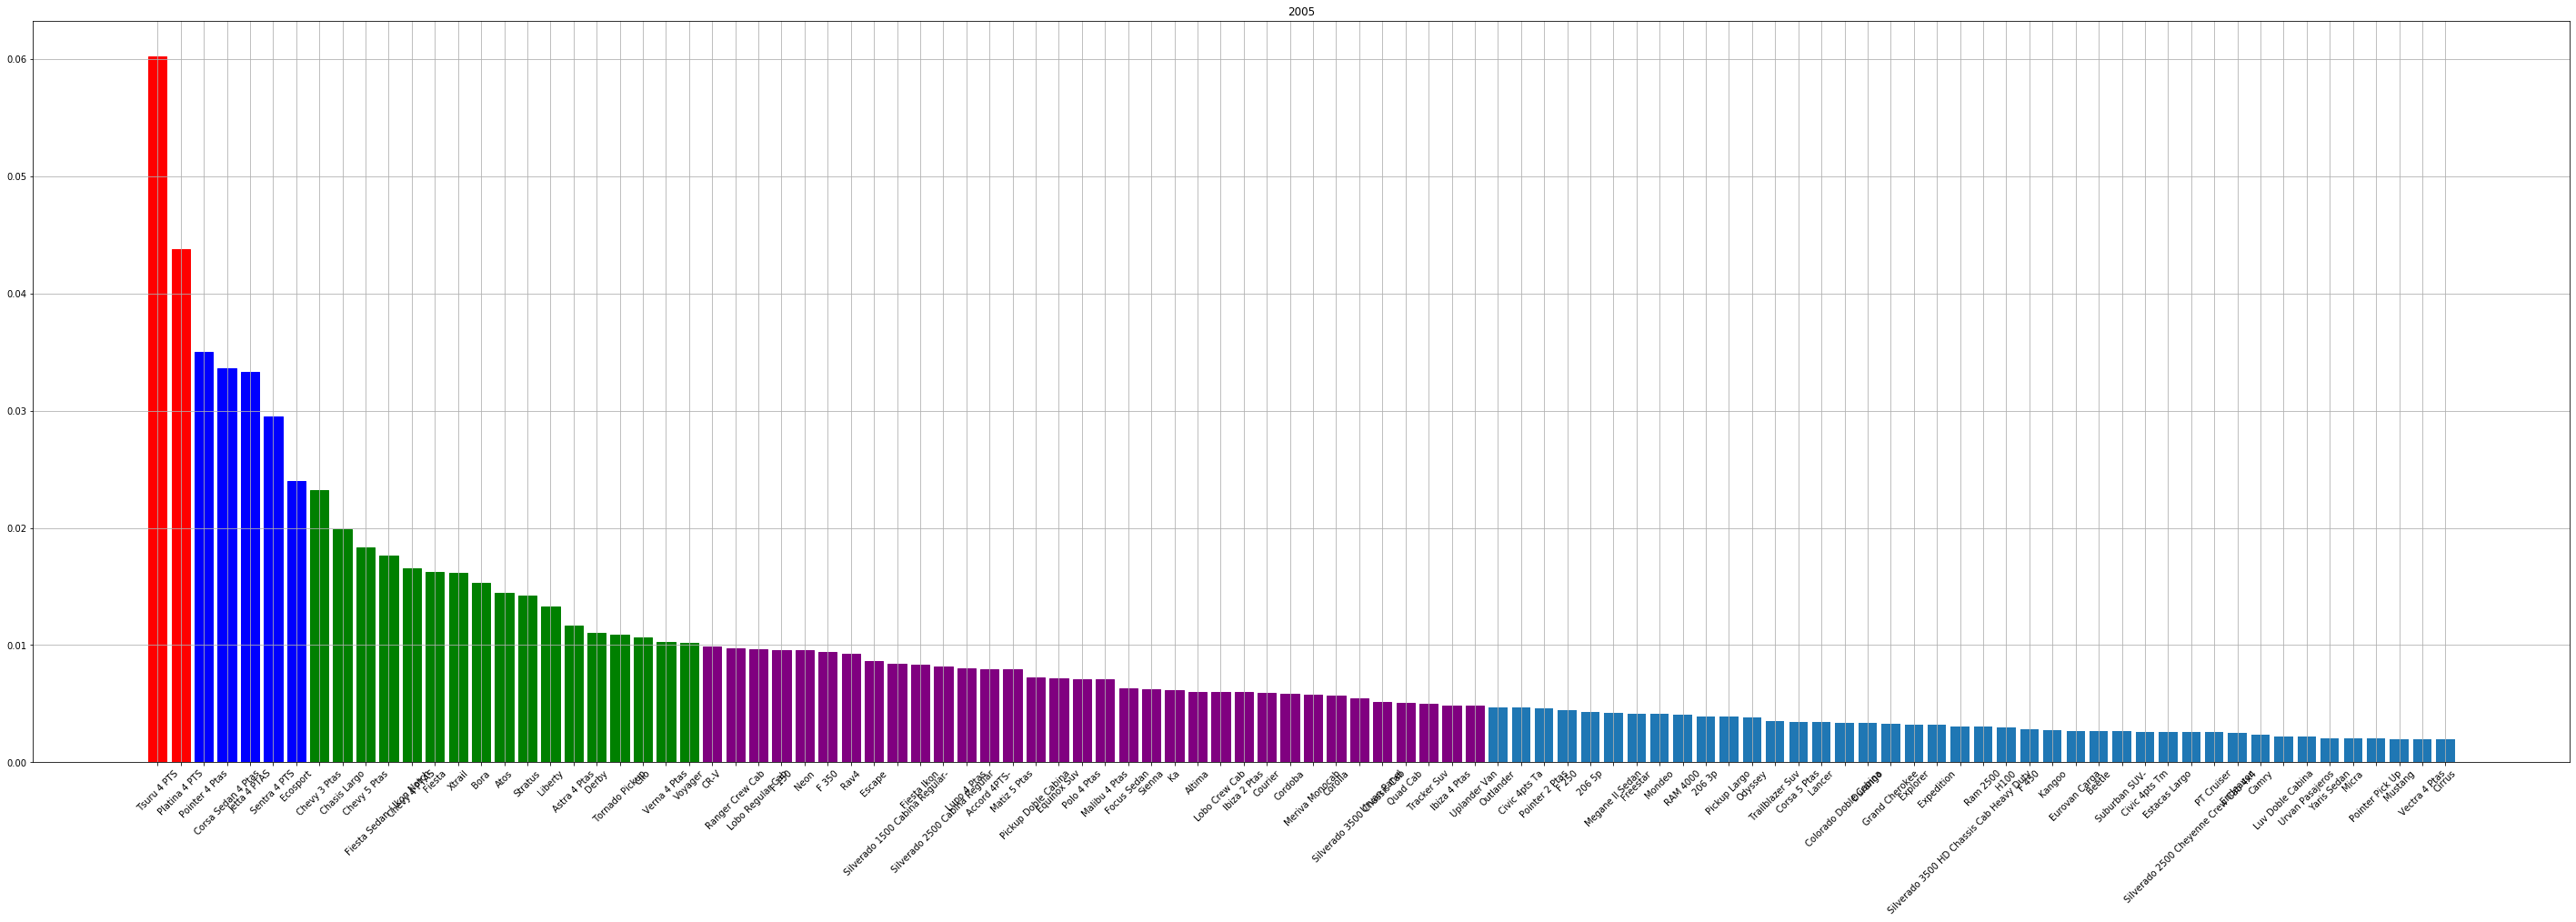

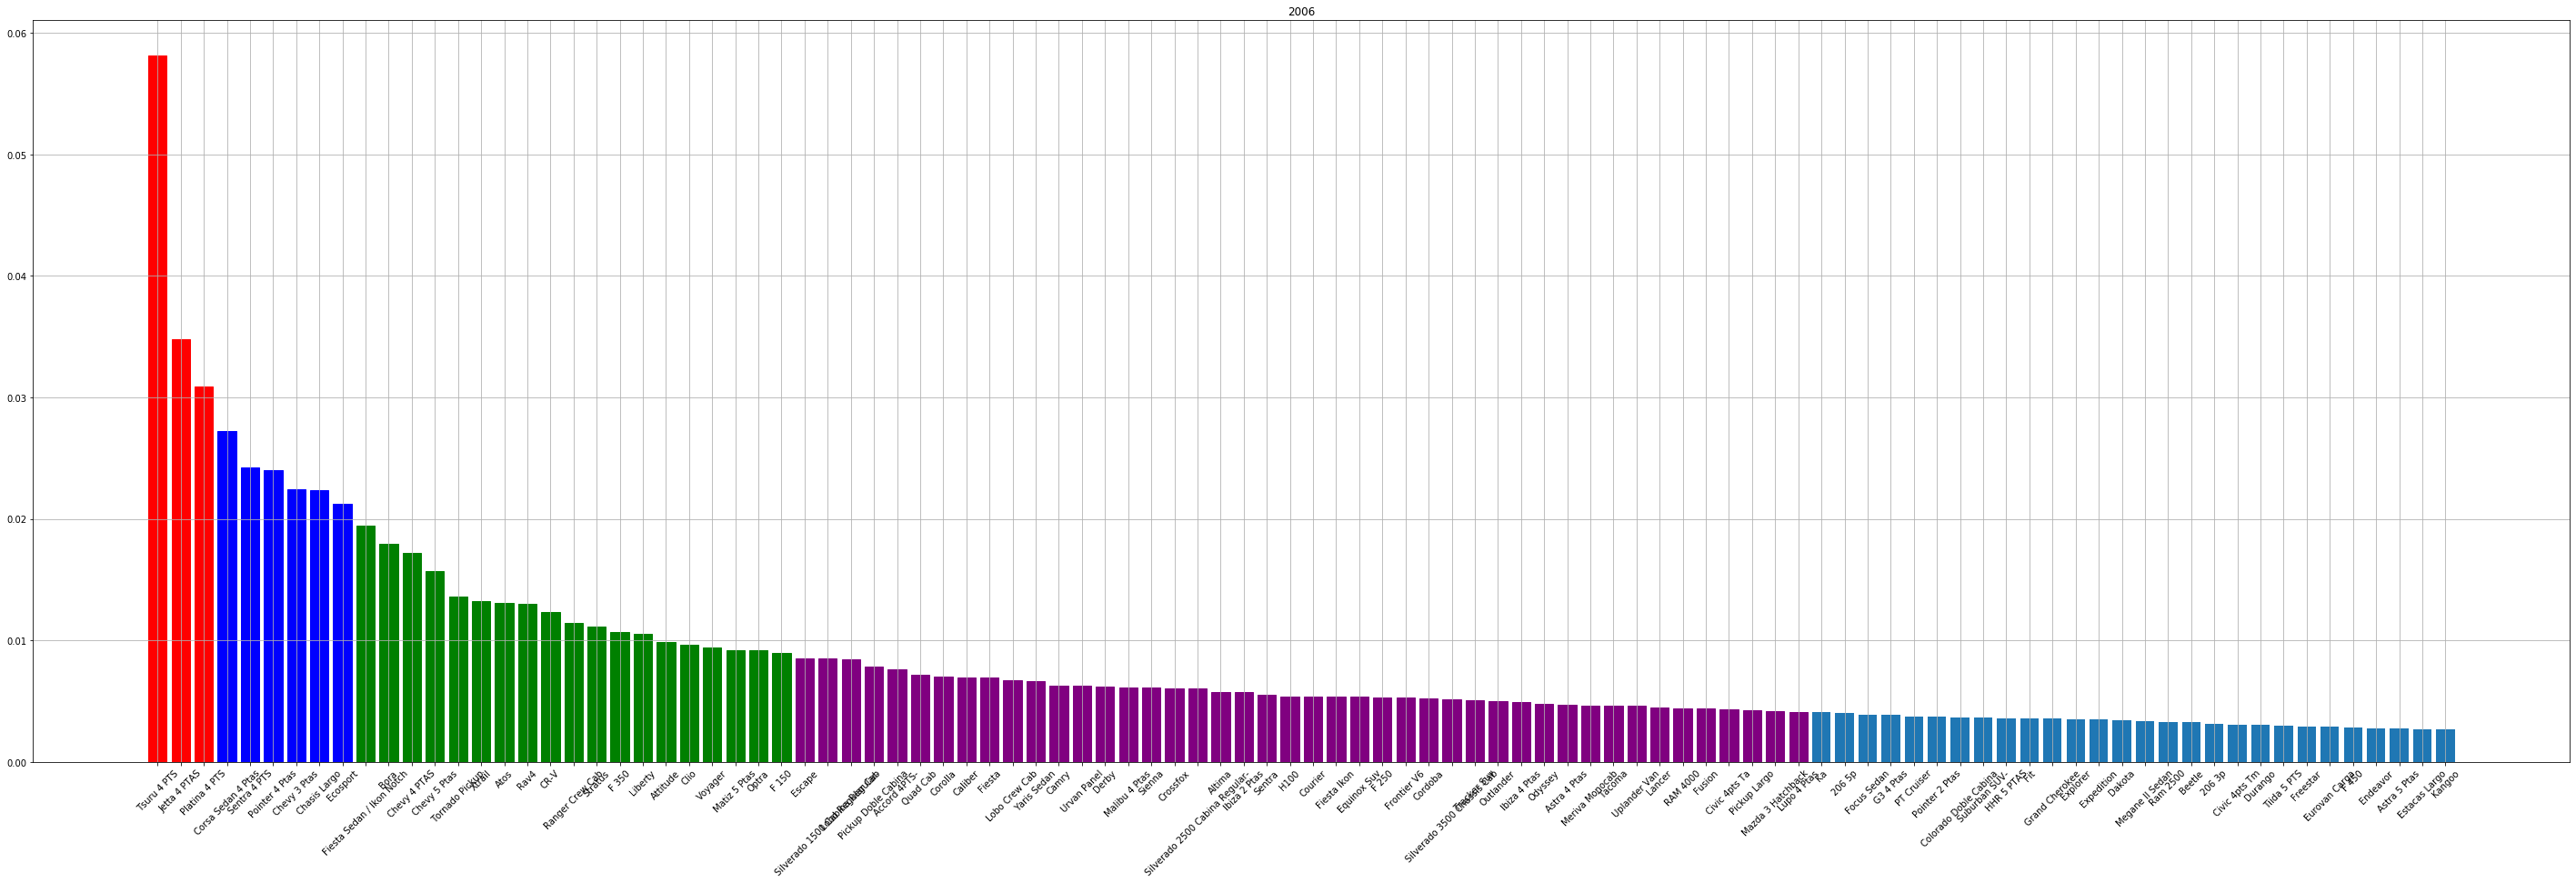

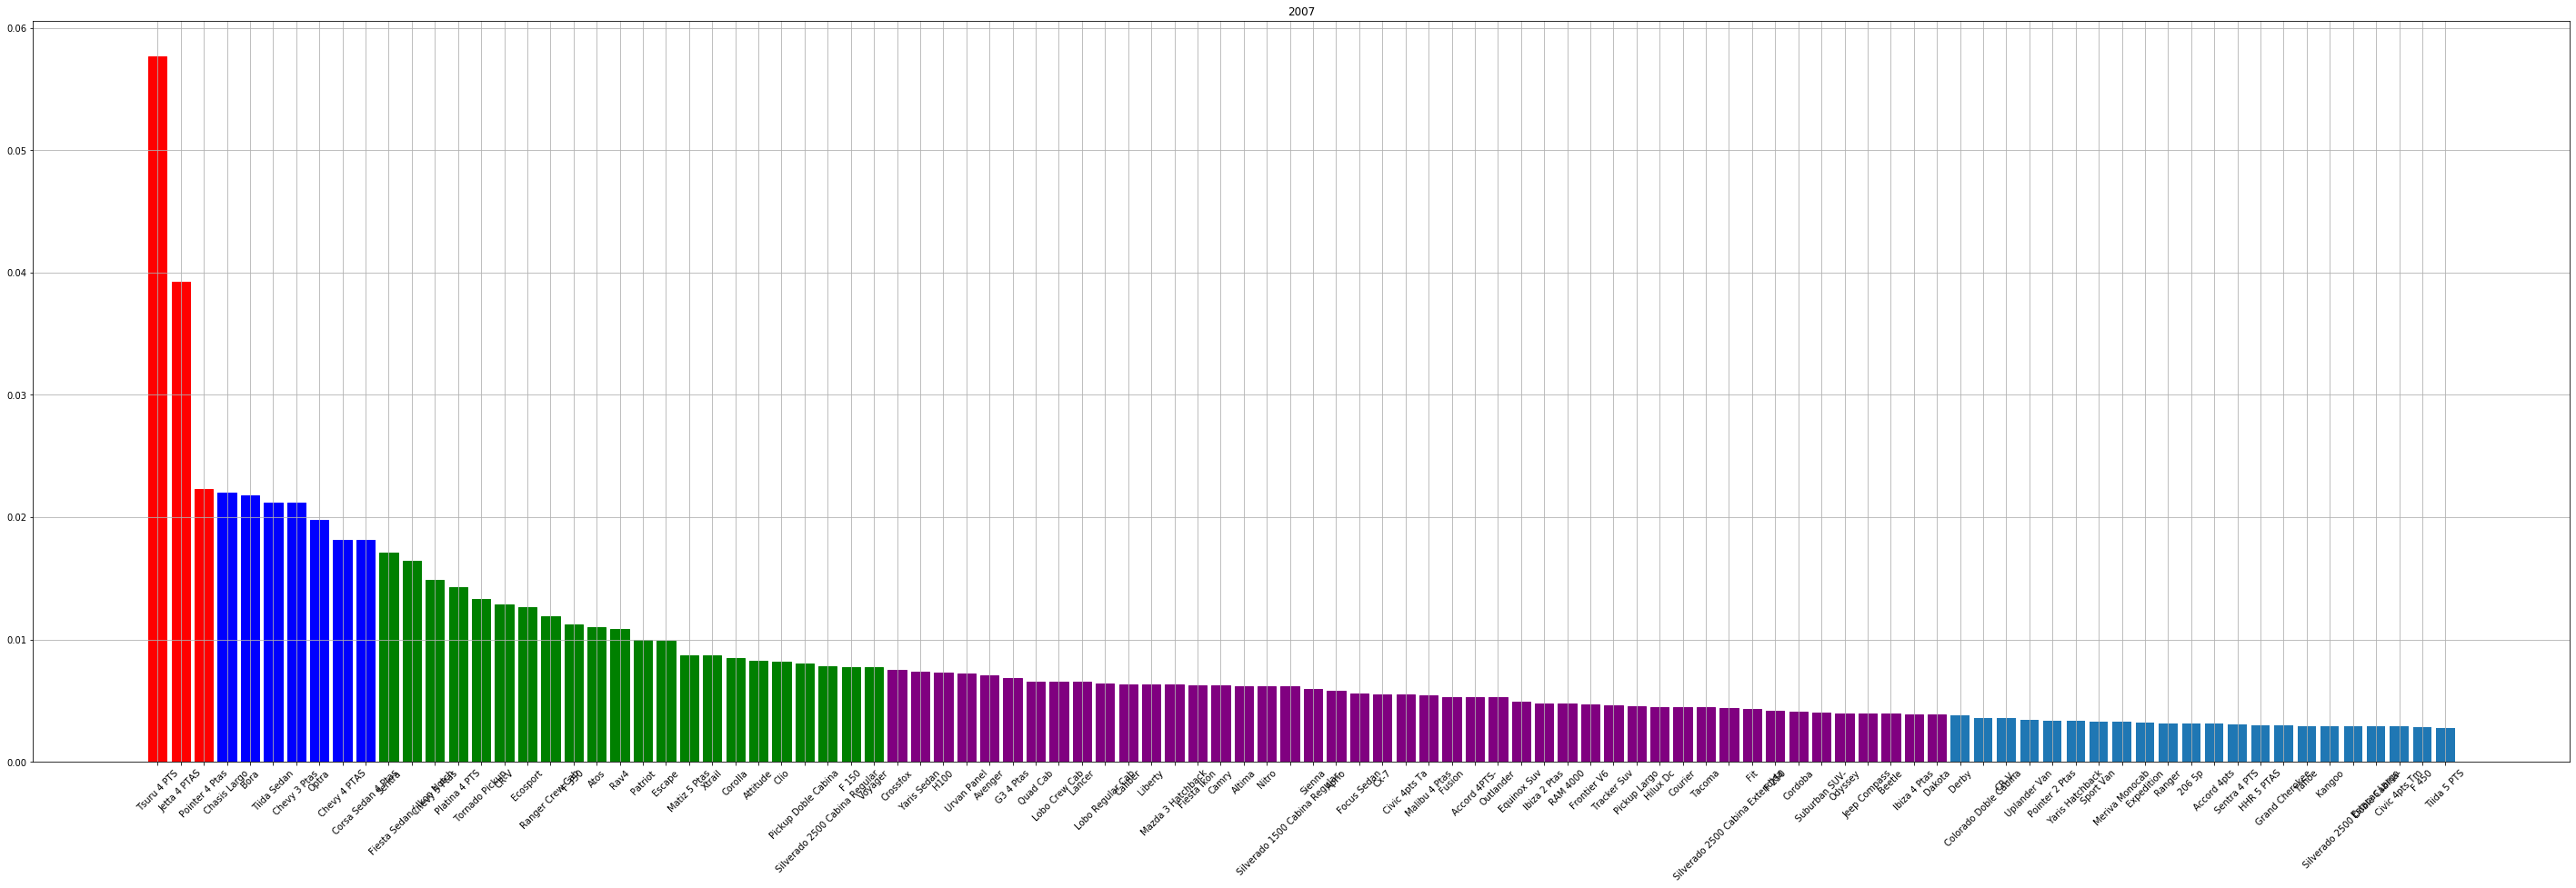

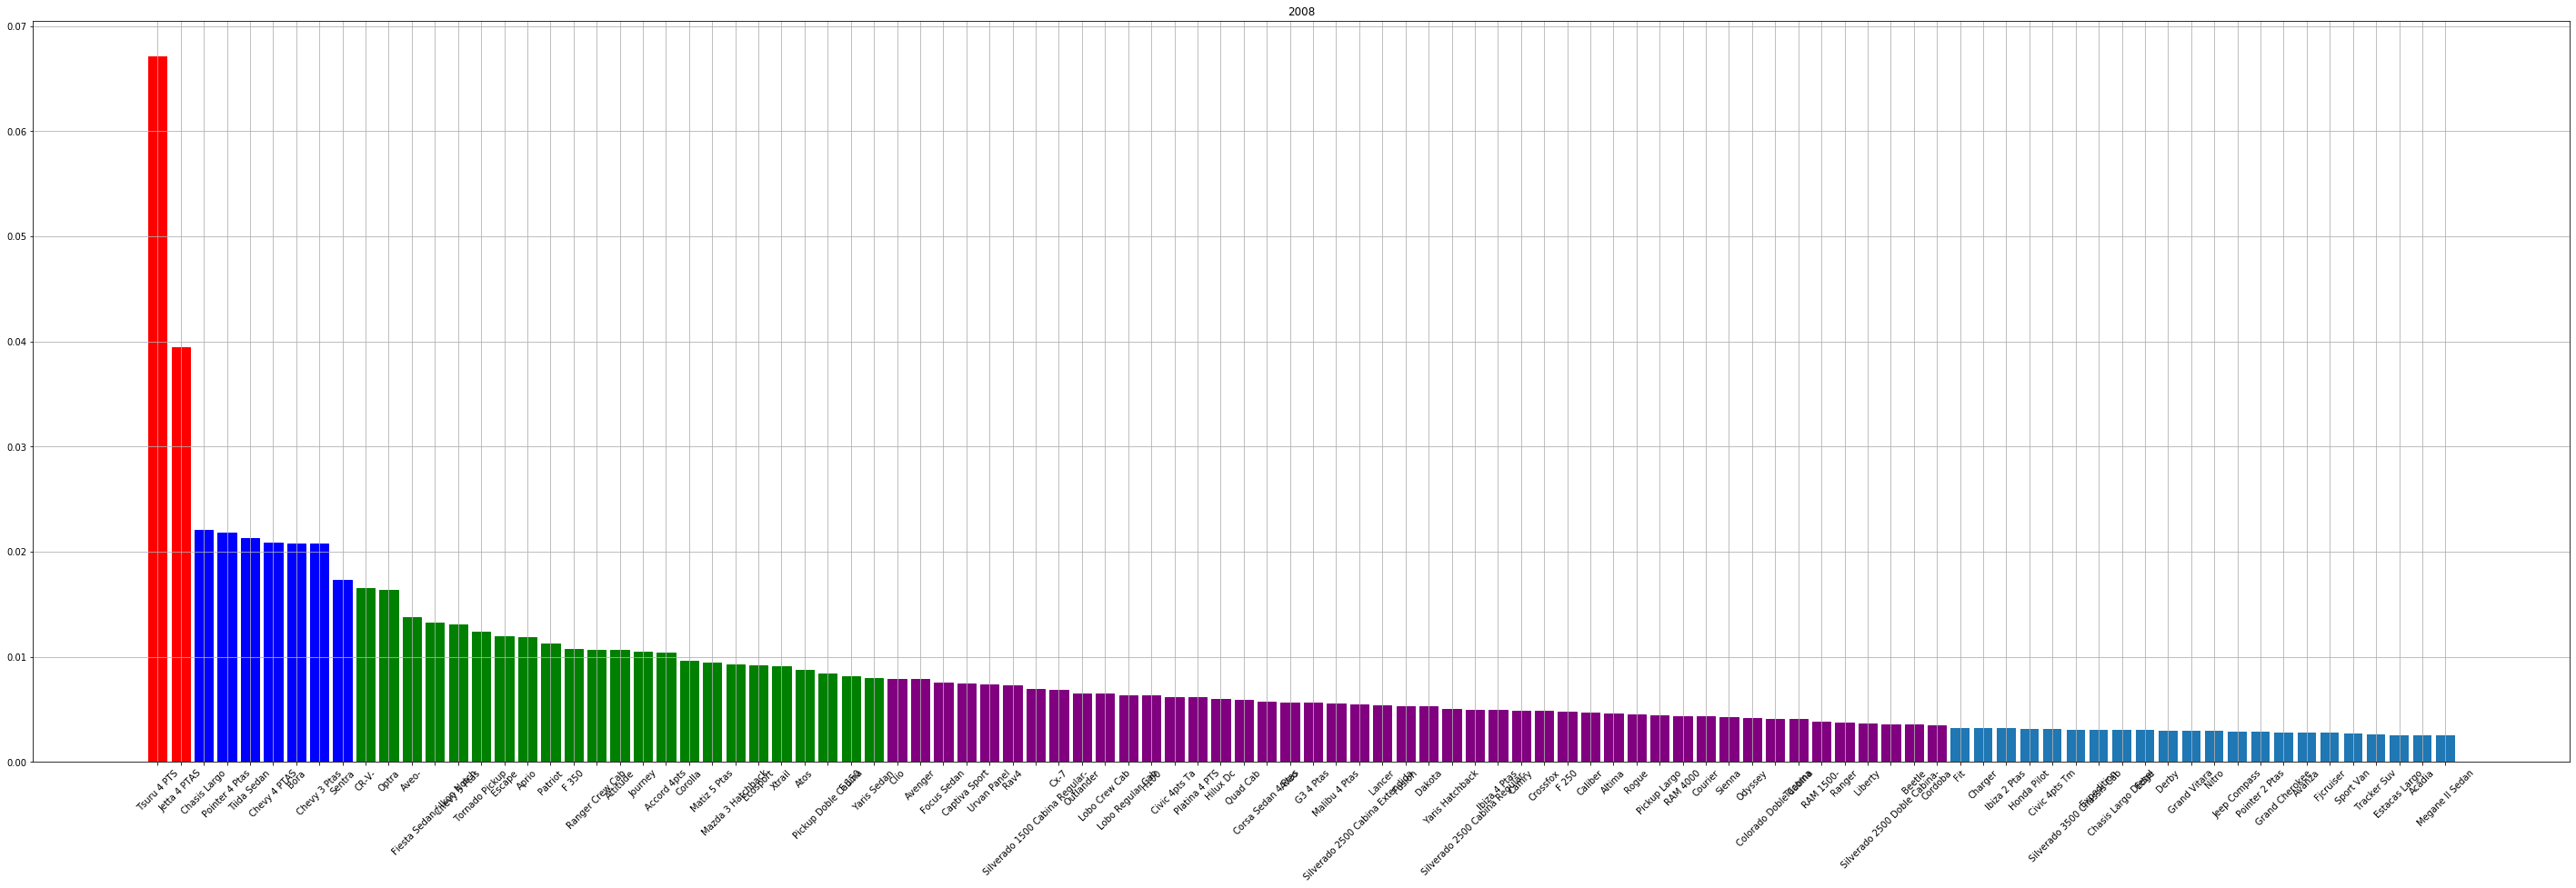

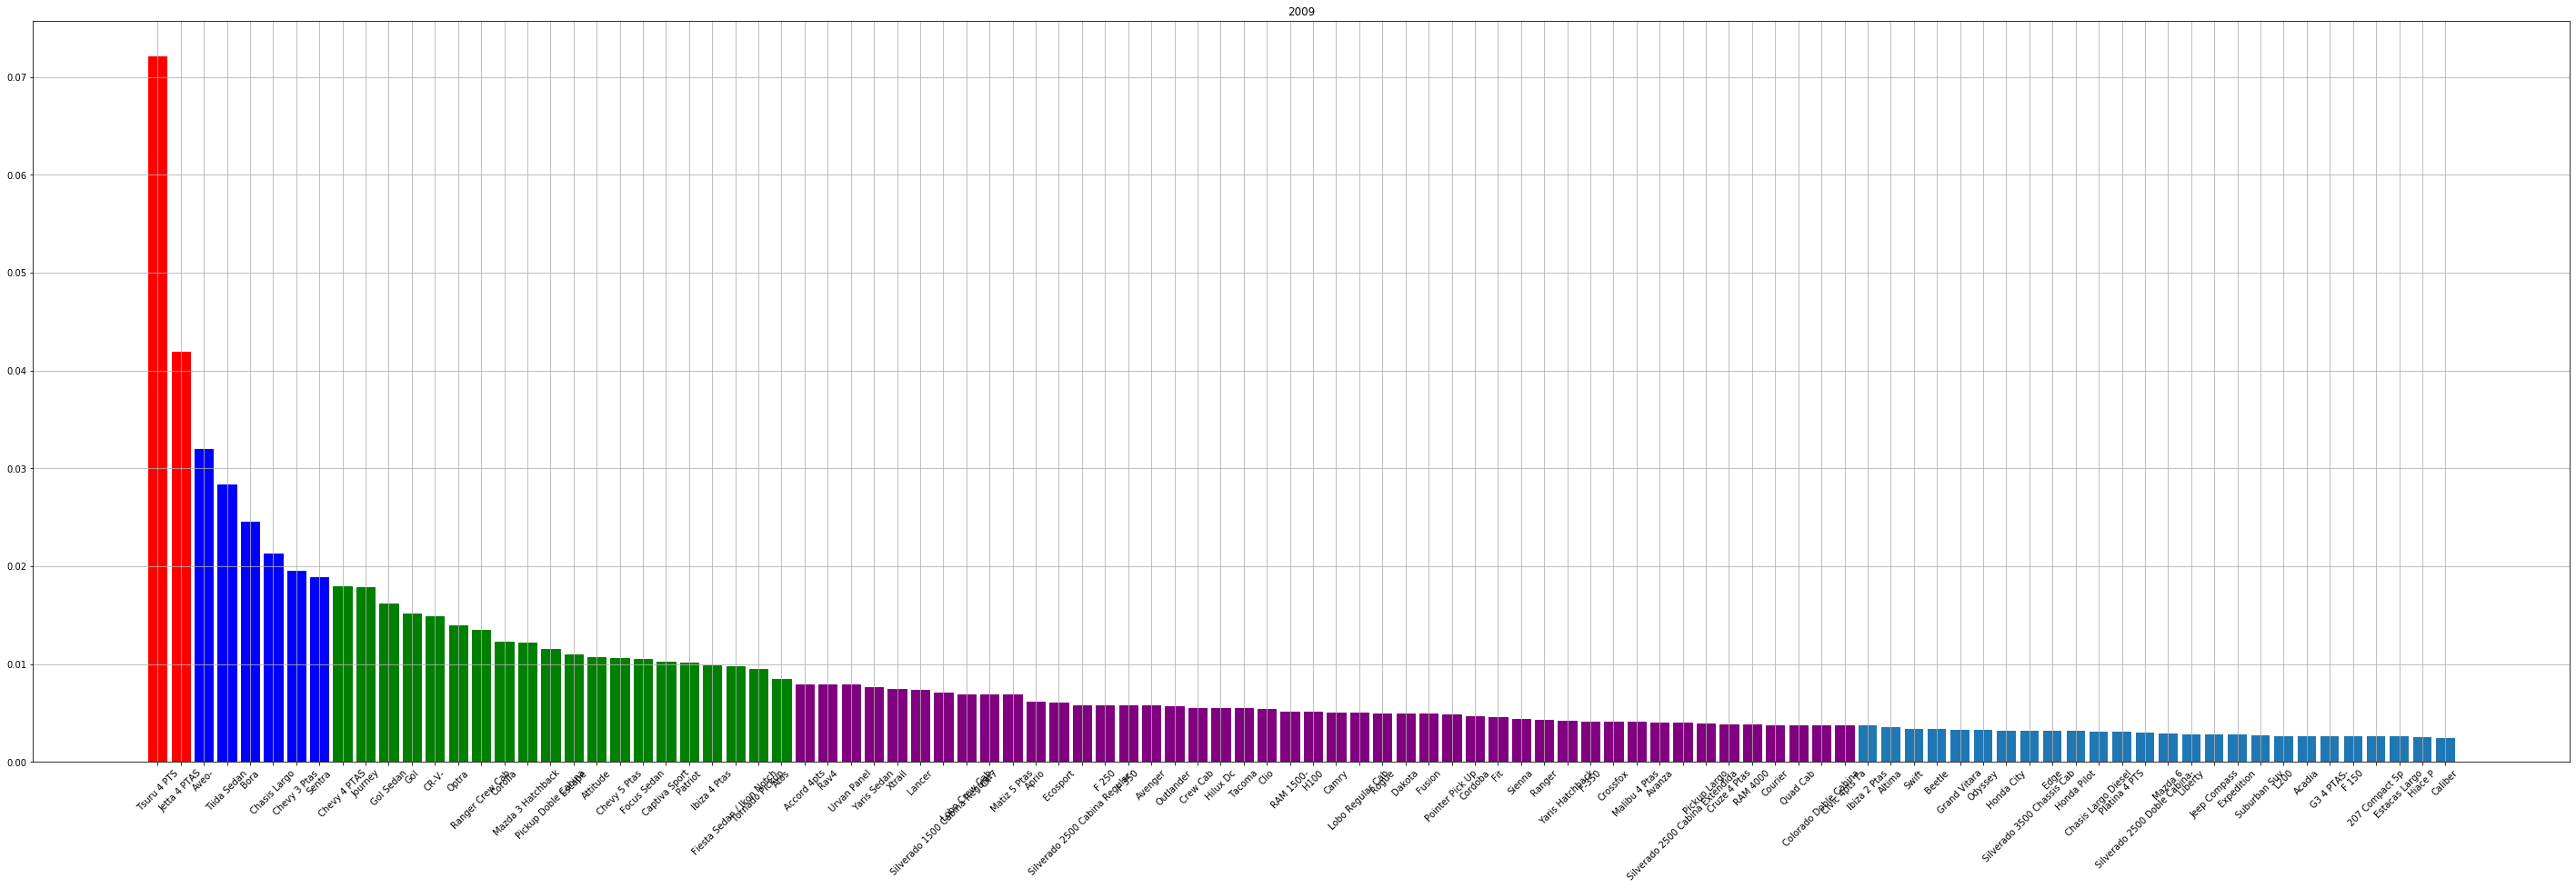

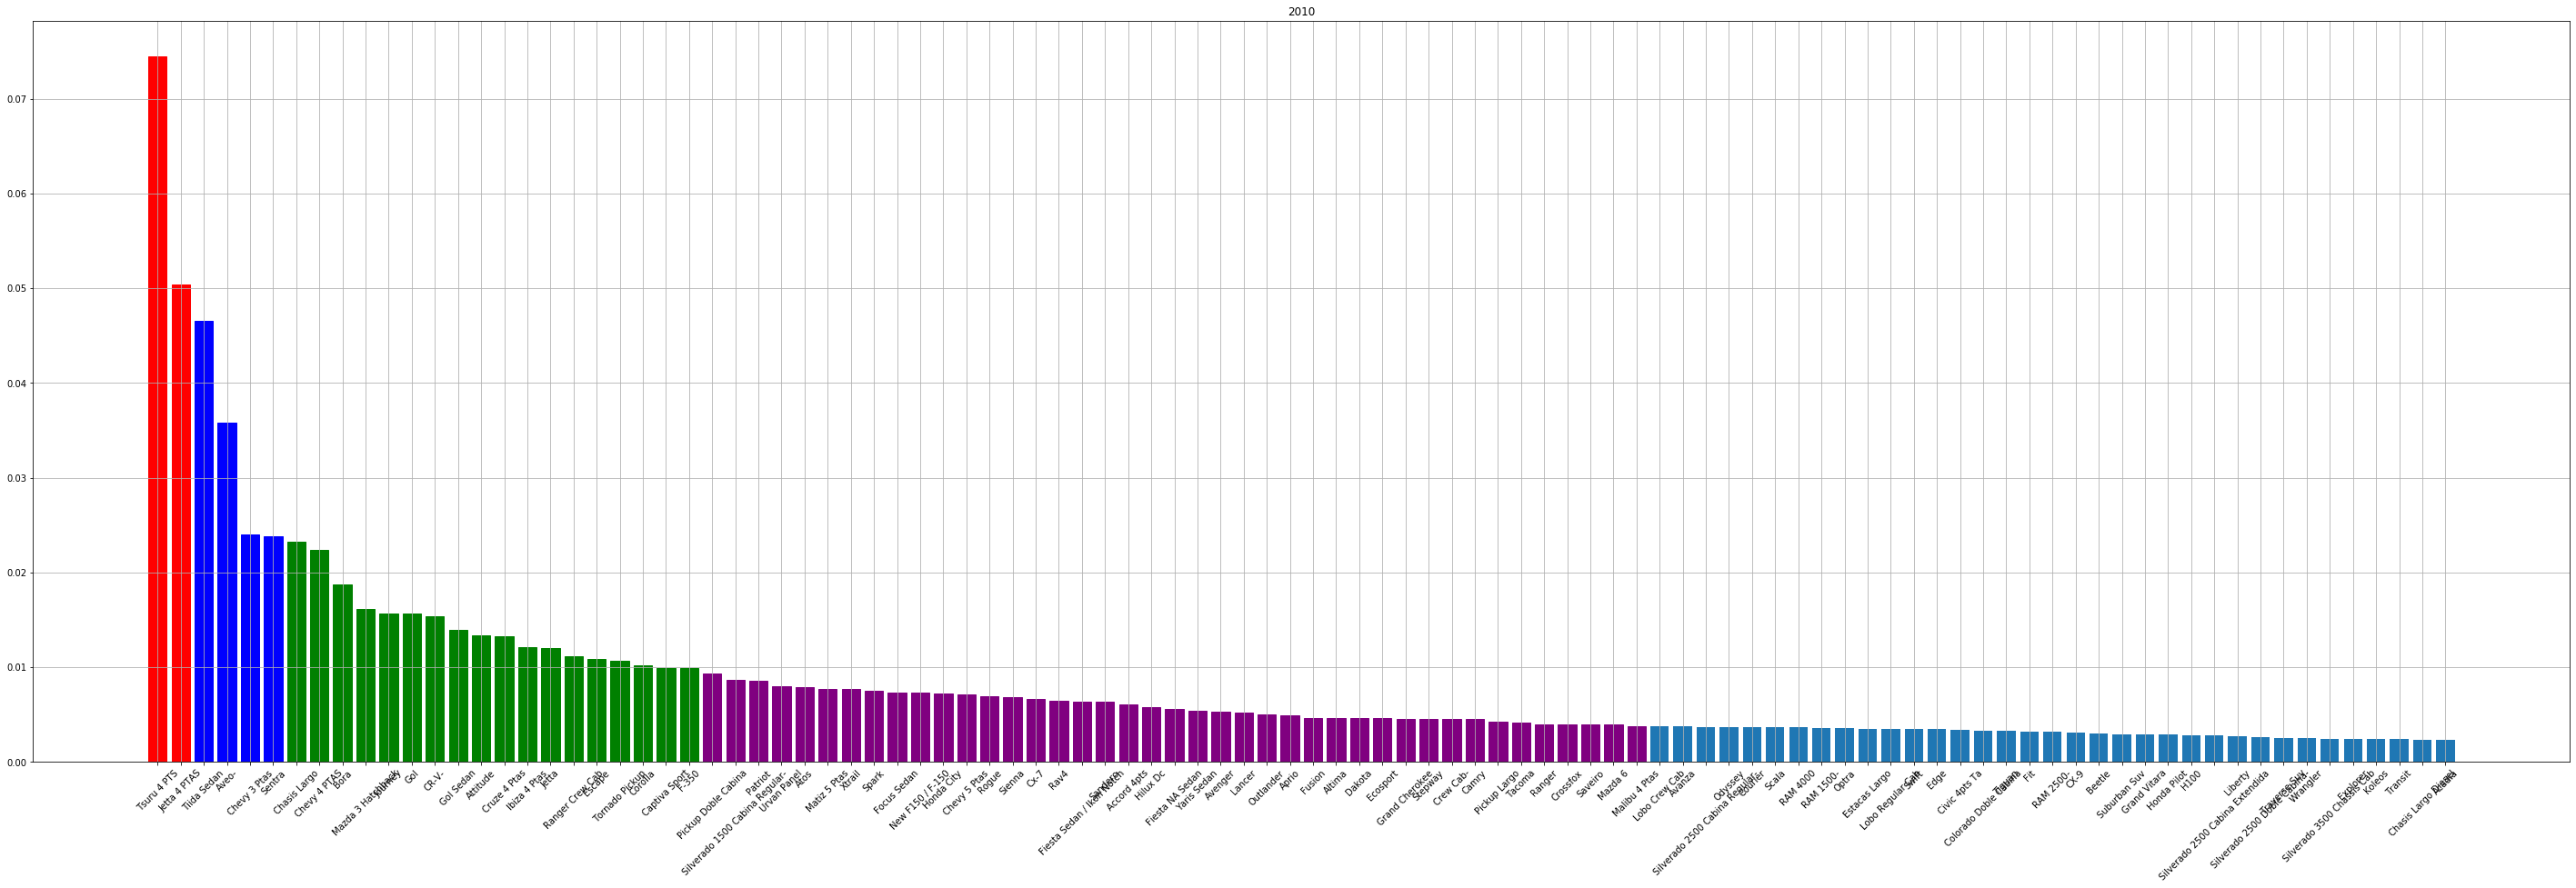

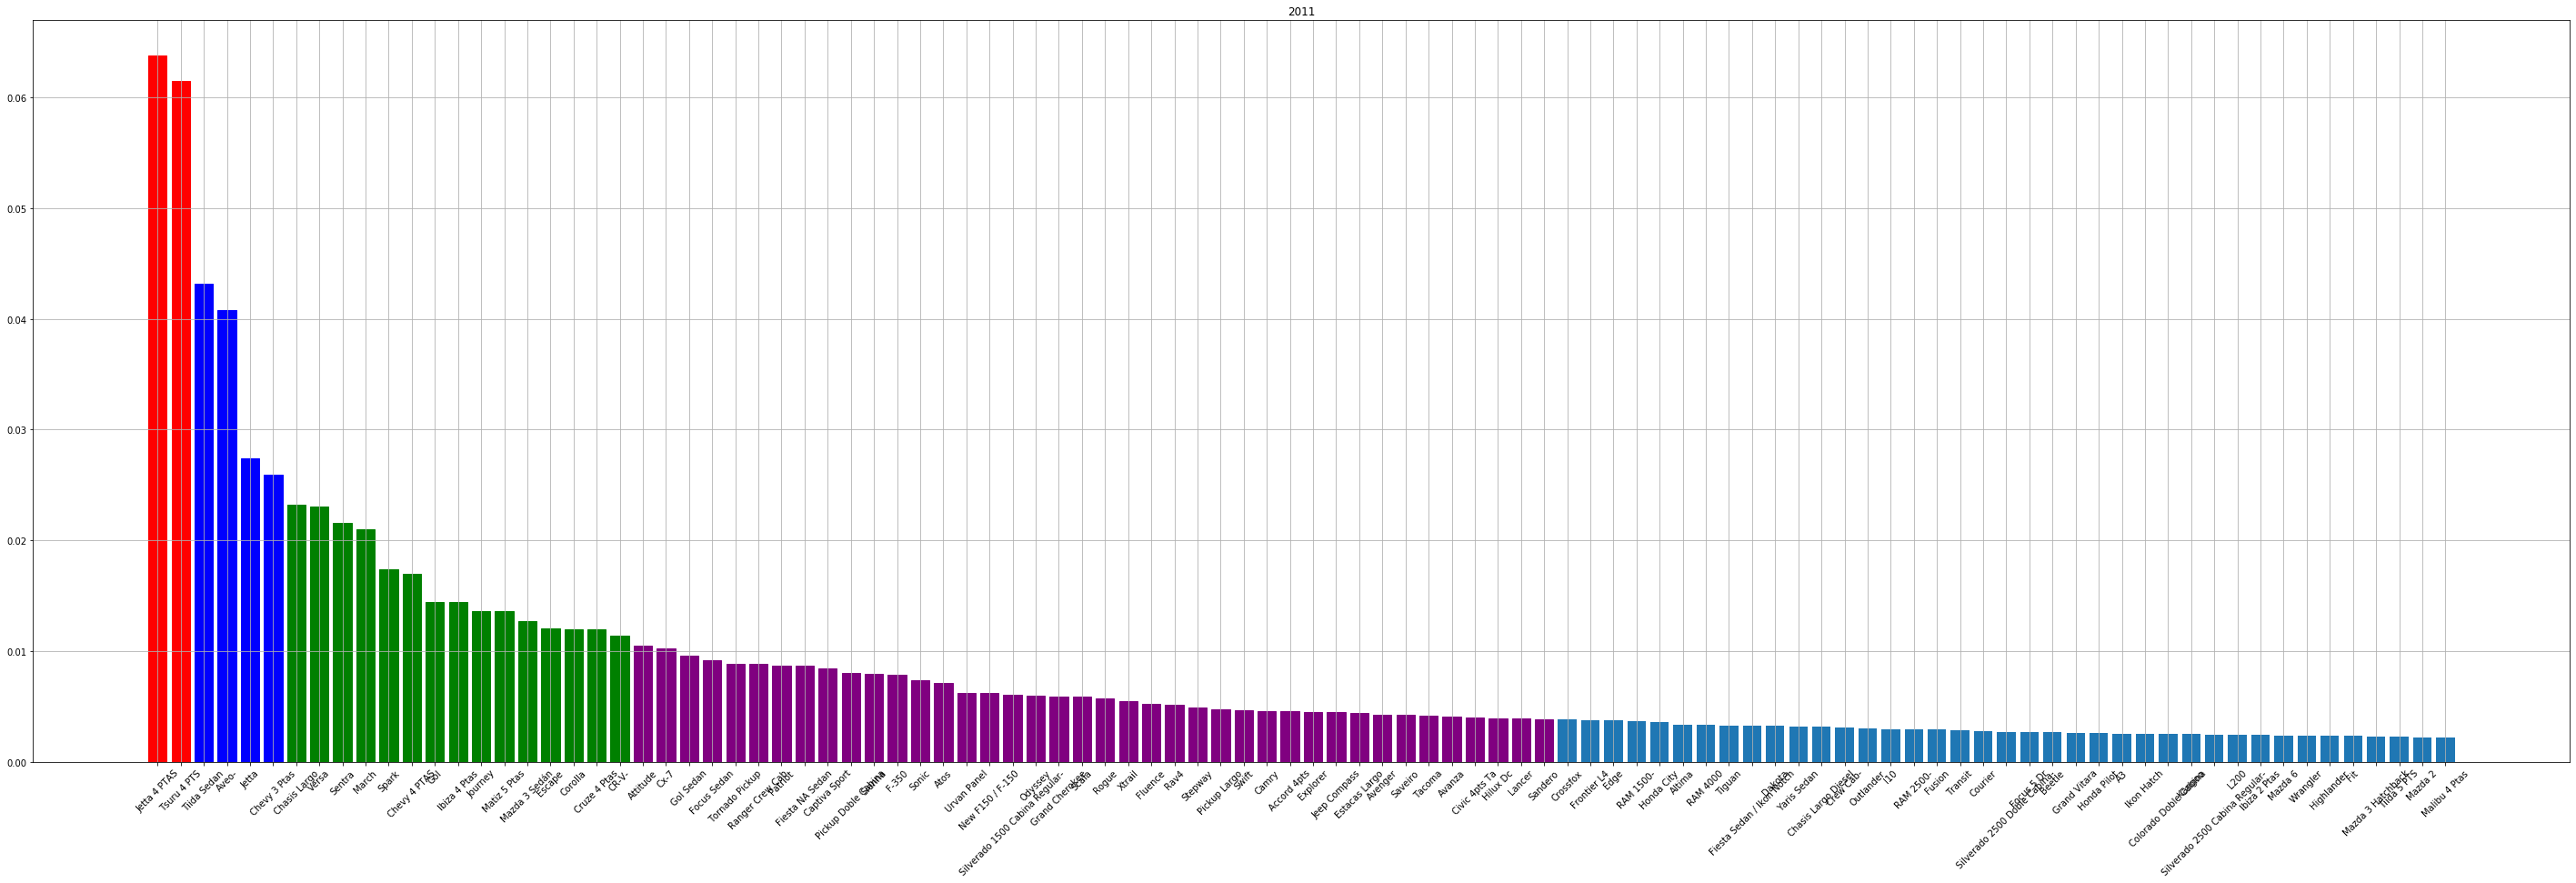

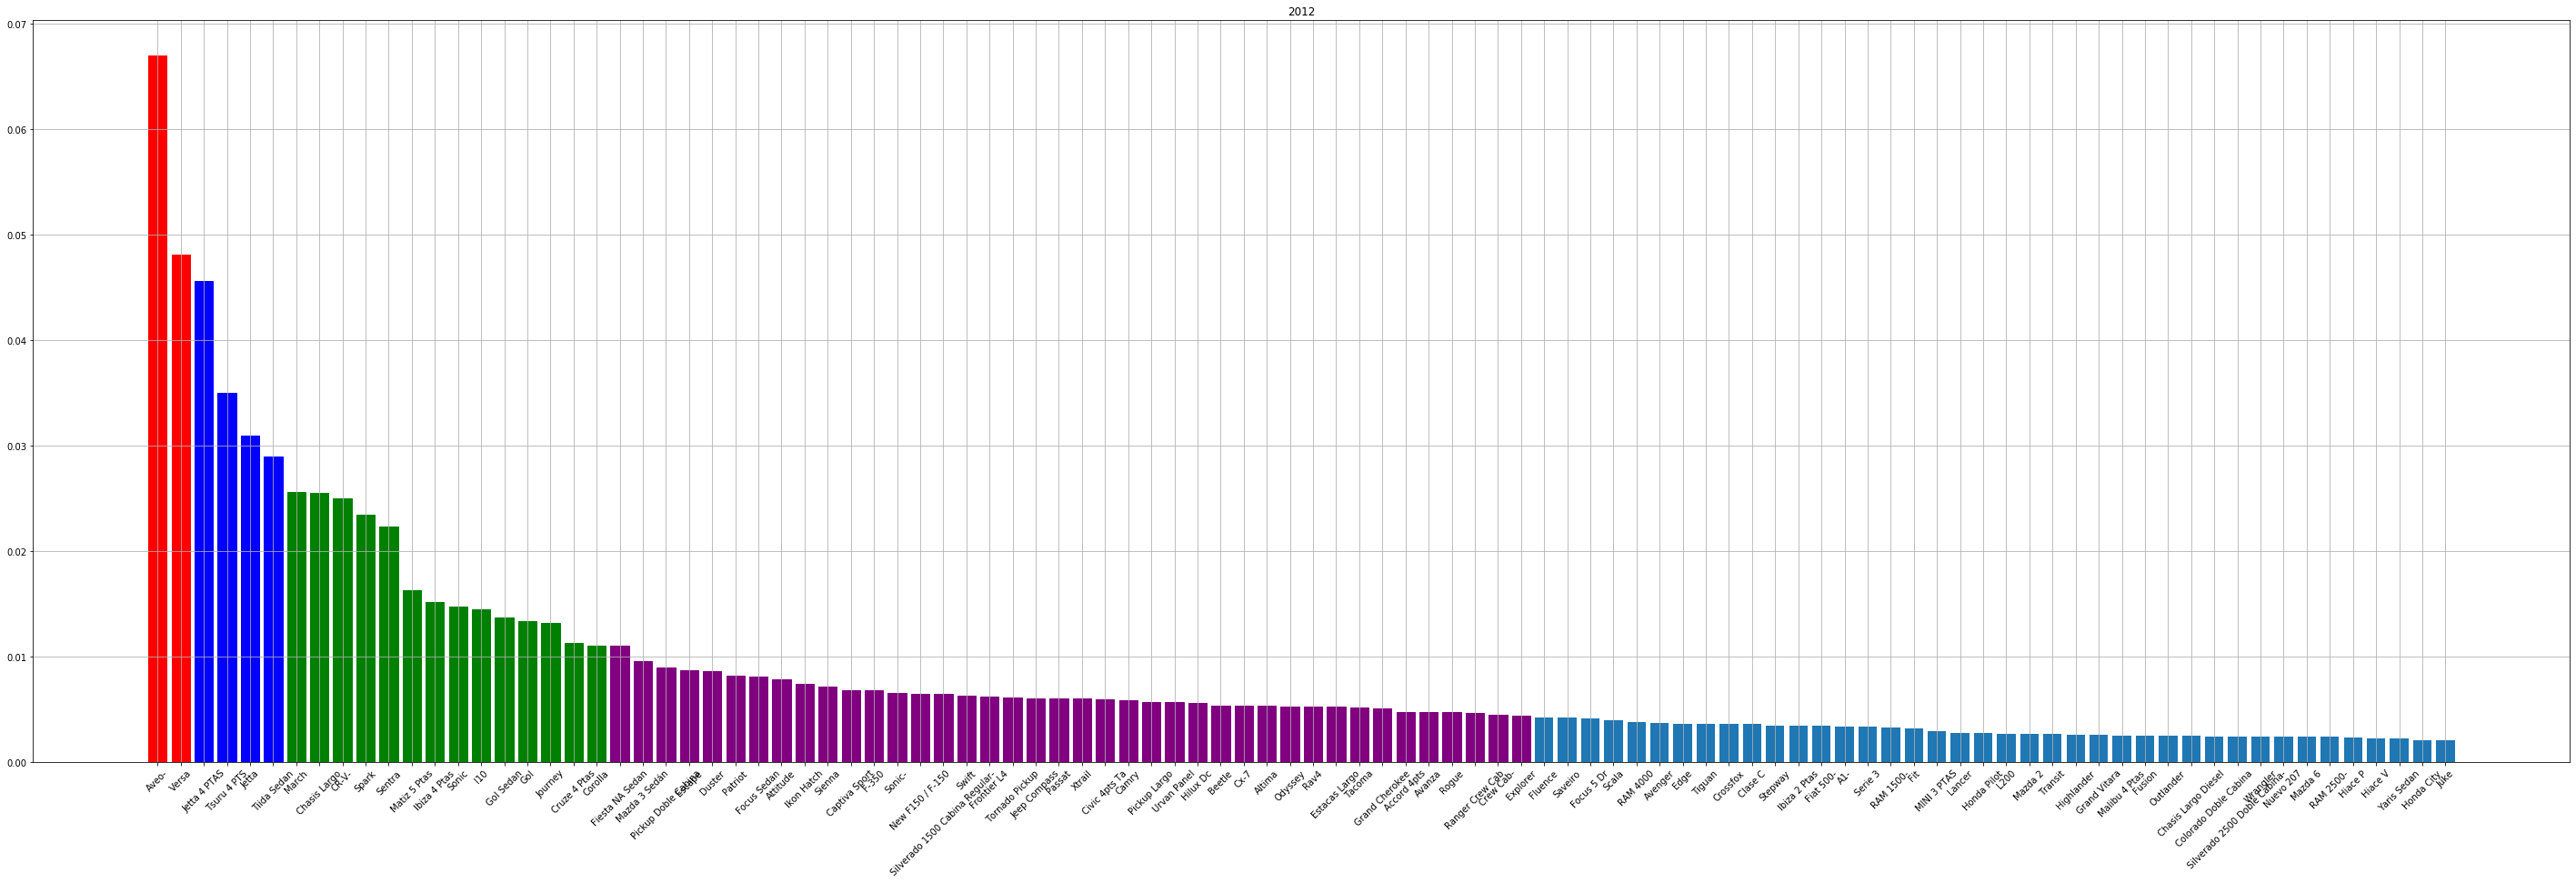

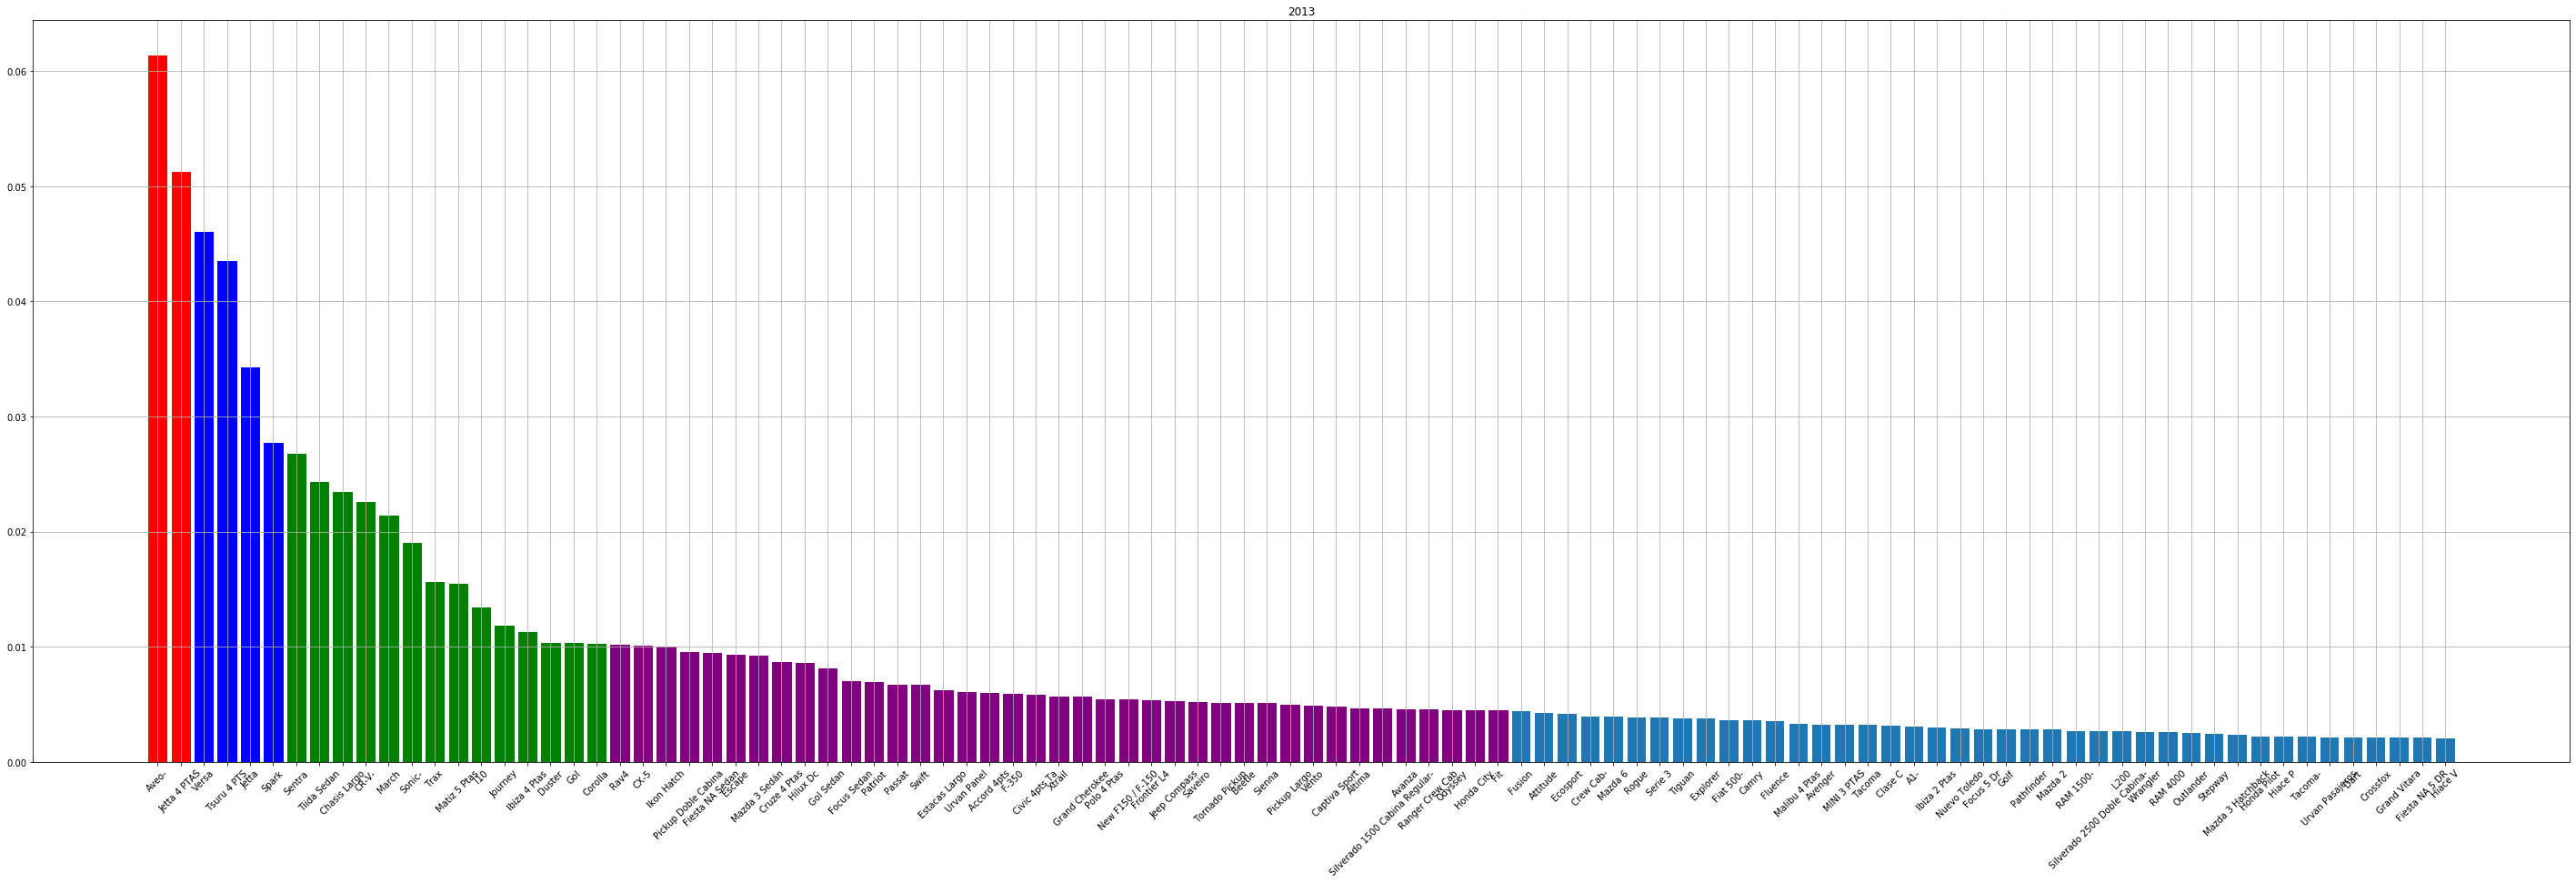

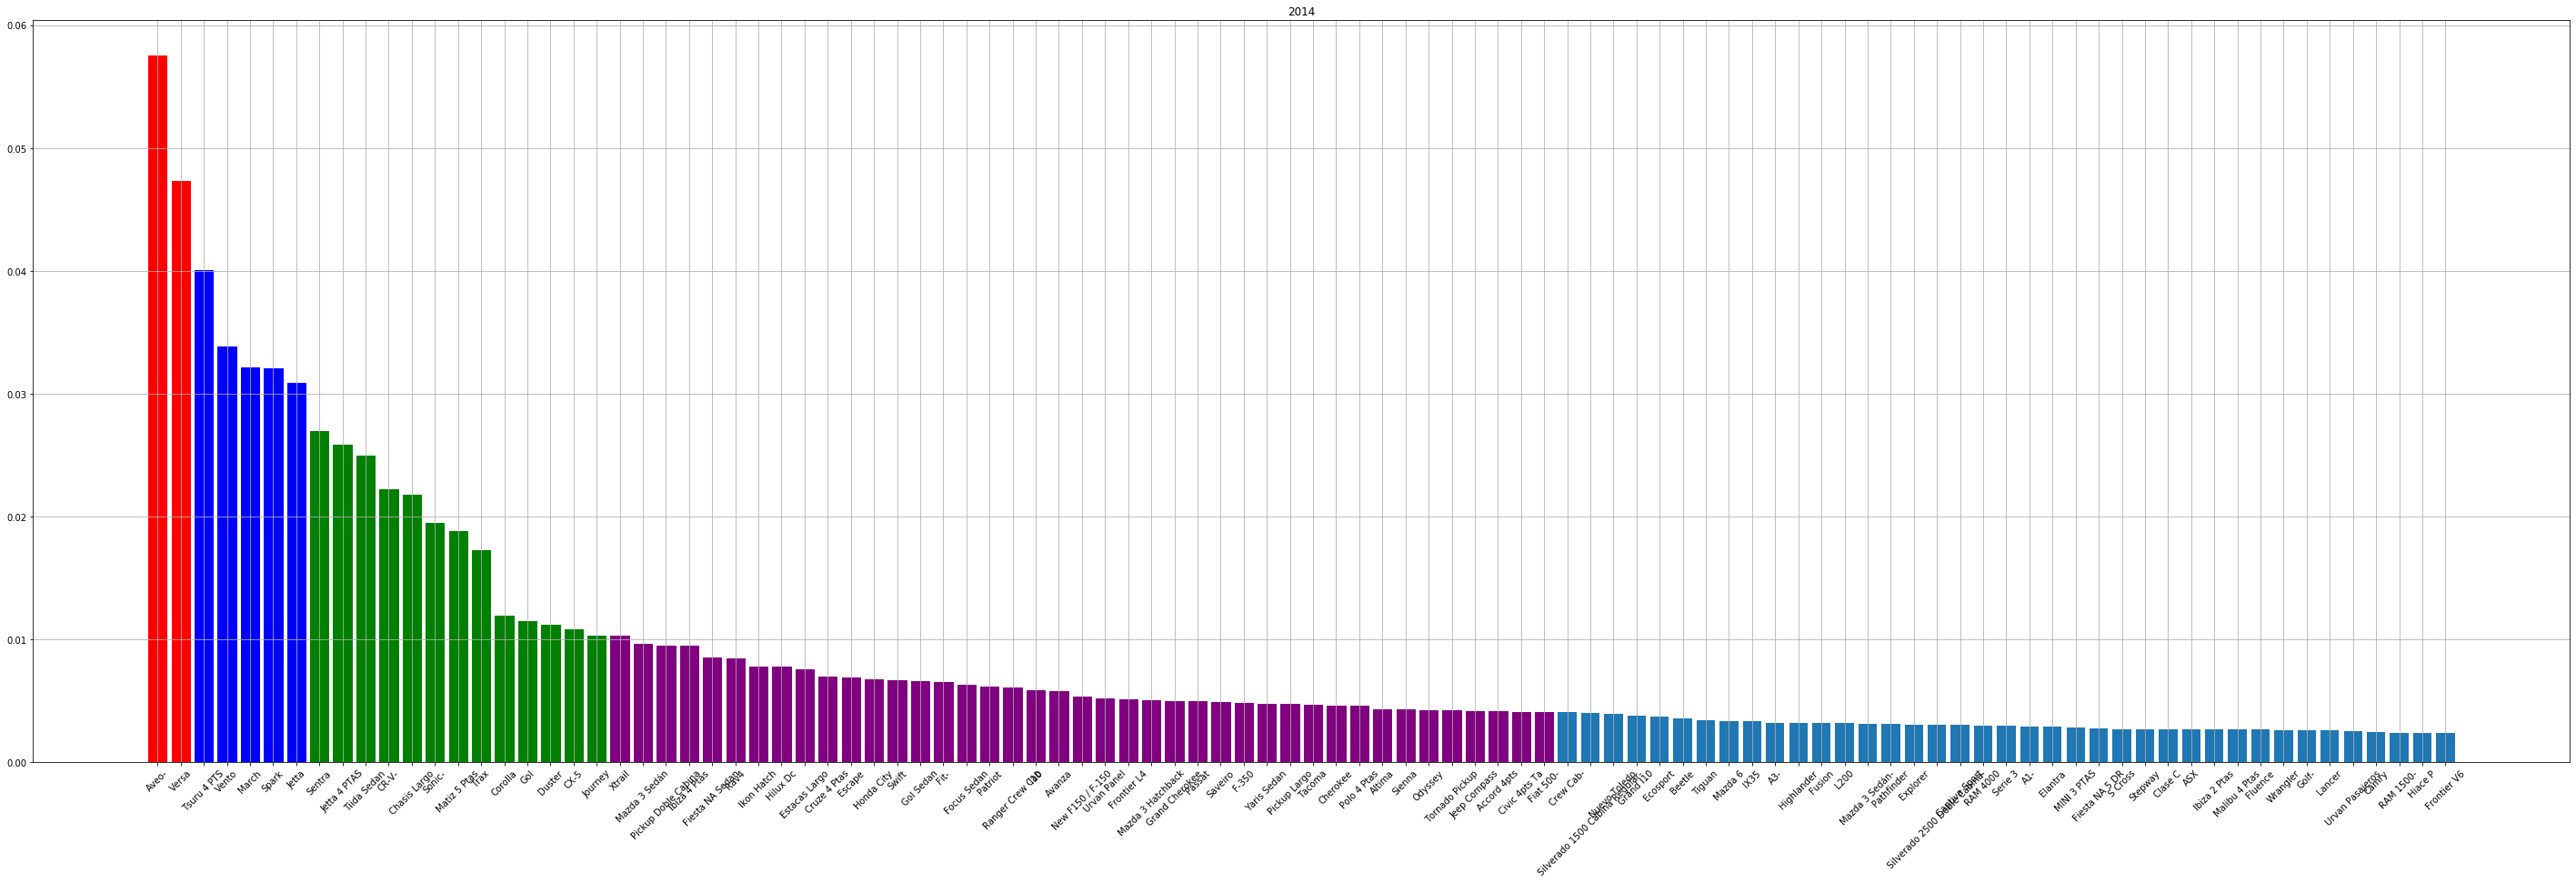

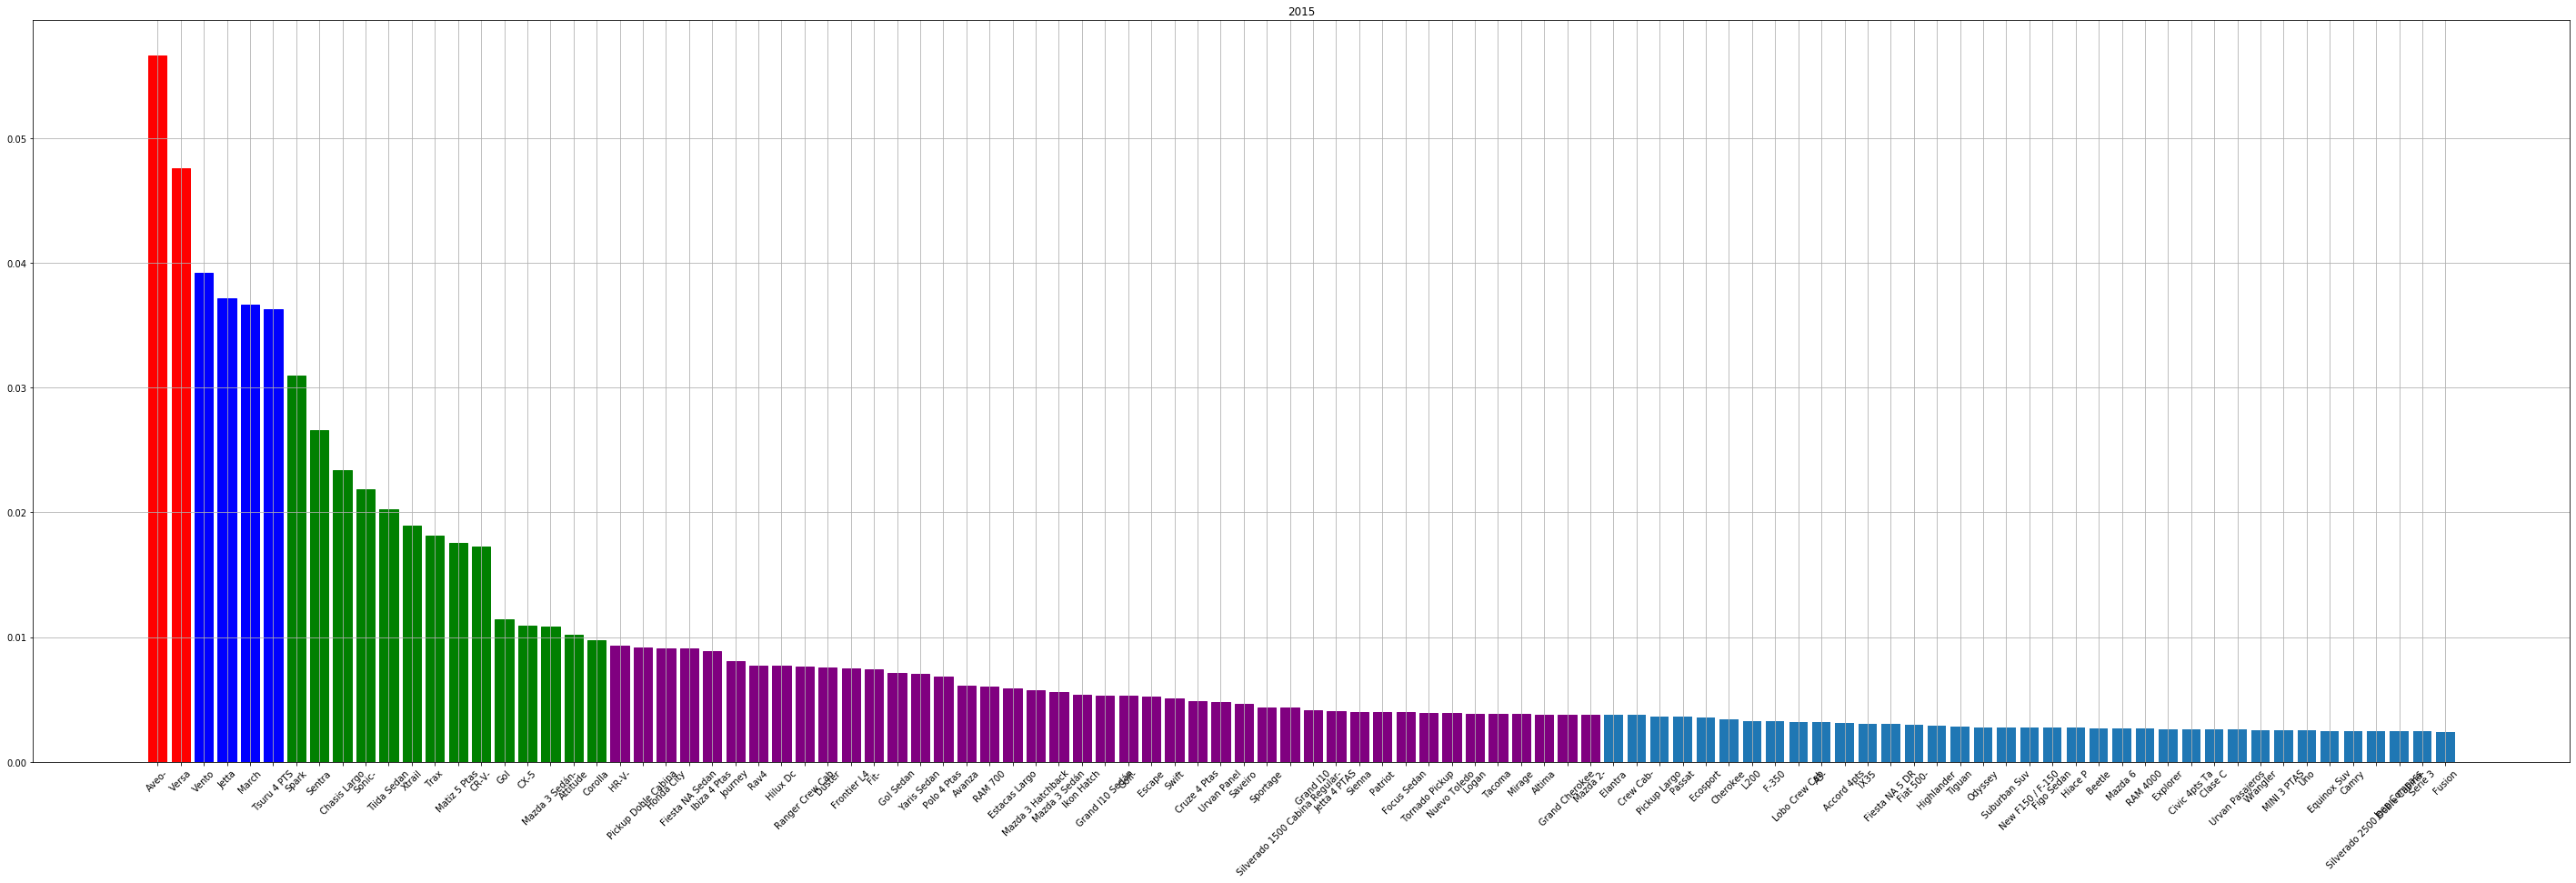

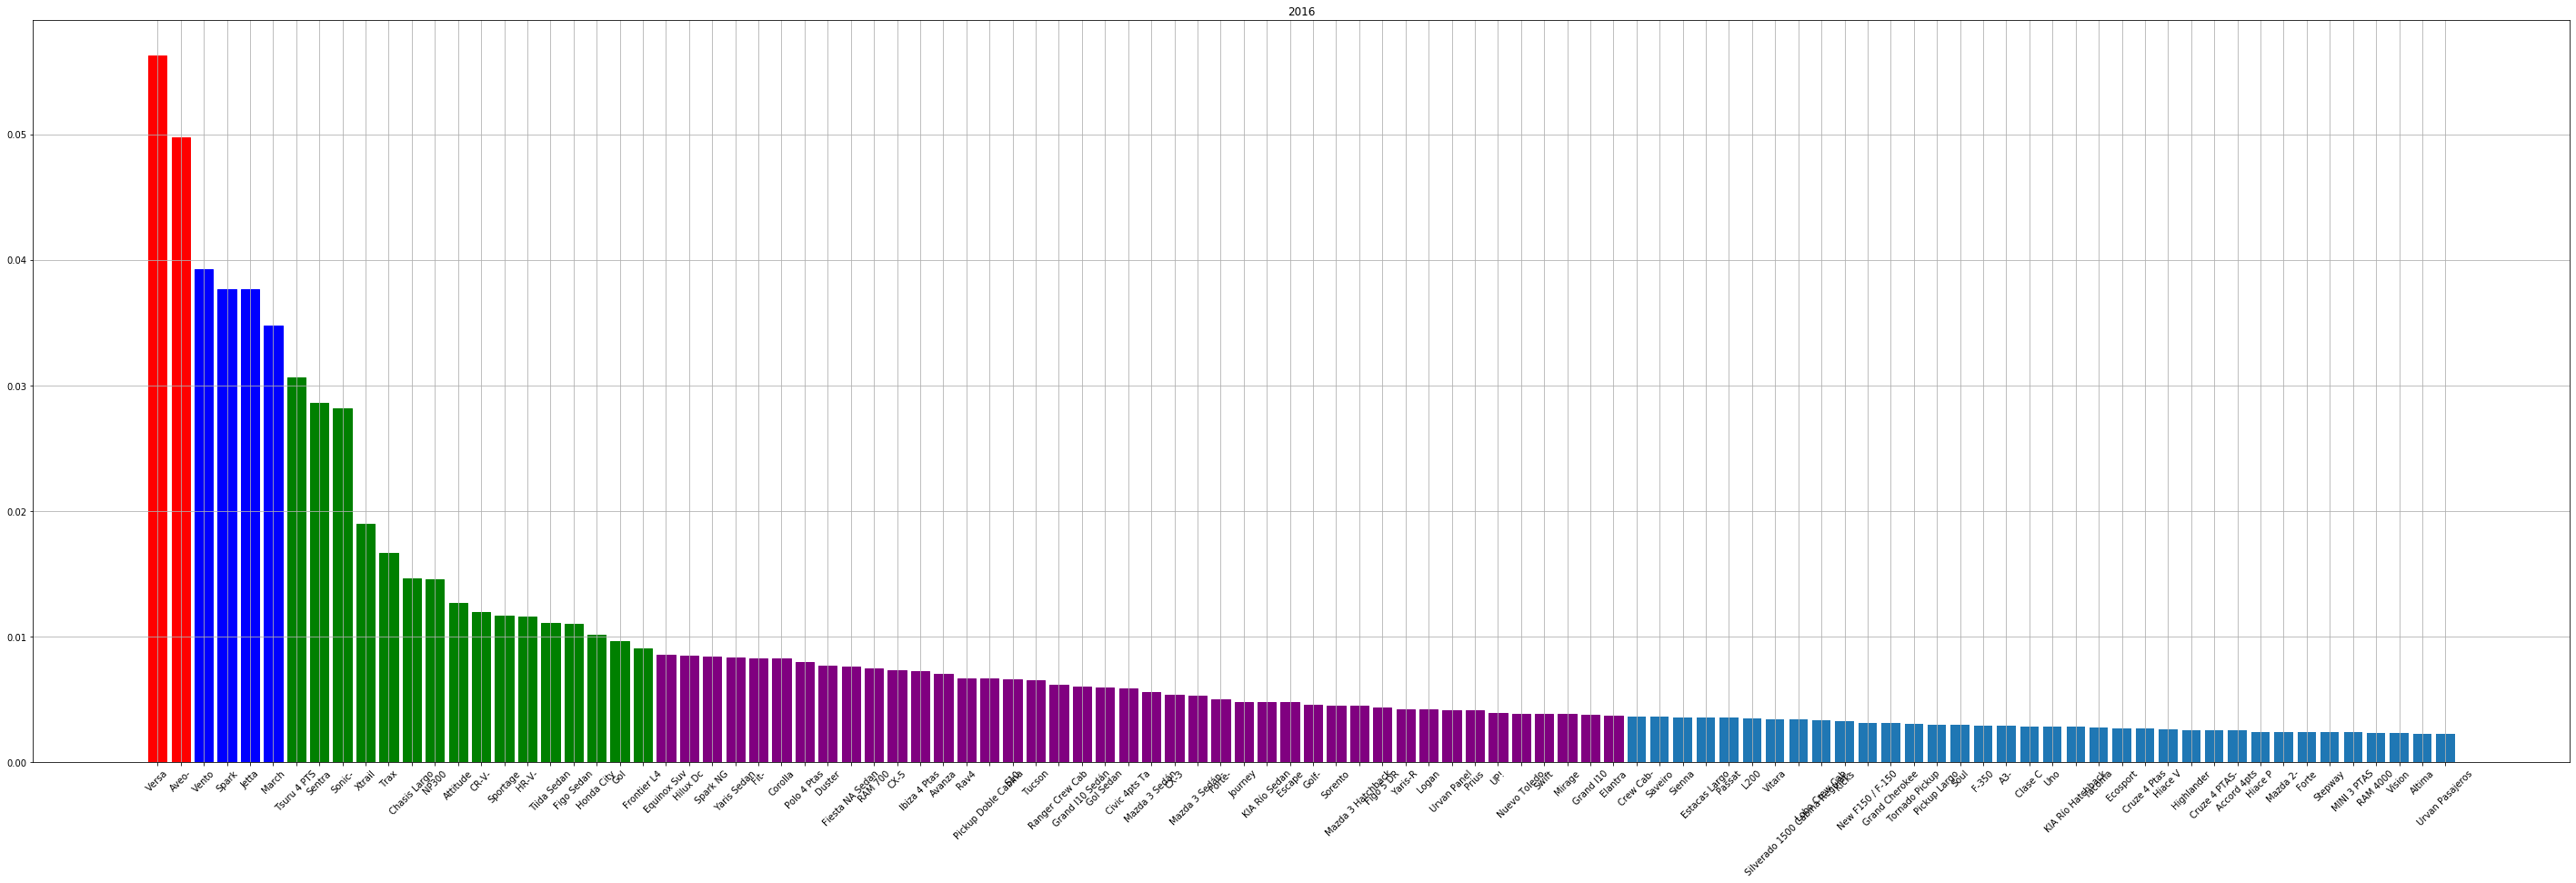

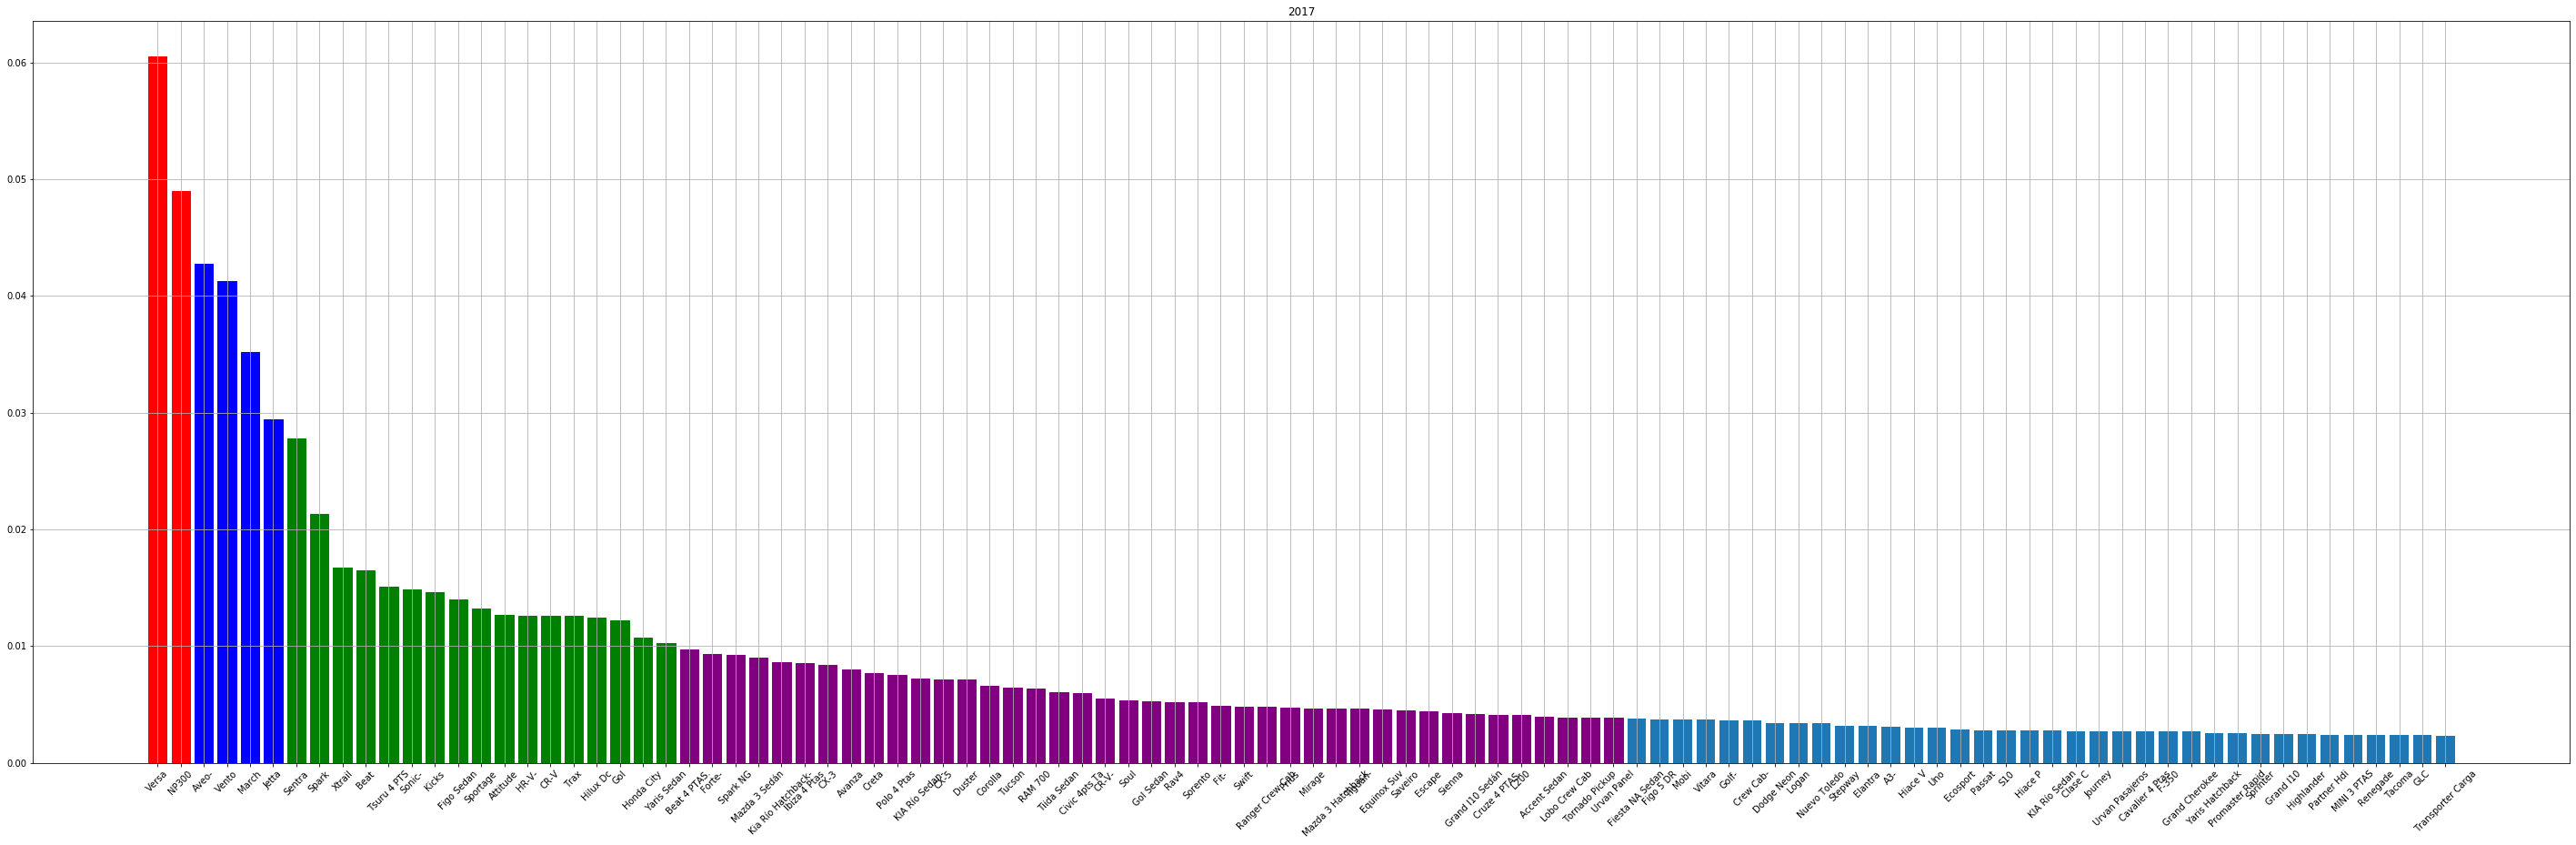

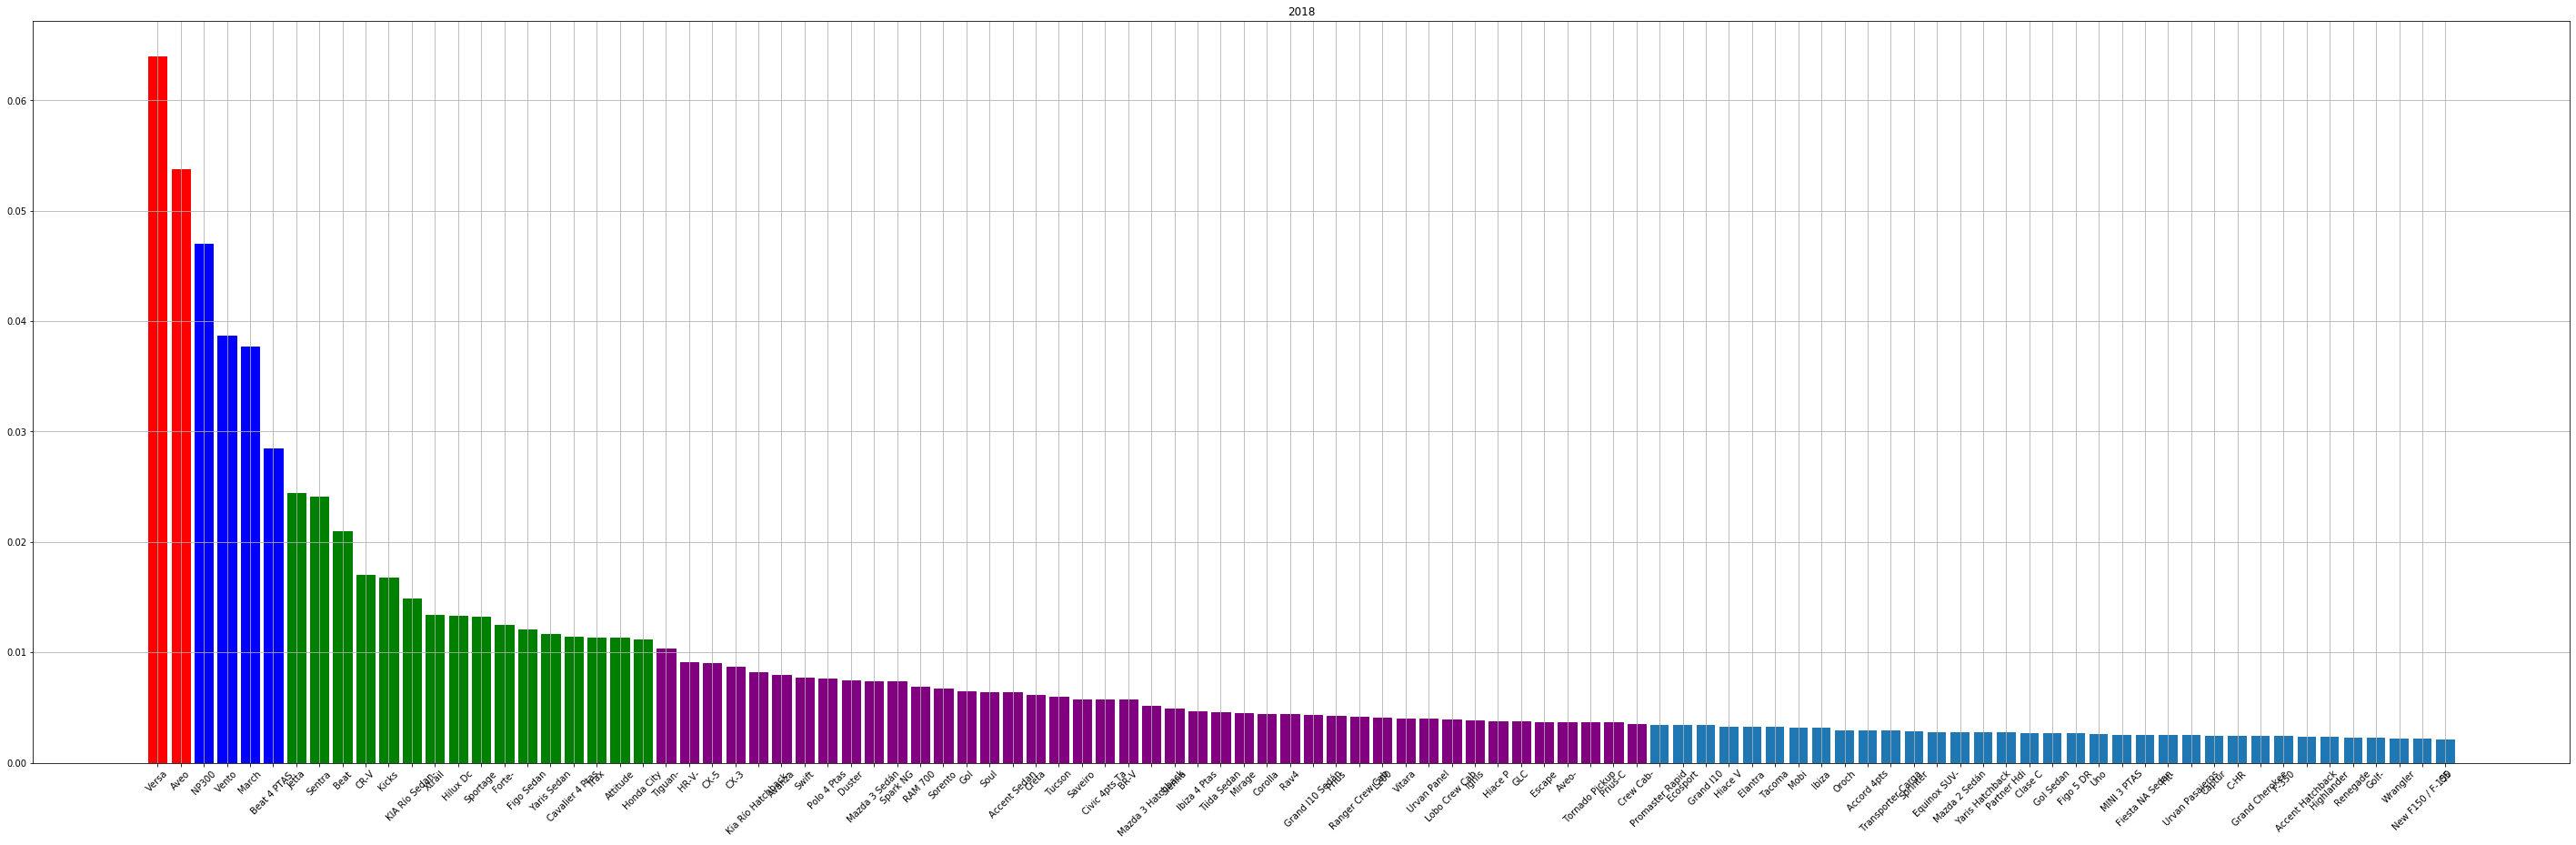

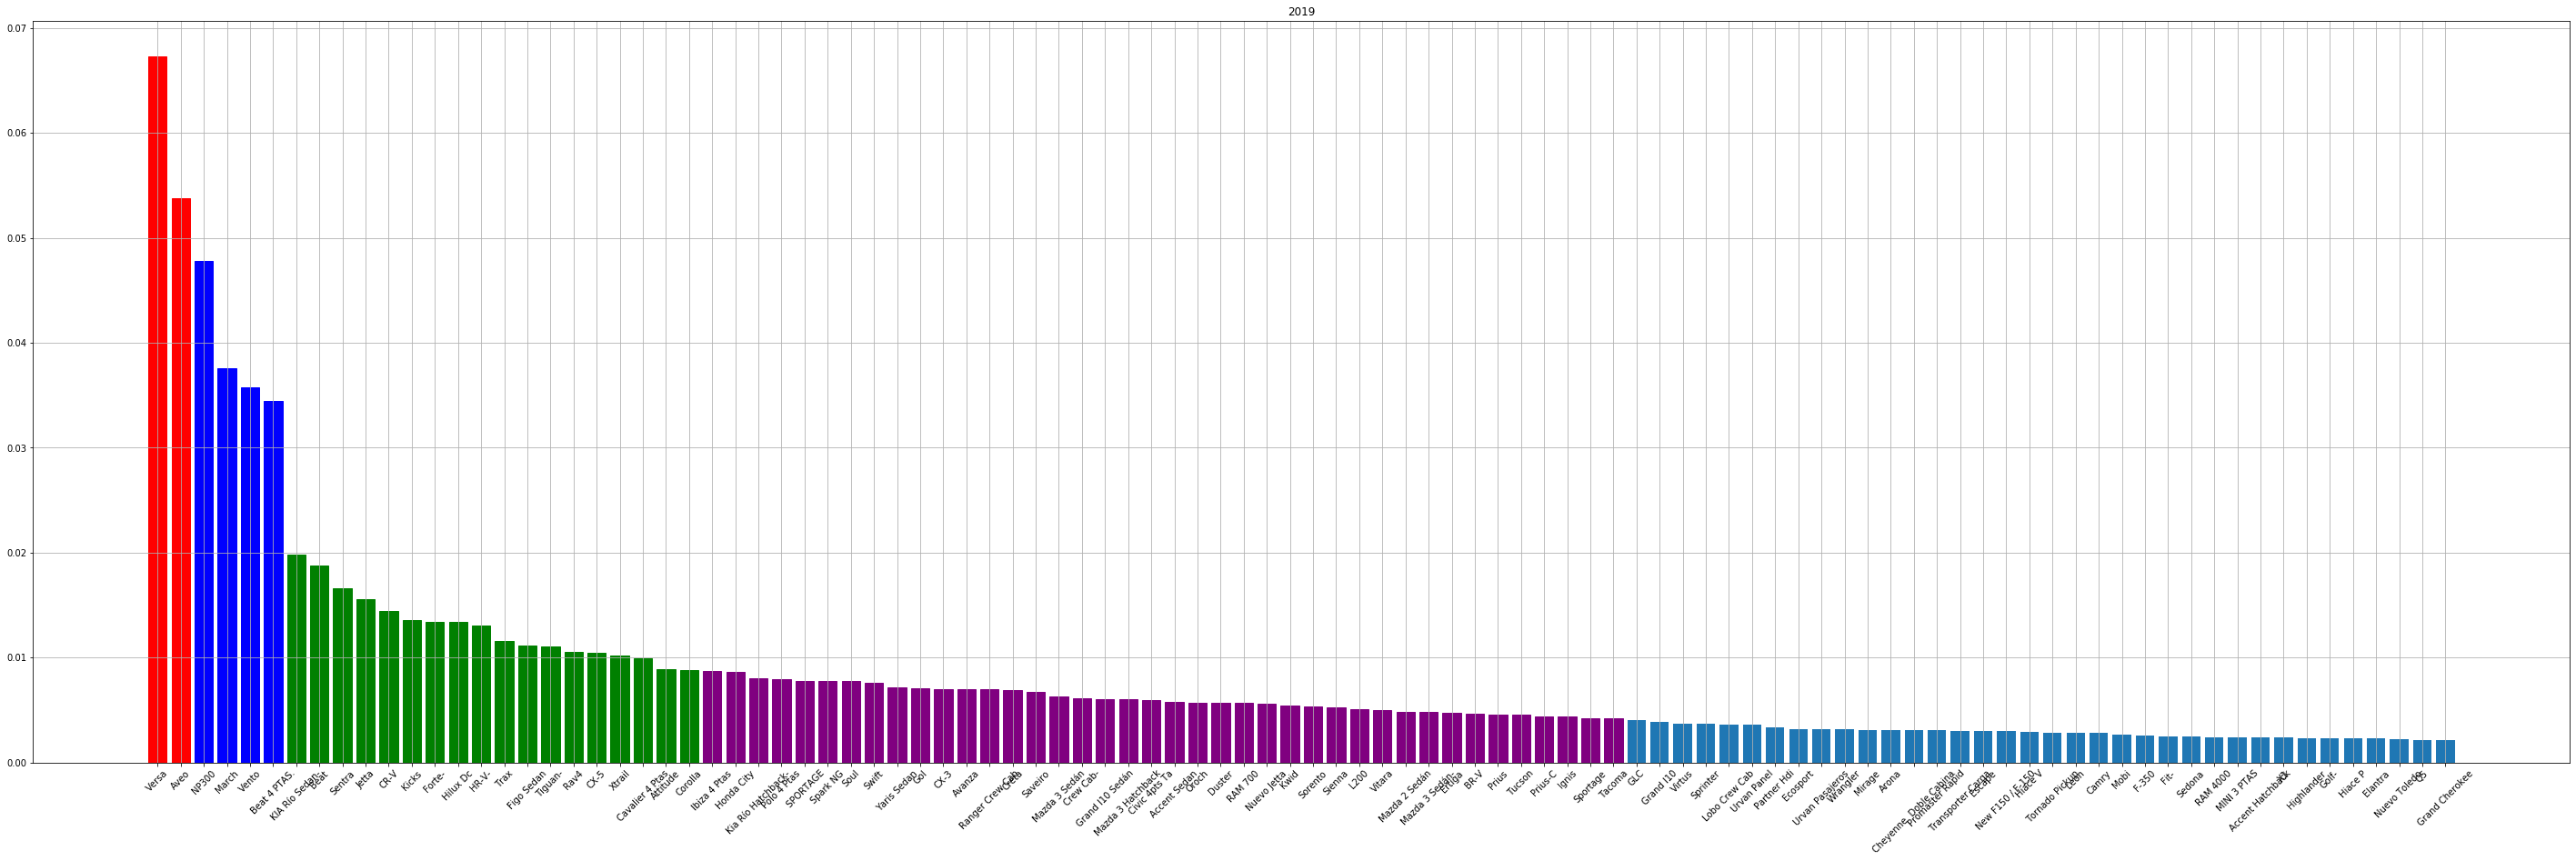

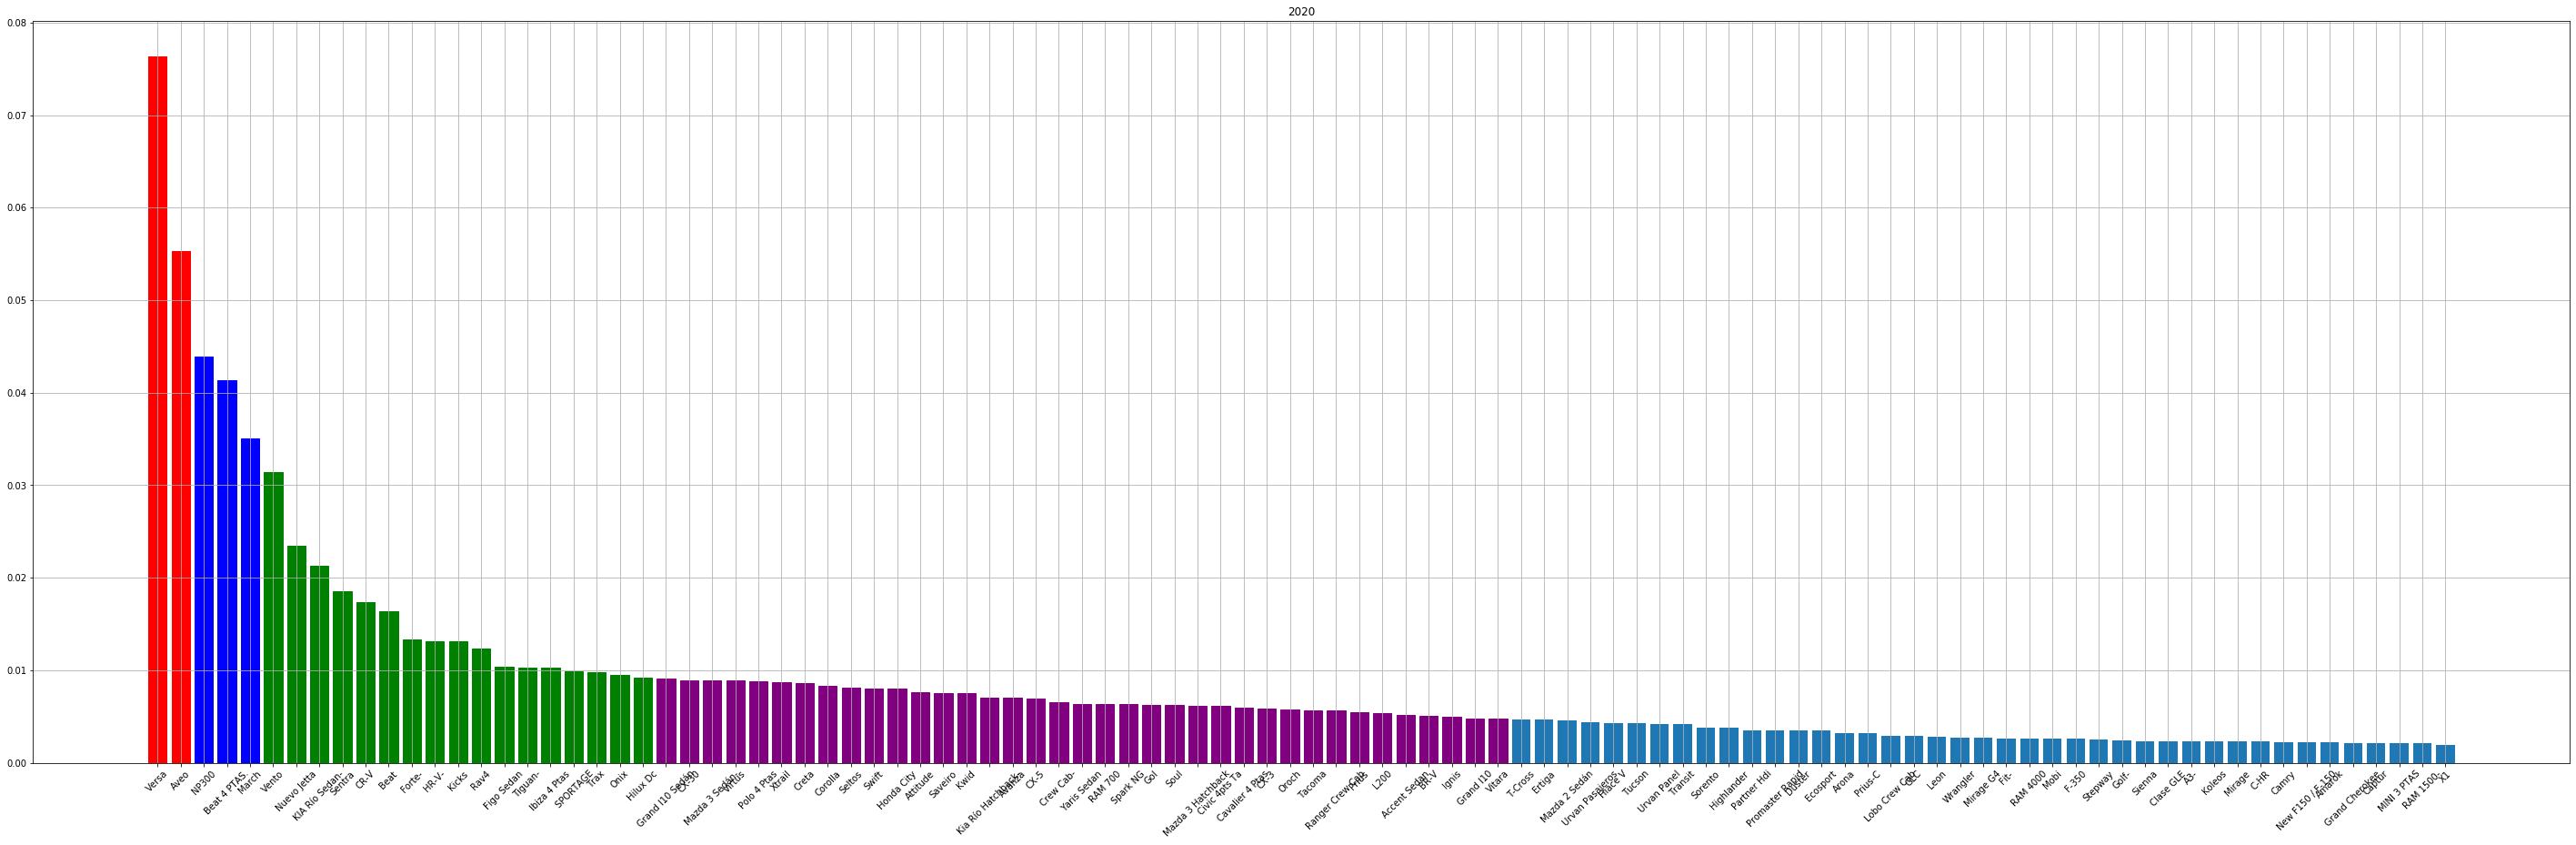

In [339]:
yeartotals = df.groupby(["año"])["cantidad"].sum().reset_index()
percetangeOfSells = {}
colors = [[0.1,"red"],[0.25,"blue"],[0.5,"green"],[0.75,"purple"]]
for i,year in enumerate(uniques["año"]):
    plt.figure(figsize=(50,15))
    yearTotal = yeartotals[yeartotals["año"] == year]["cantidad"]
    filtered = top100models[year].sort_values(by="cantidad",ascending=False)
    y = filtered["cantidad"].apply(lambda x: x/yearTotal).values.reshape(-1)
    x = filtered["modelo"]
    percetangeOfSells[year] = filtered
    plt.title(year)
    bars = plt.bar(x,y)#,label=x)
    total = 0
    for i,val in enumerate(y):
        for color in colors:
            if total < color[0]:
                bars[i].set_color(color[1])
                break
        total += val
    plt.grid()
    #plt.legend(title=year)
    plt.xticks(rotation=45)
    _ = plt.savefig(f"figs/mostsellingmodels/{year}.png")
plt.show(block=False)

## Obtain the most selling brand per year

In [335]:
# first obtain the top selling models per year
brandYearlyGrouped = df.groupby(["marca","año"])["cantidad"].sum().reset_index()
topbrands = {}
for year in uniques["año"]:
    topbrands[year] = brandYearlyGrouped[brandYearlyGrouped["año"] == year].sort_values(by="cantidad",ascending=False).reset_index()

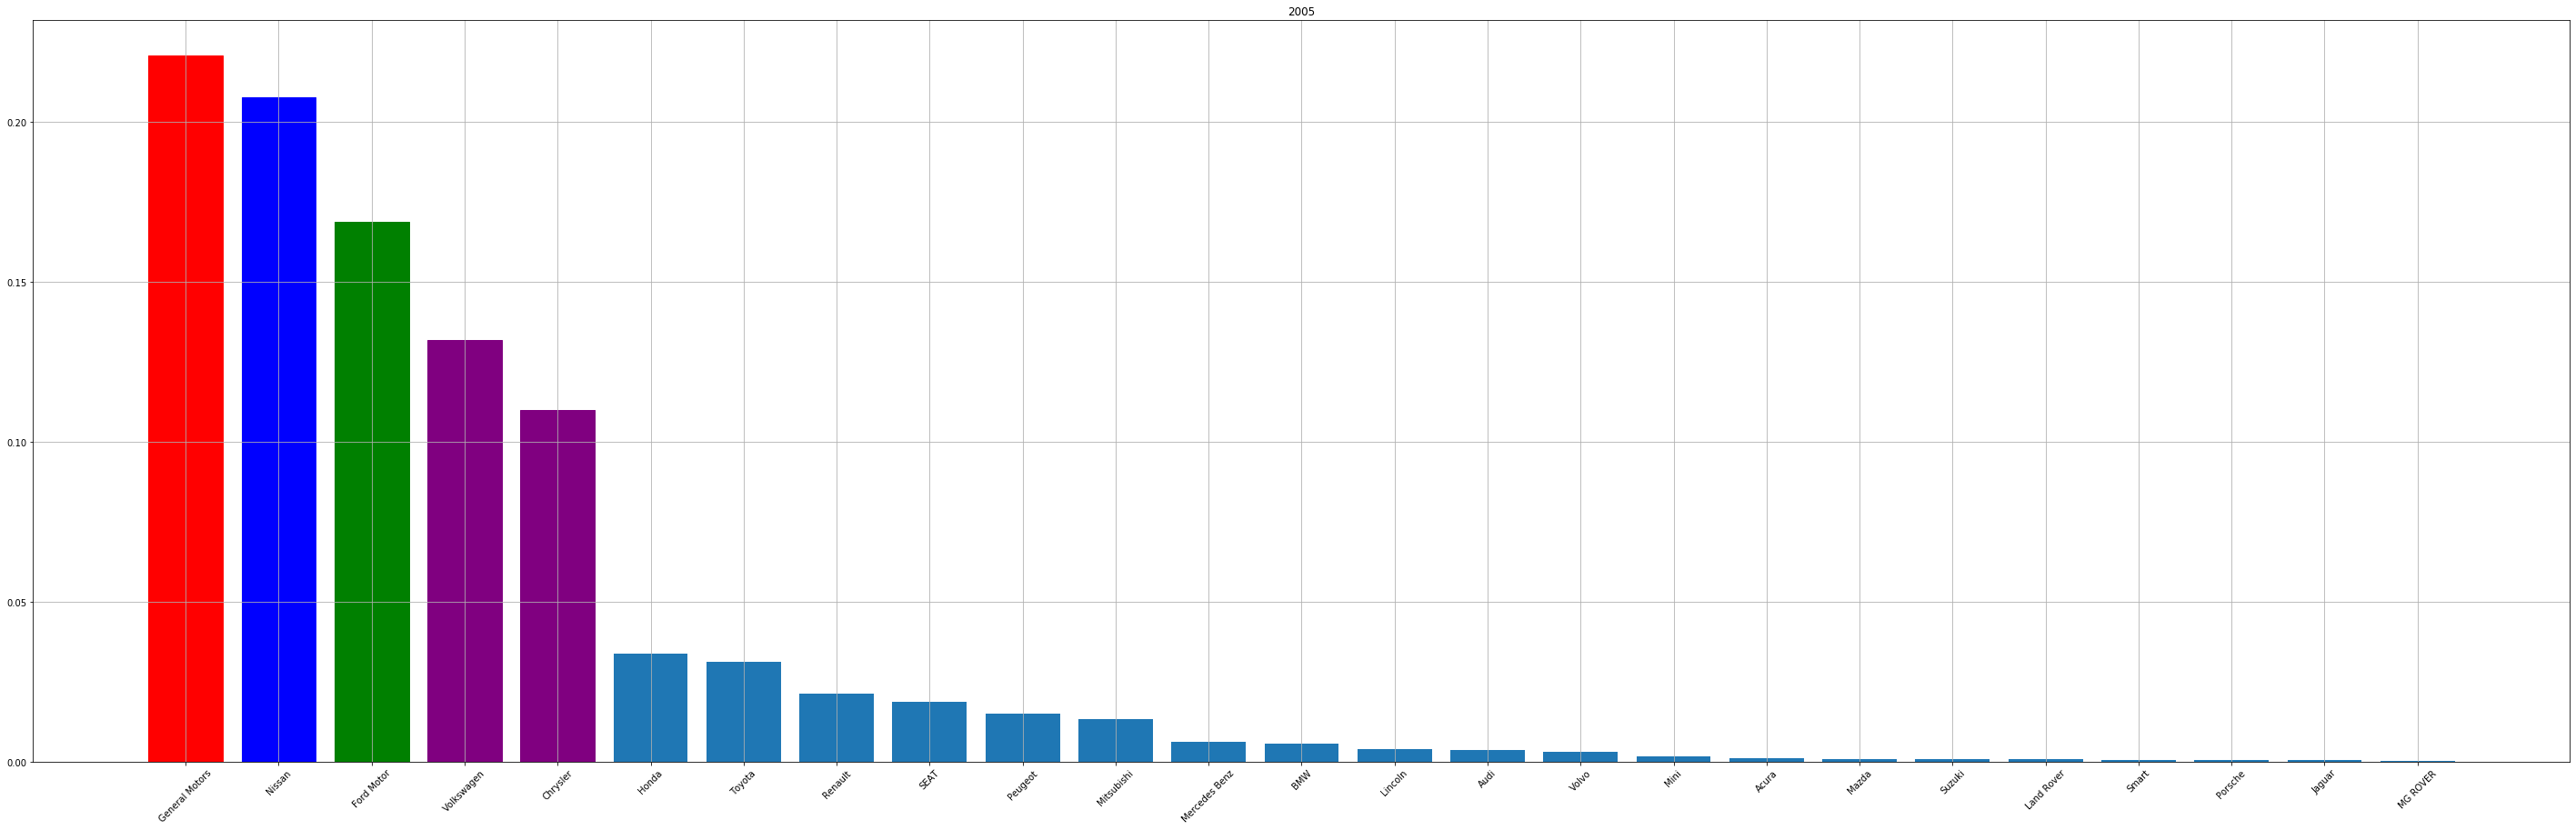

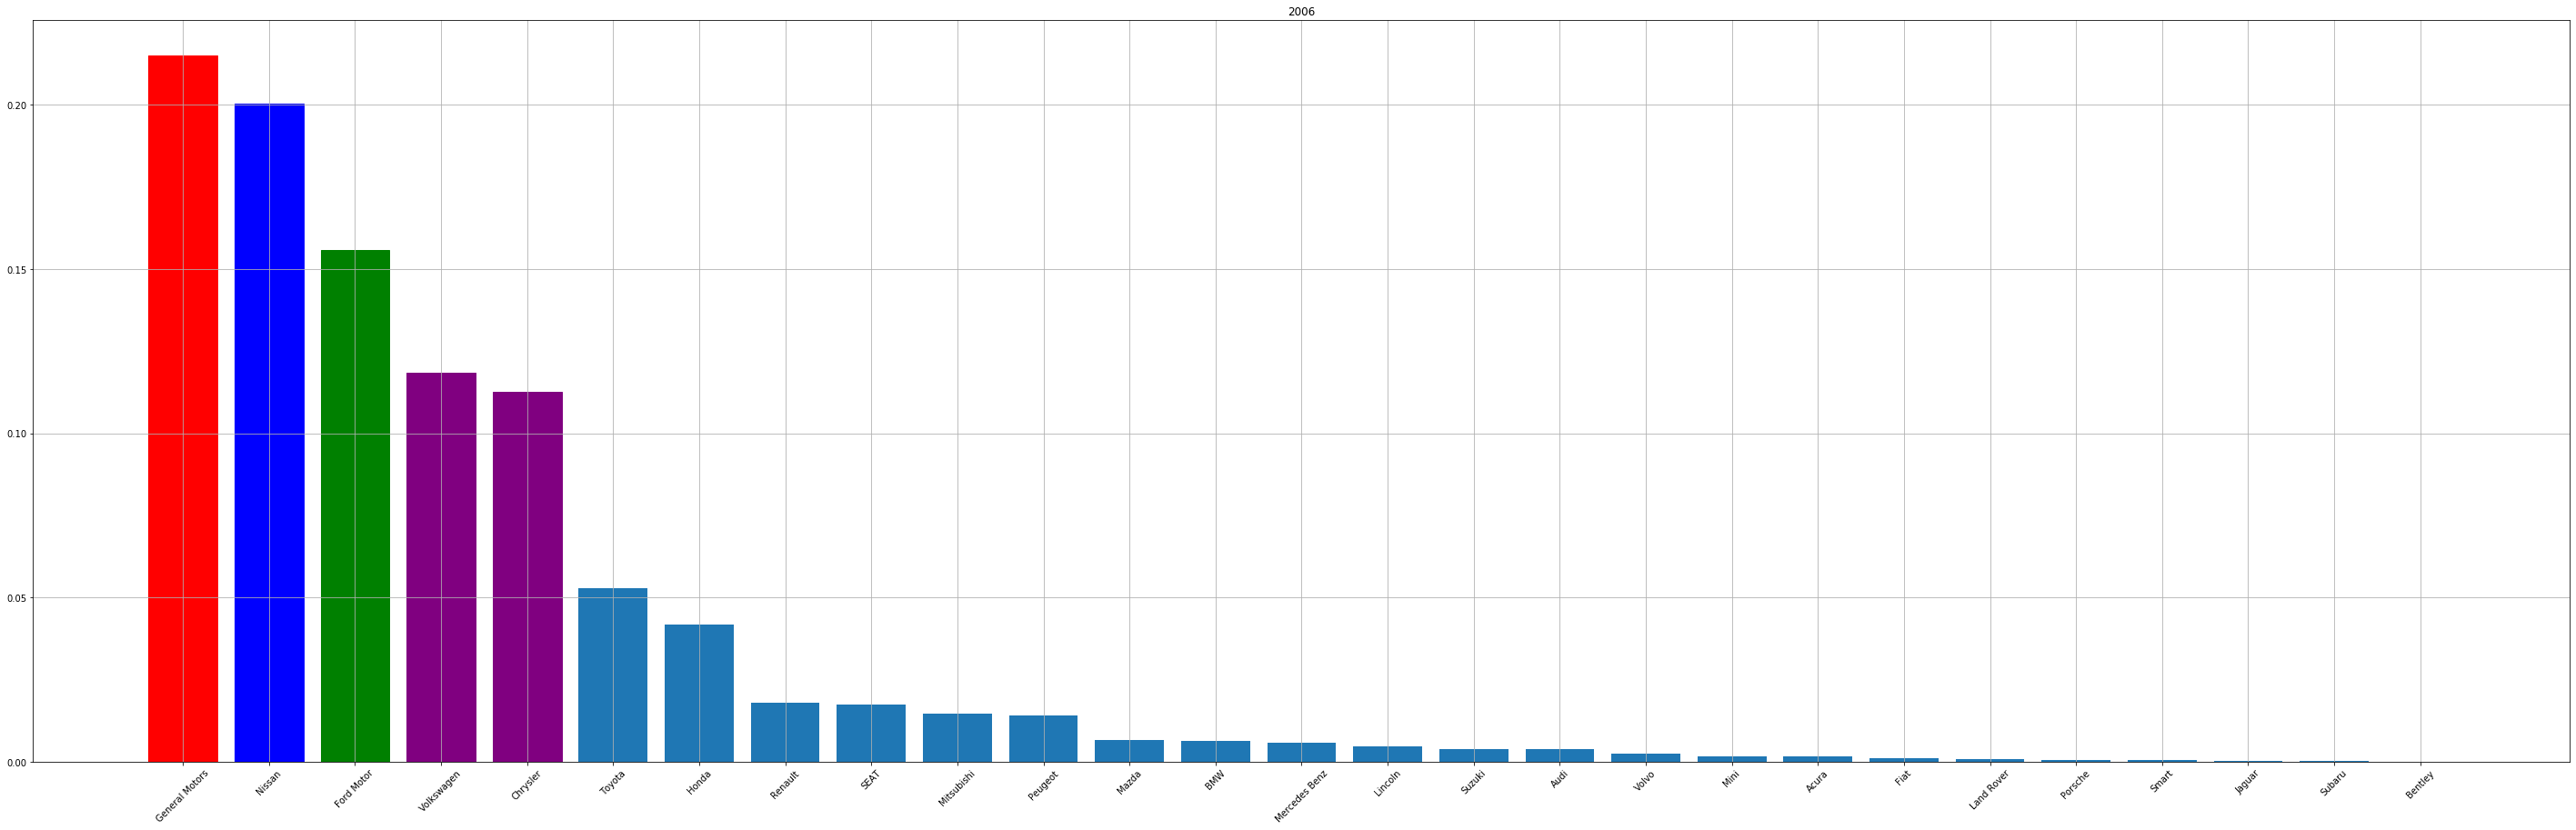

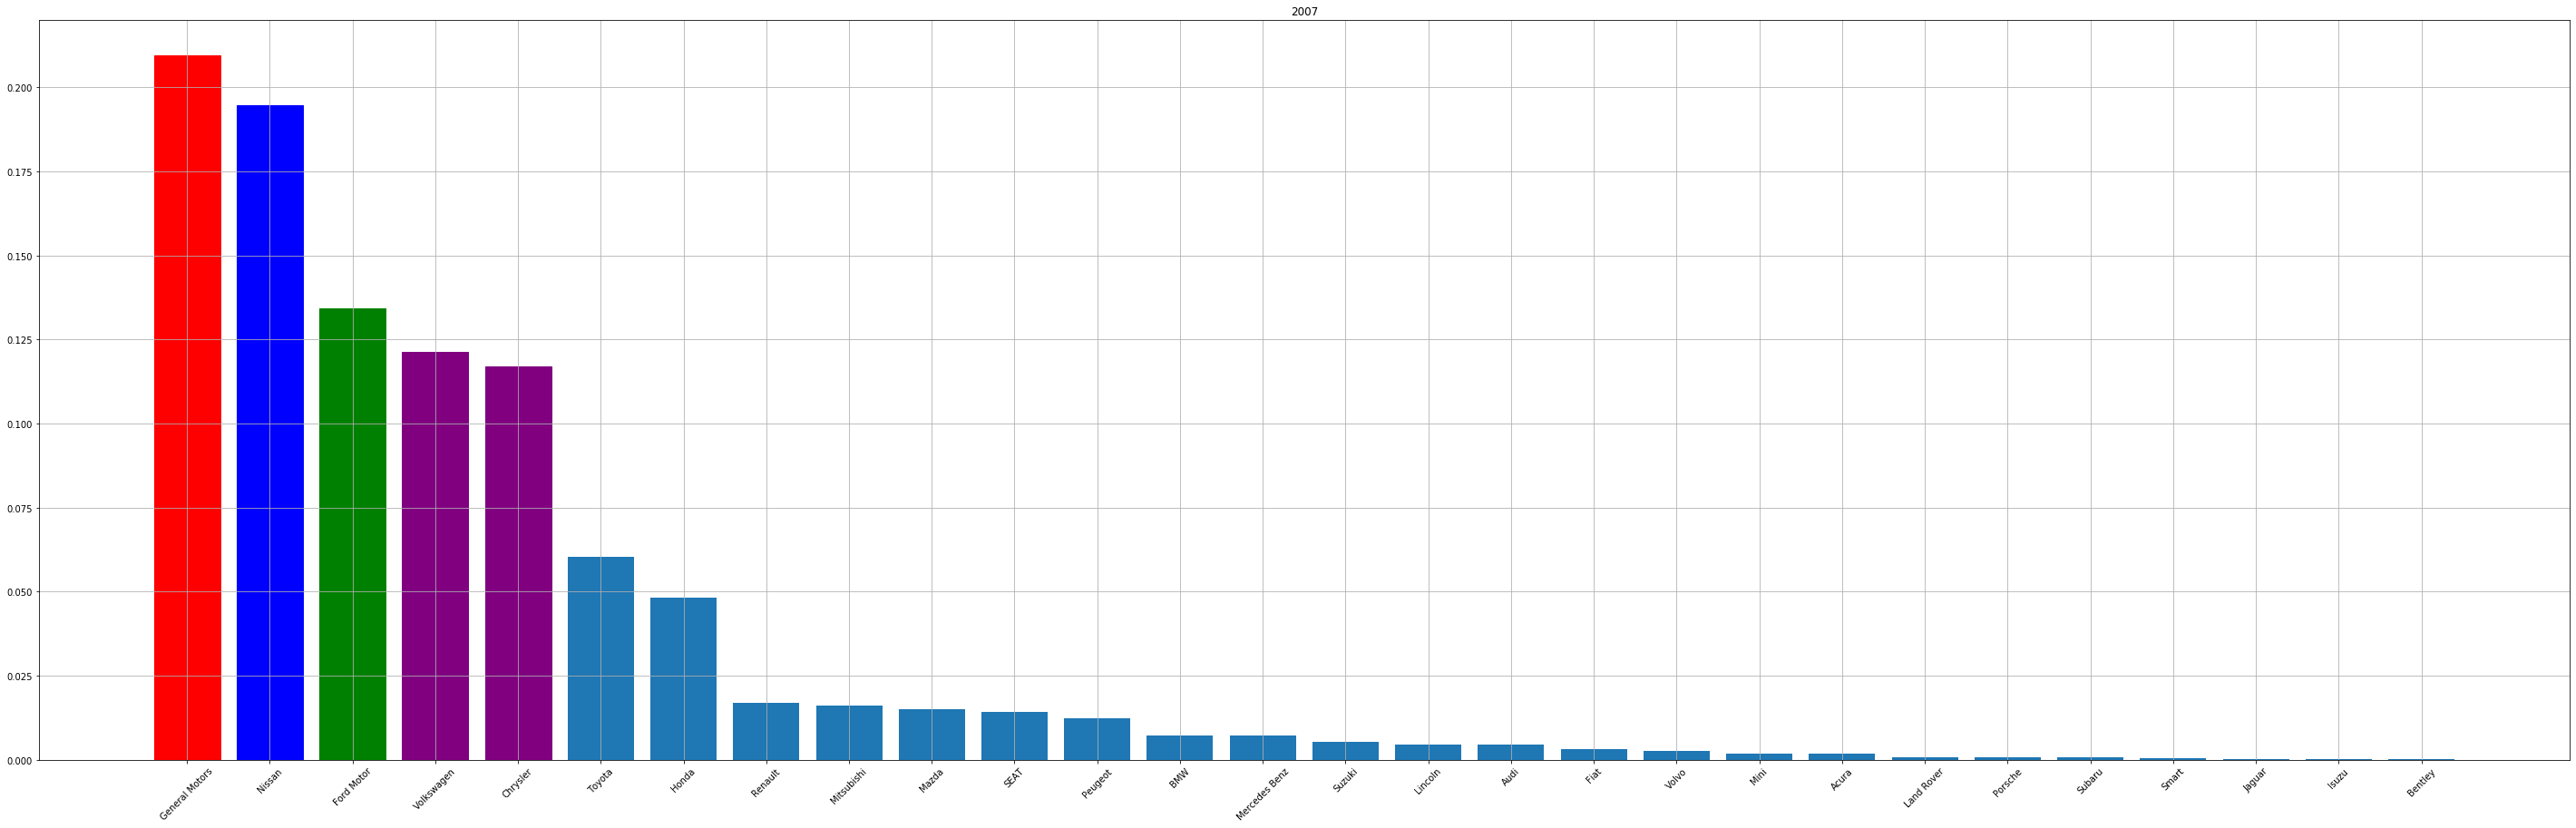

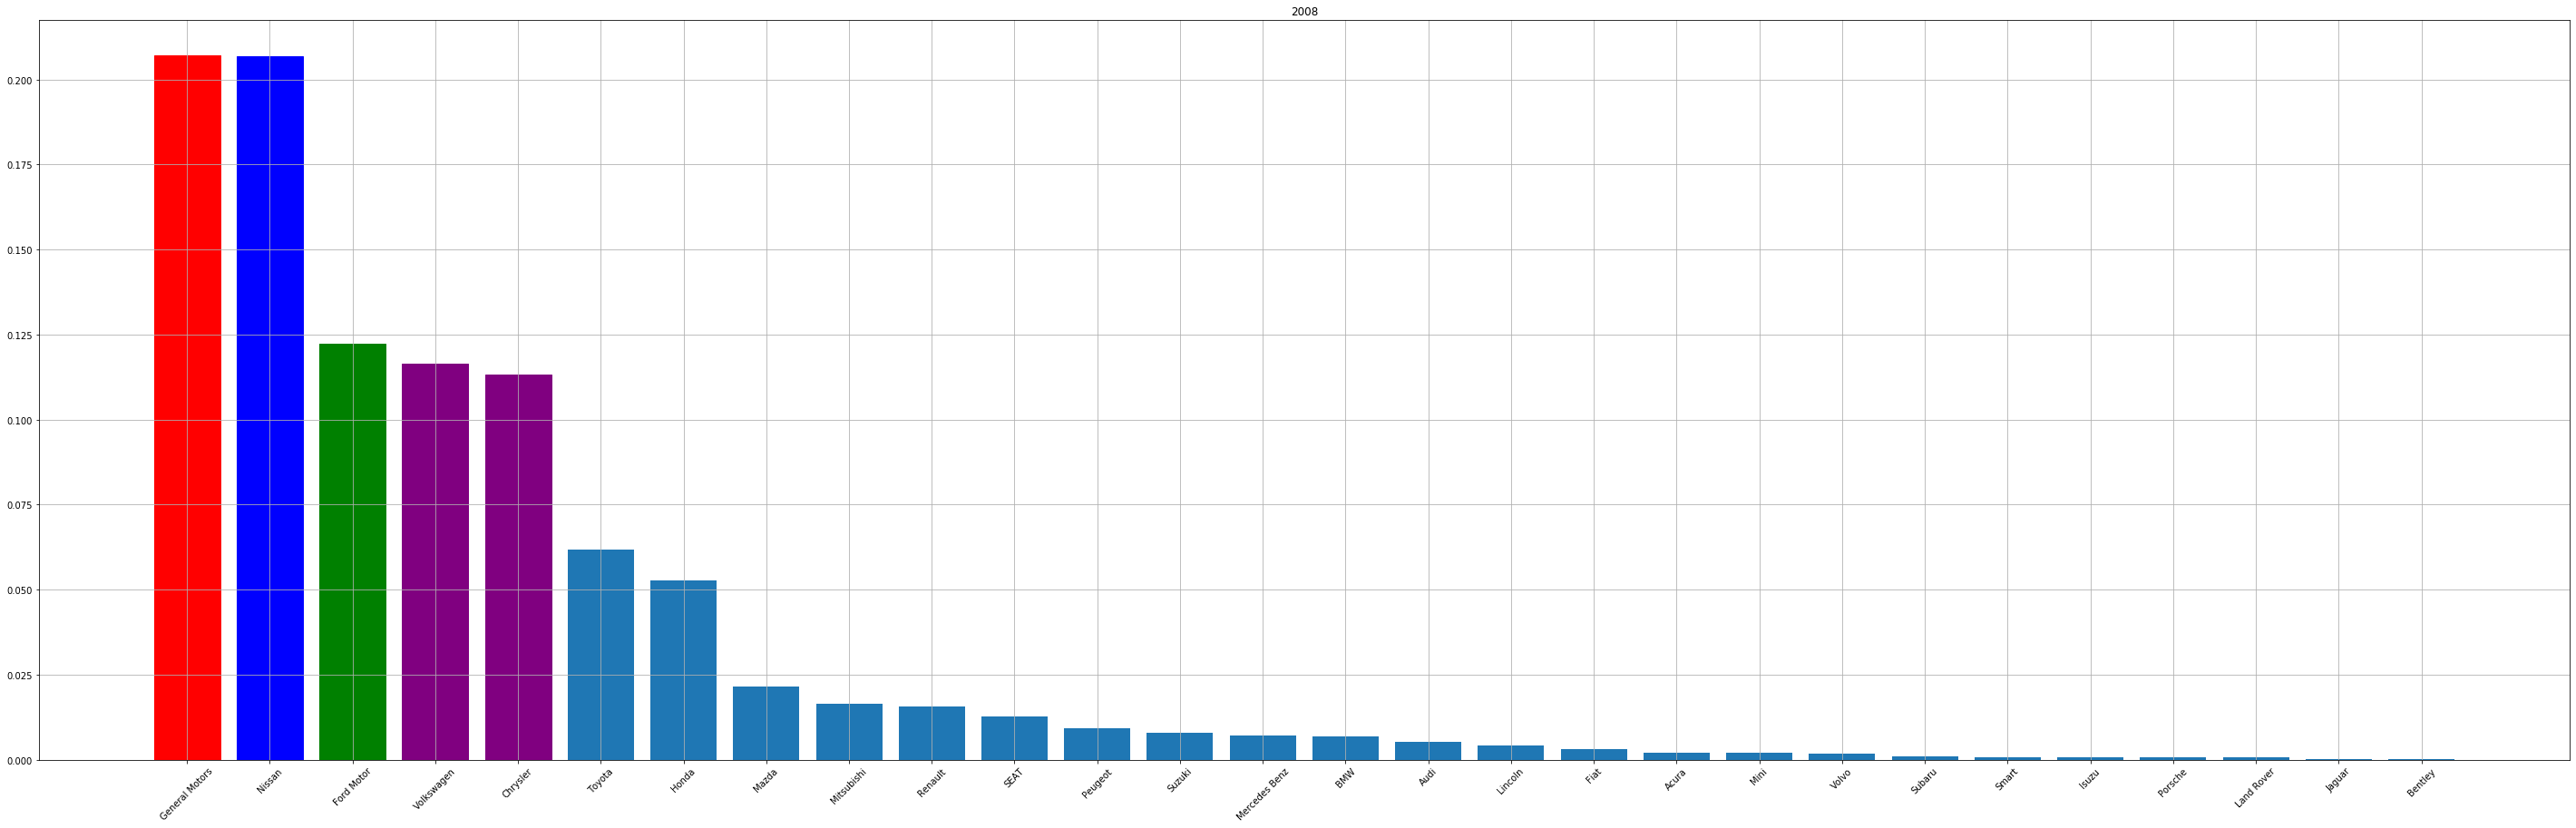

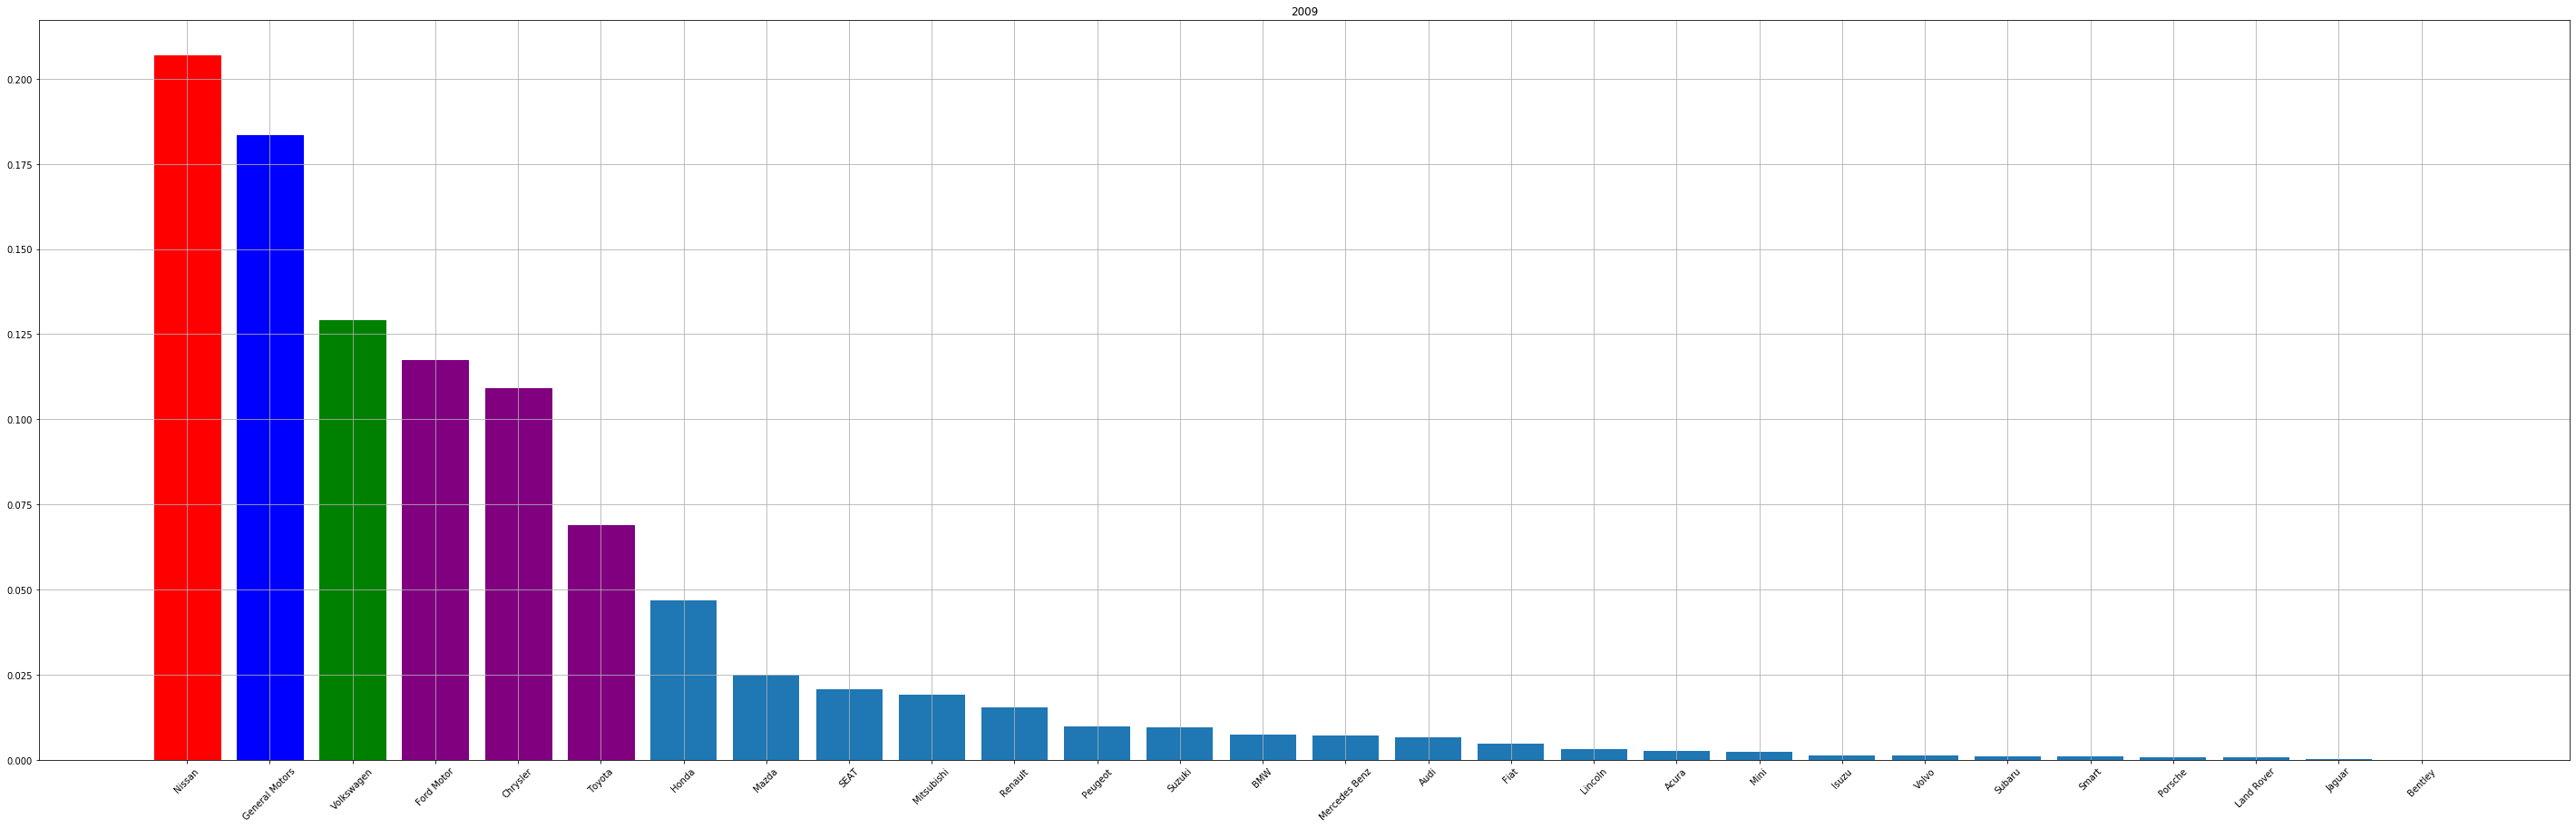

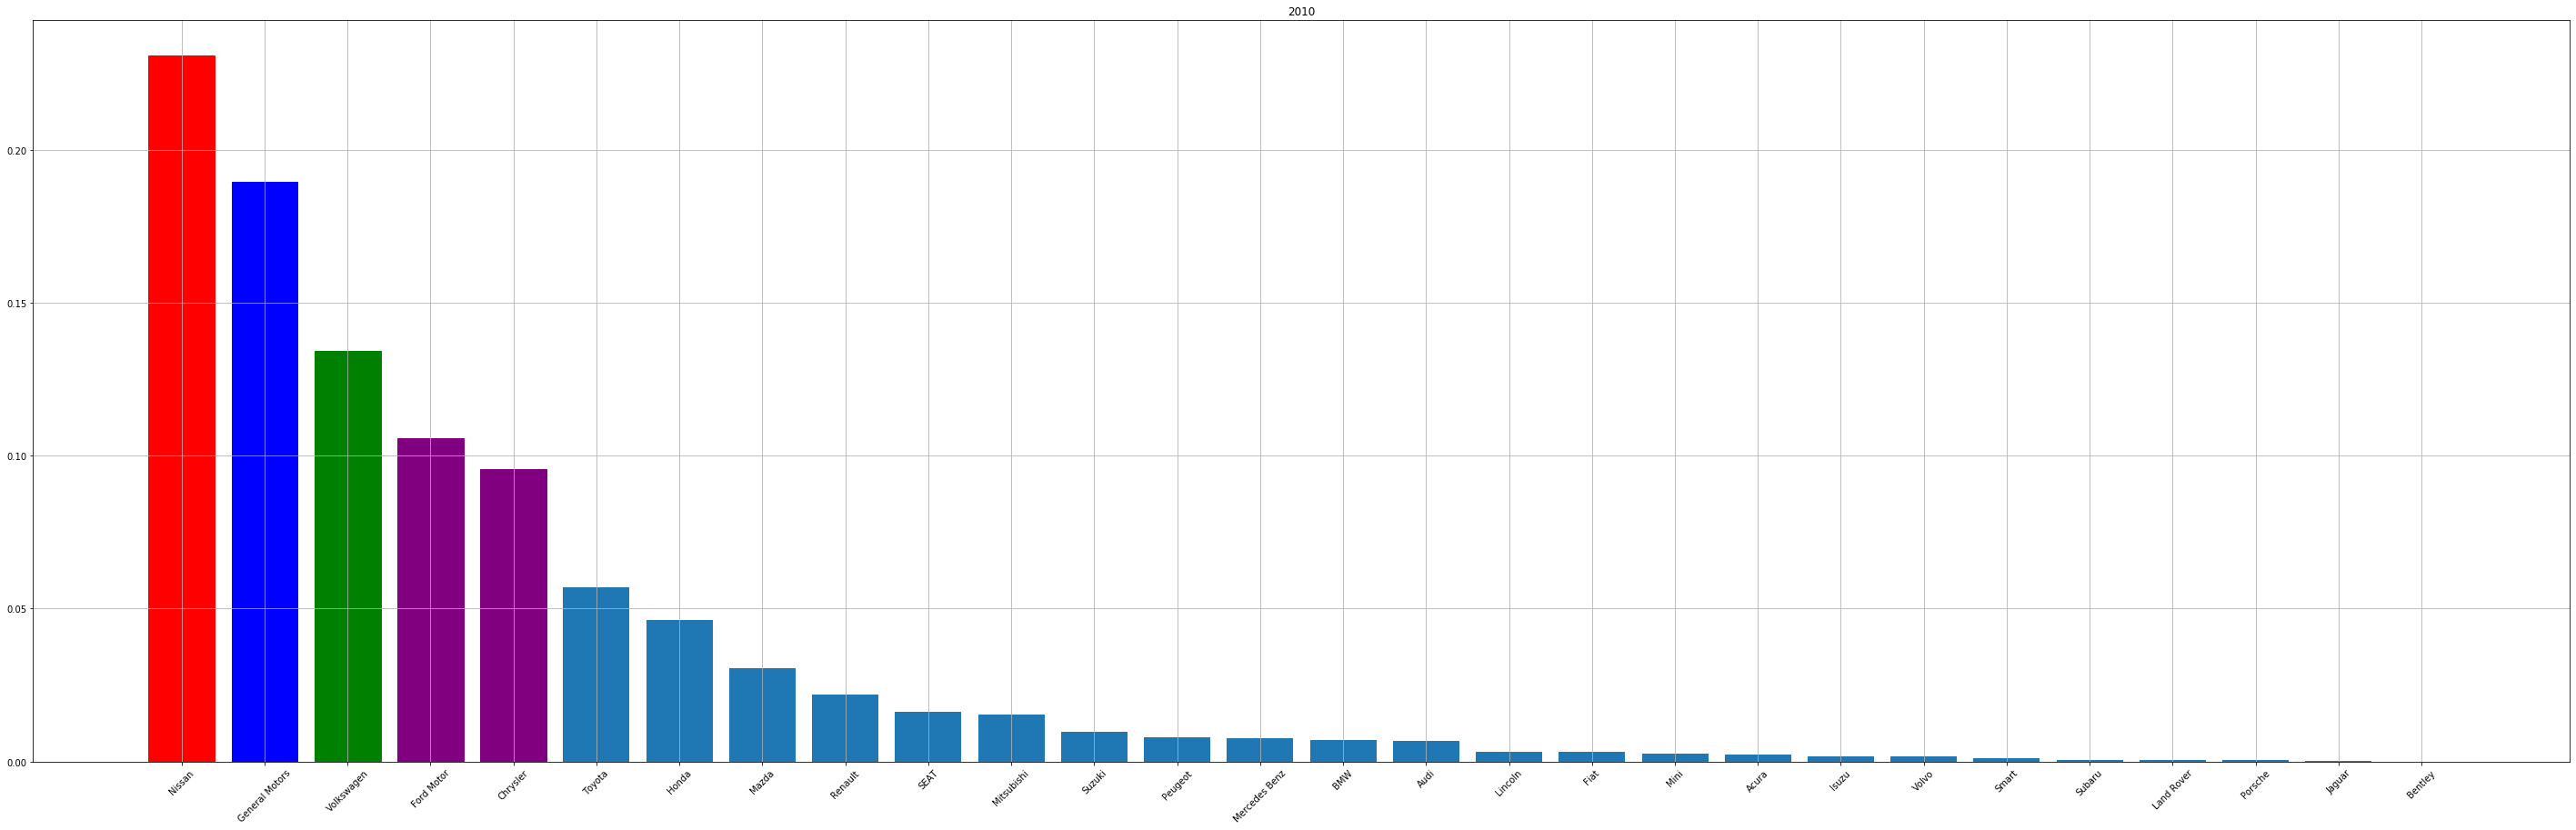

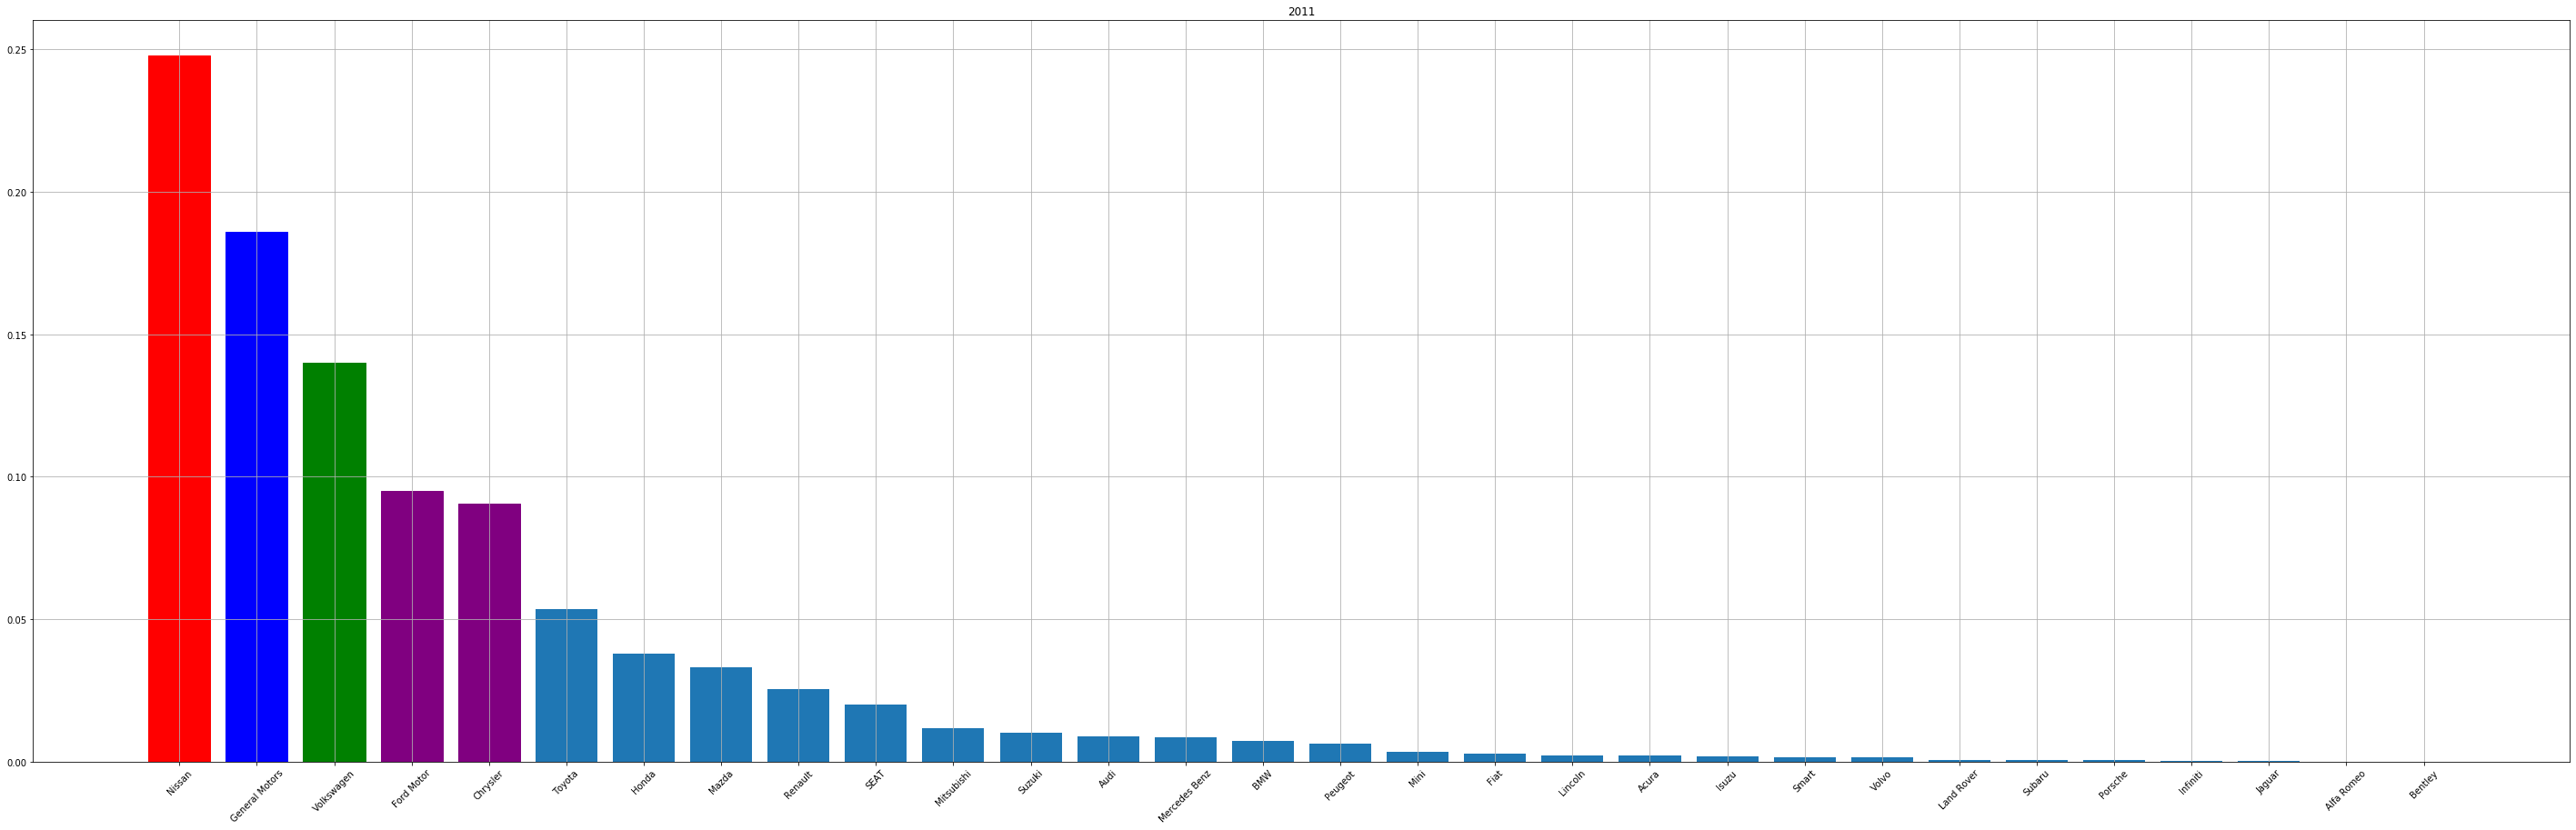

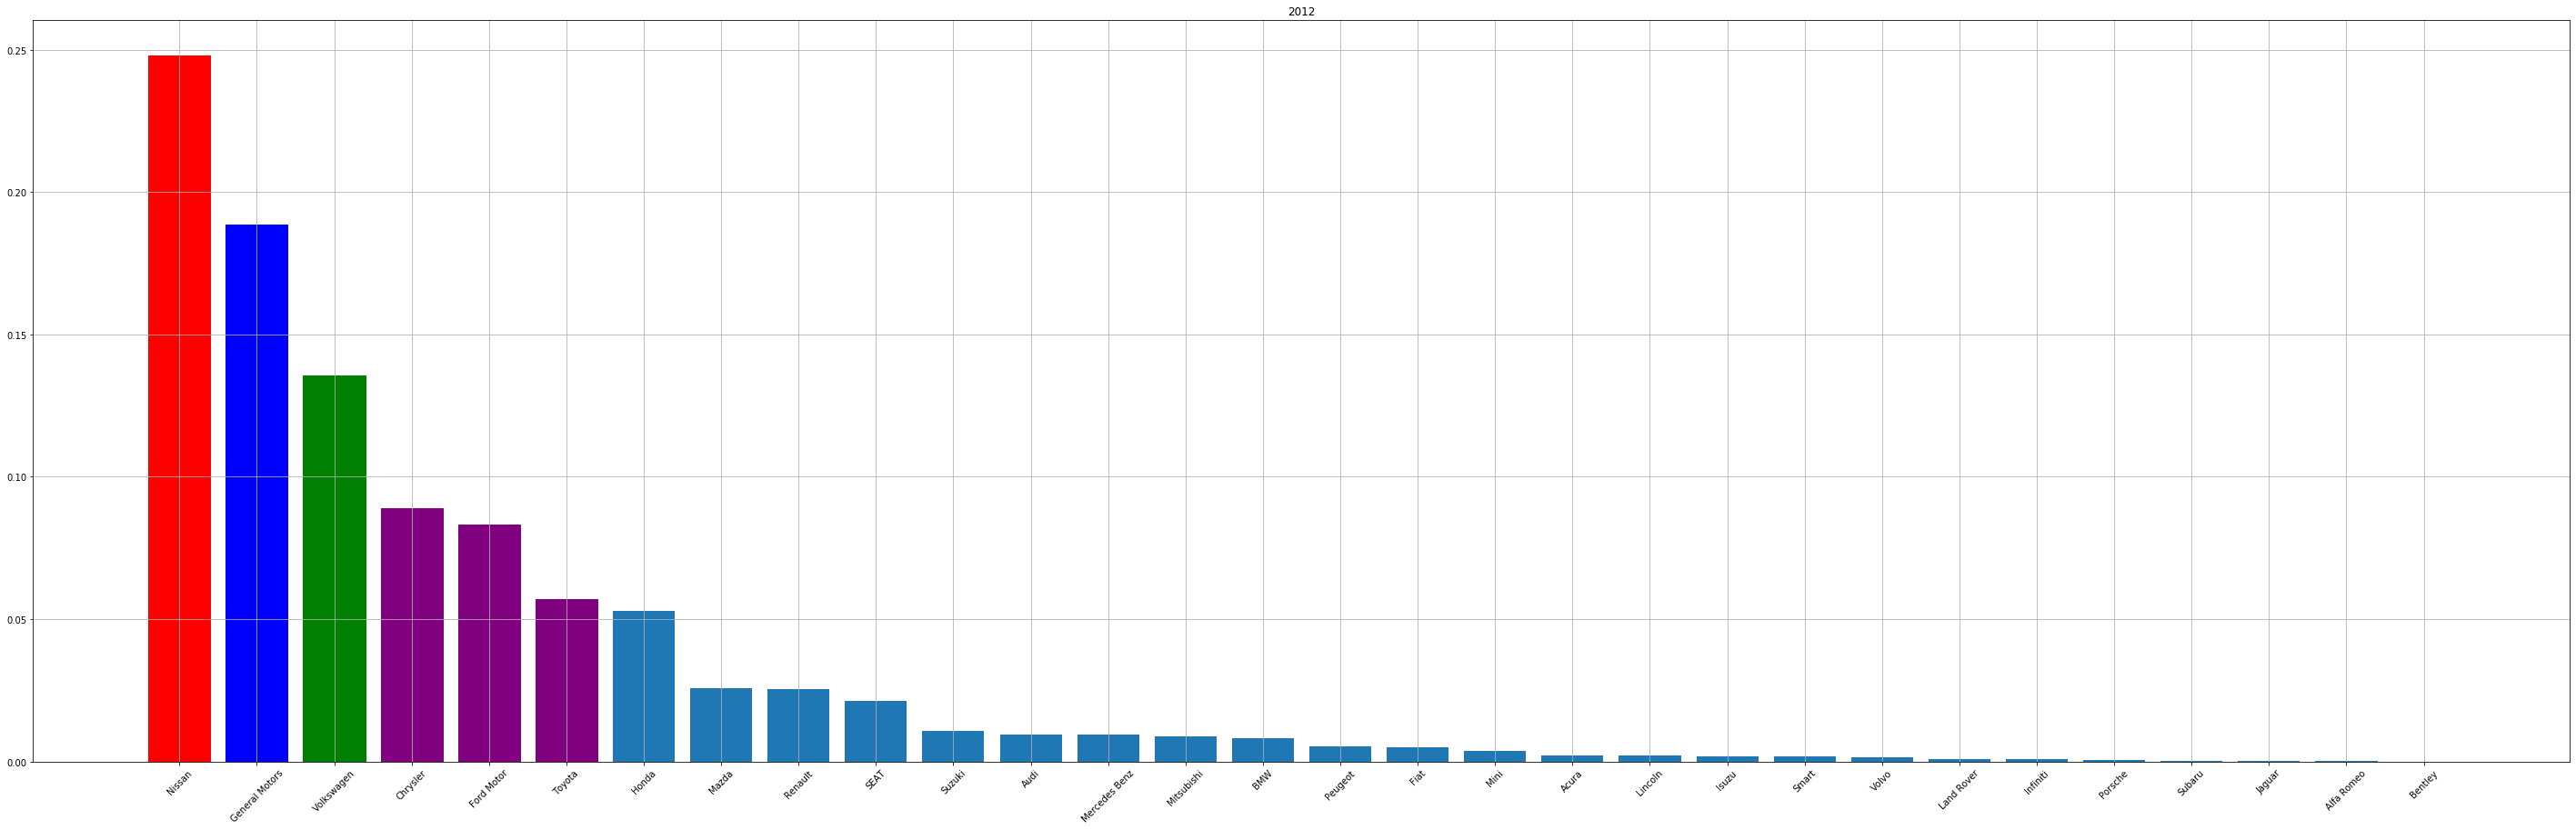

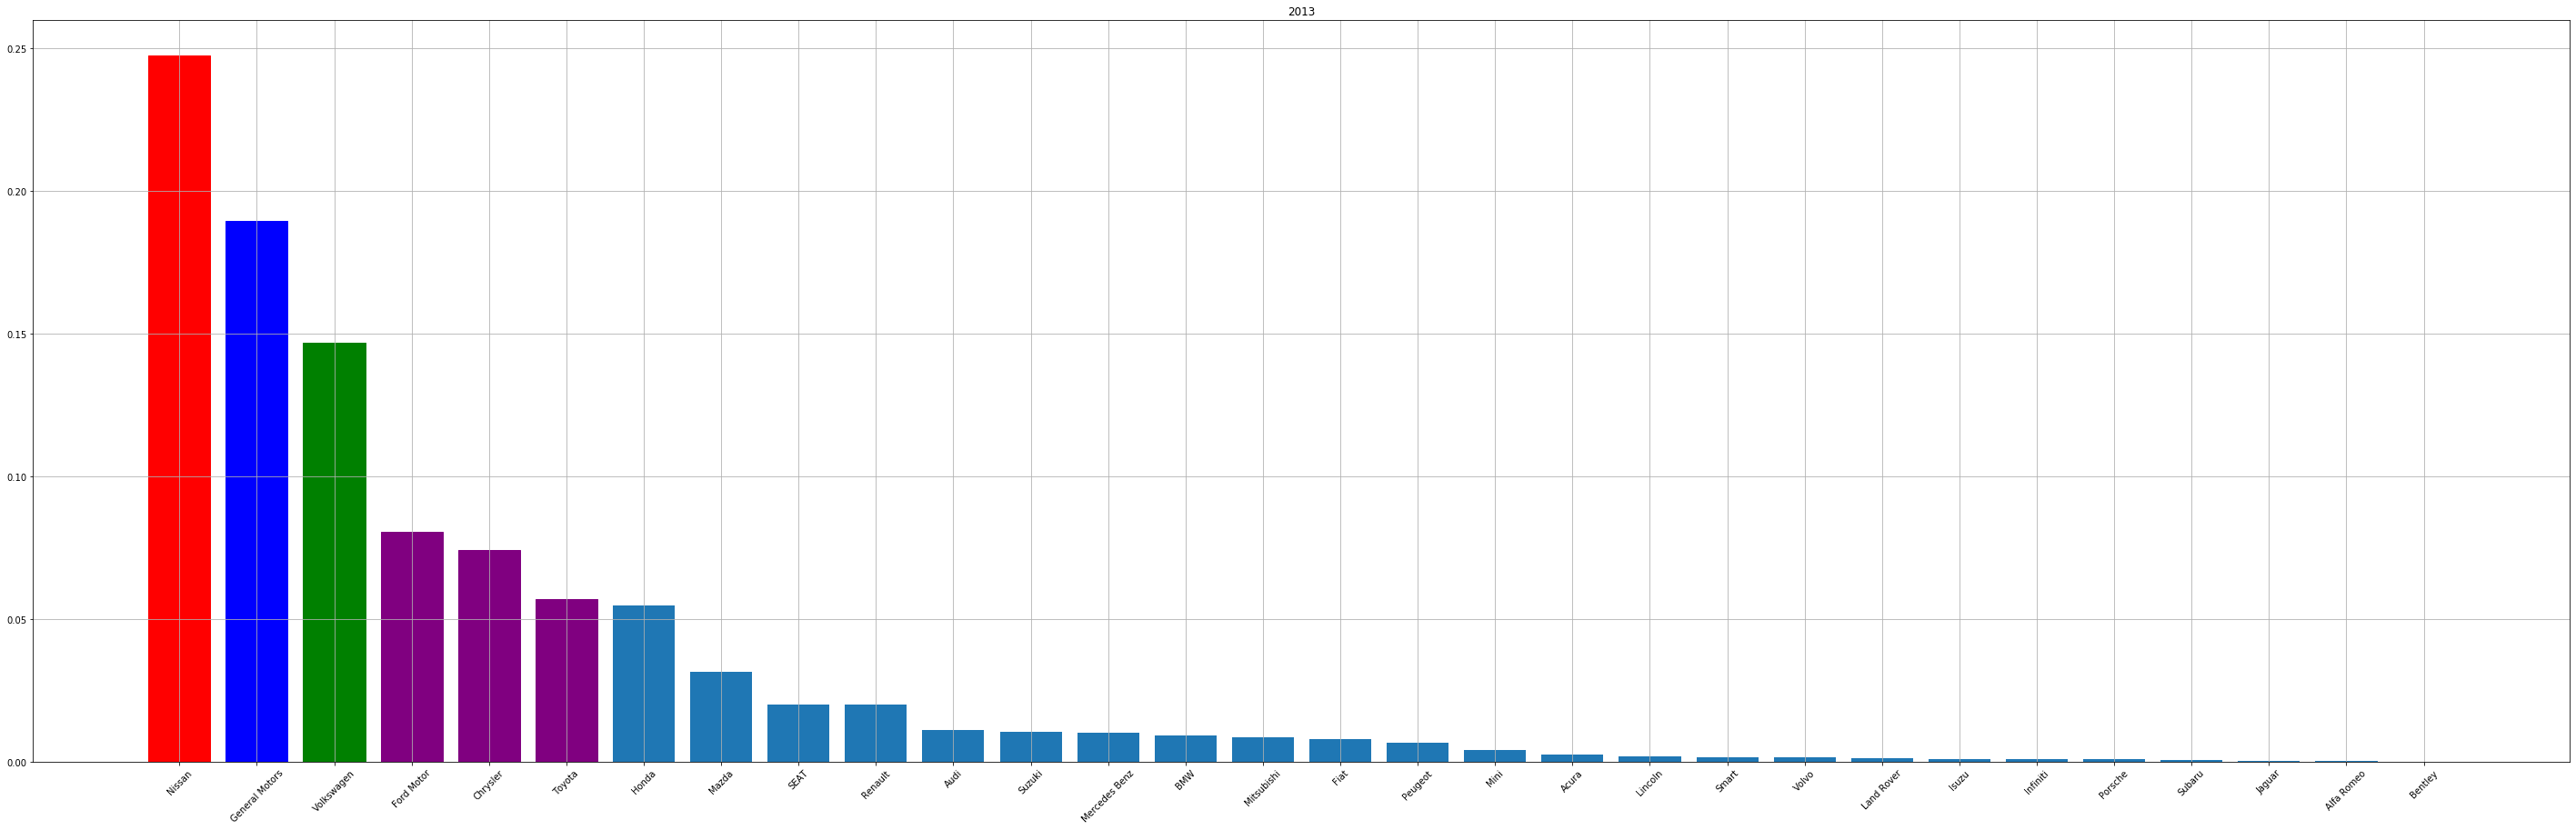

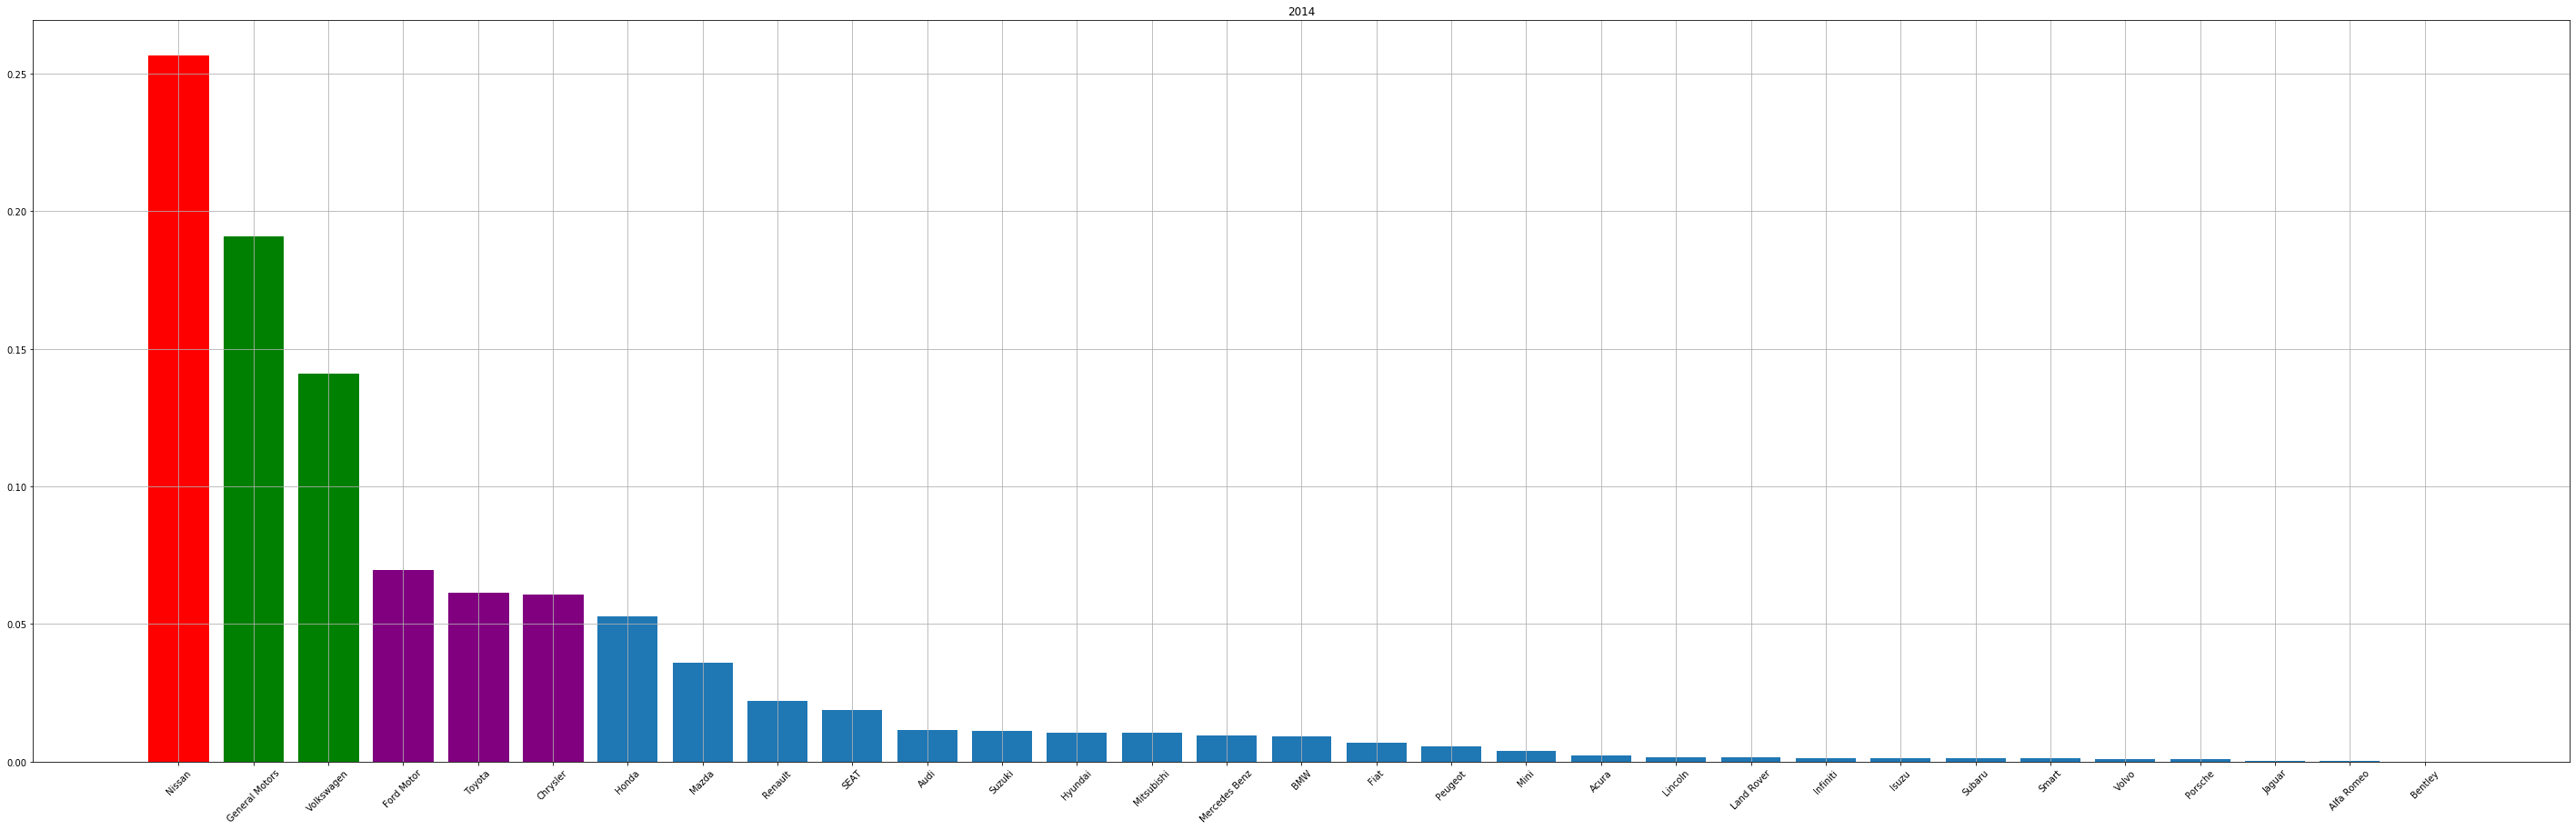

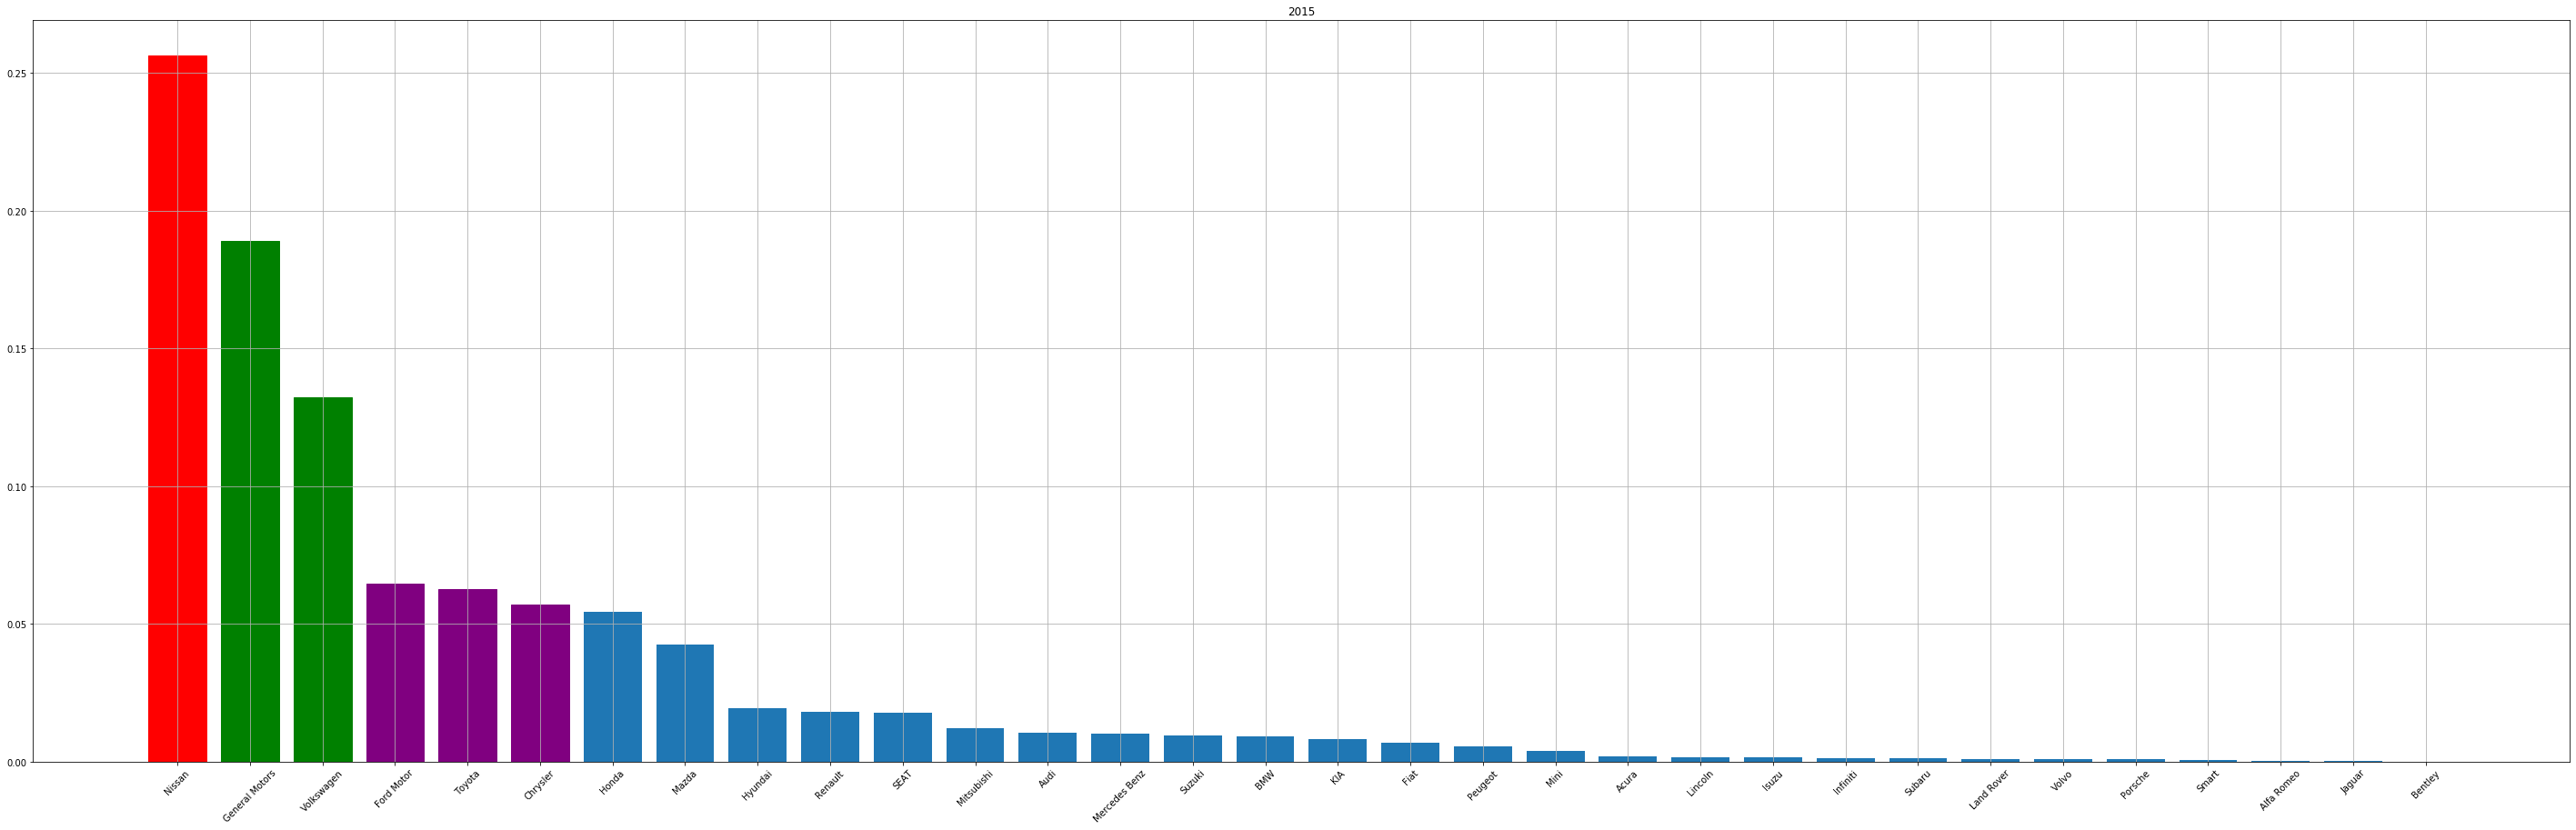

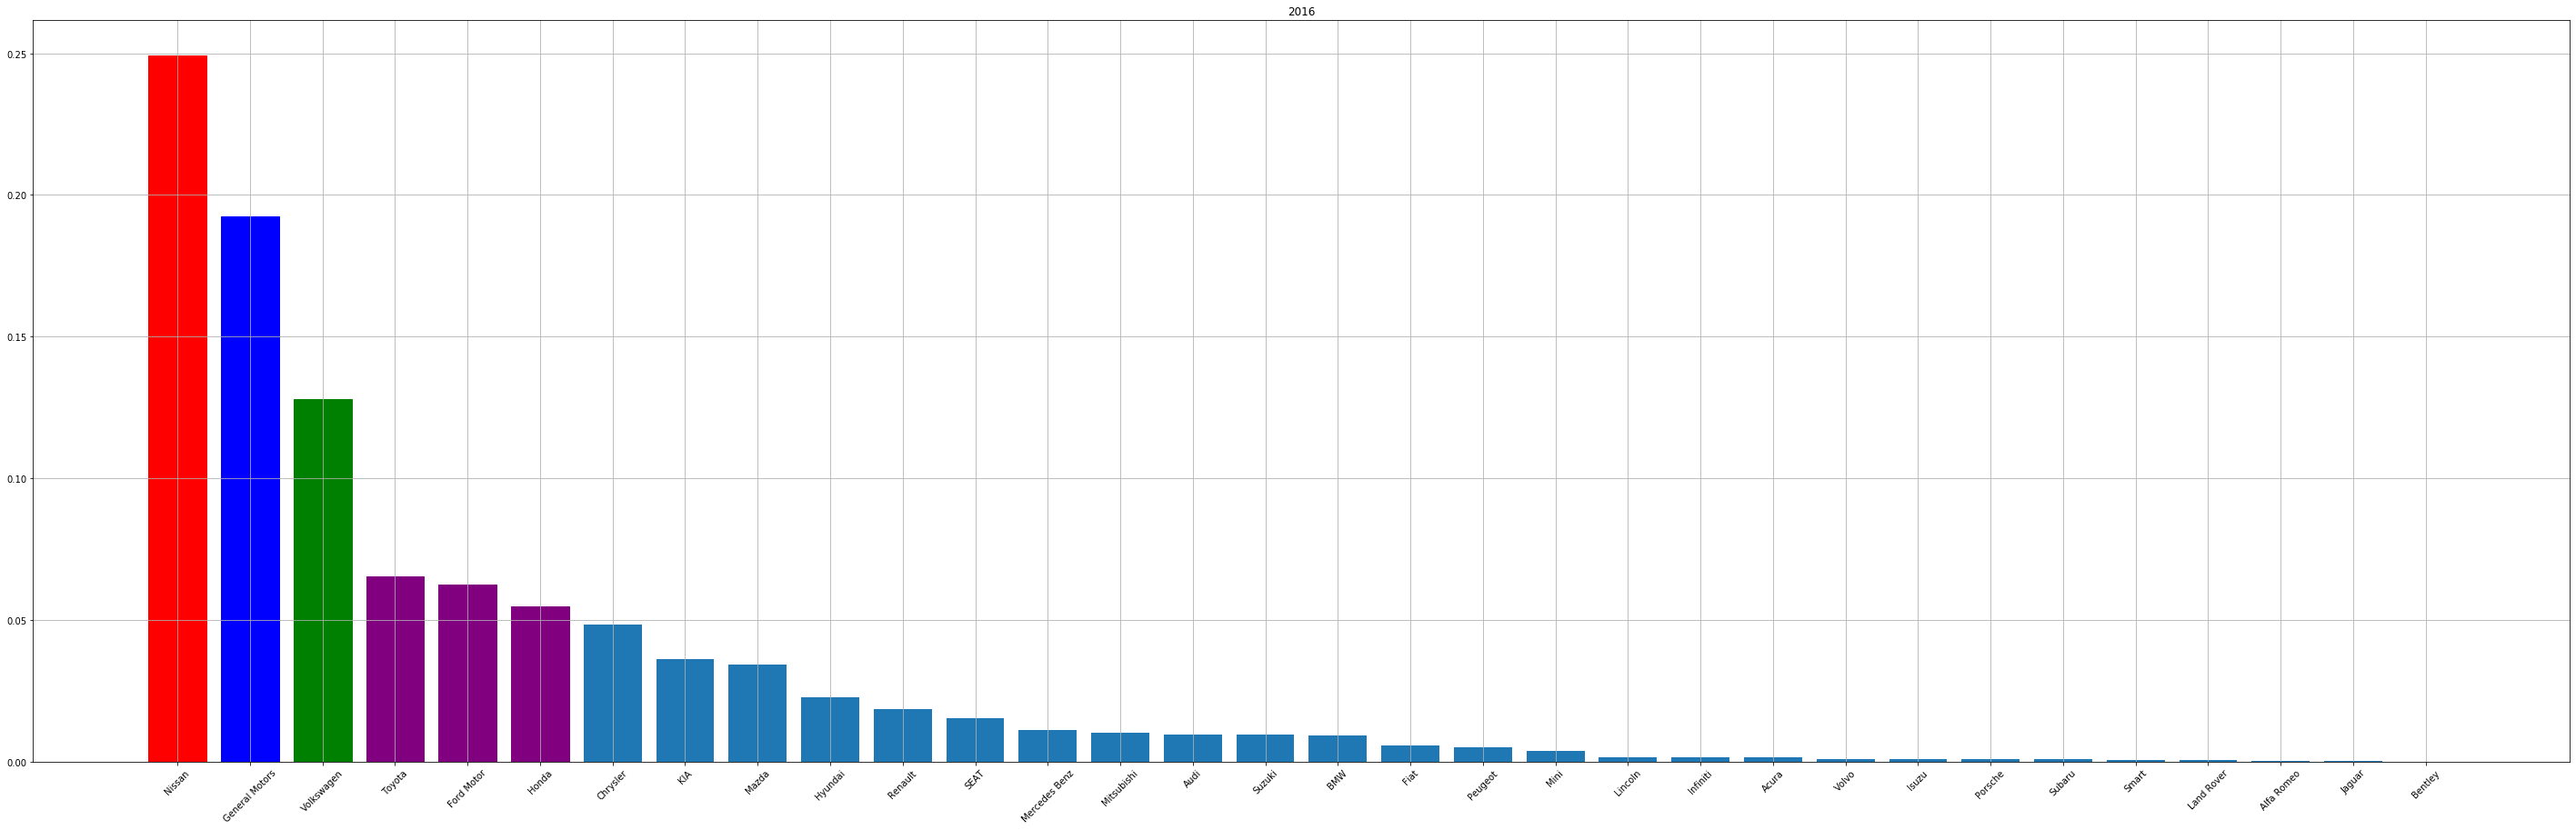

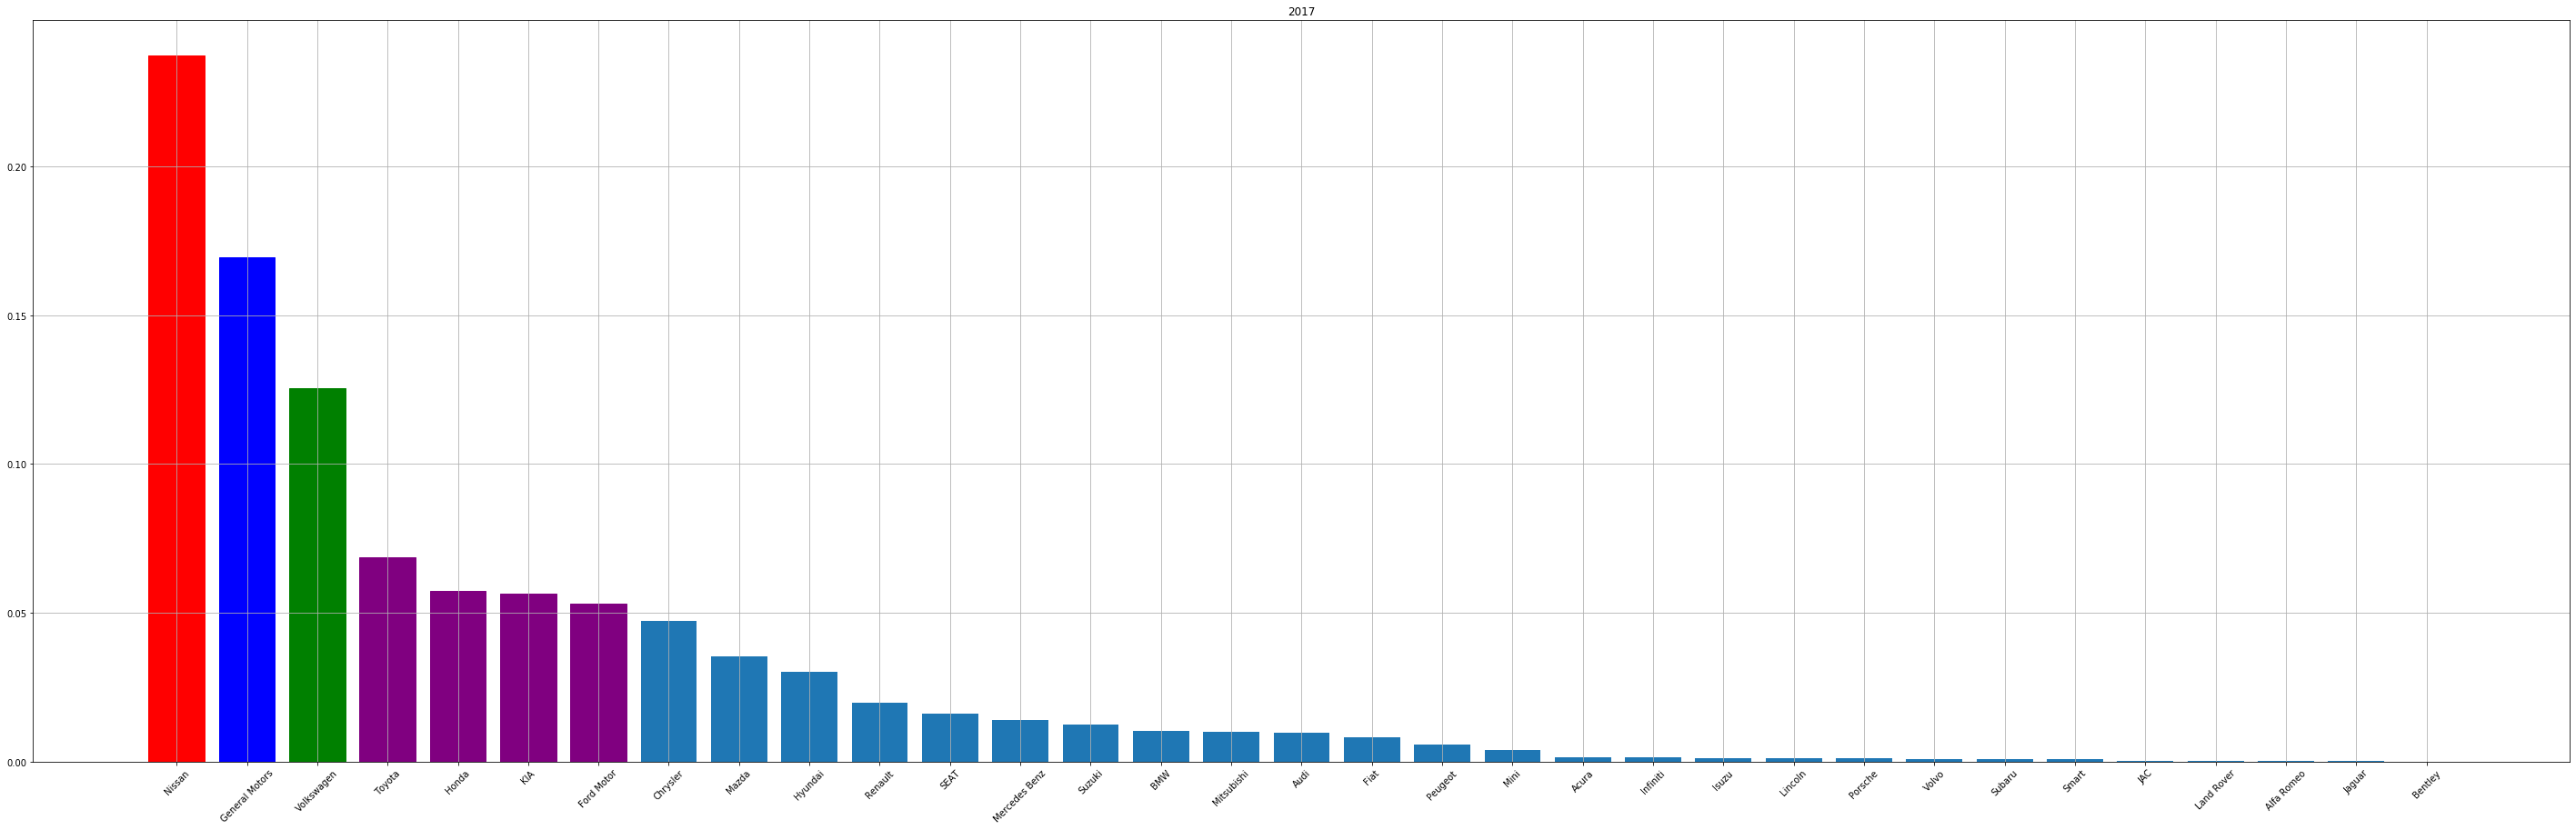

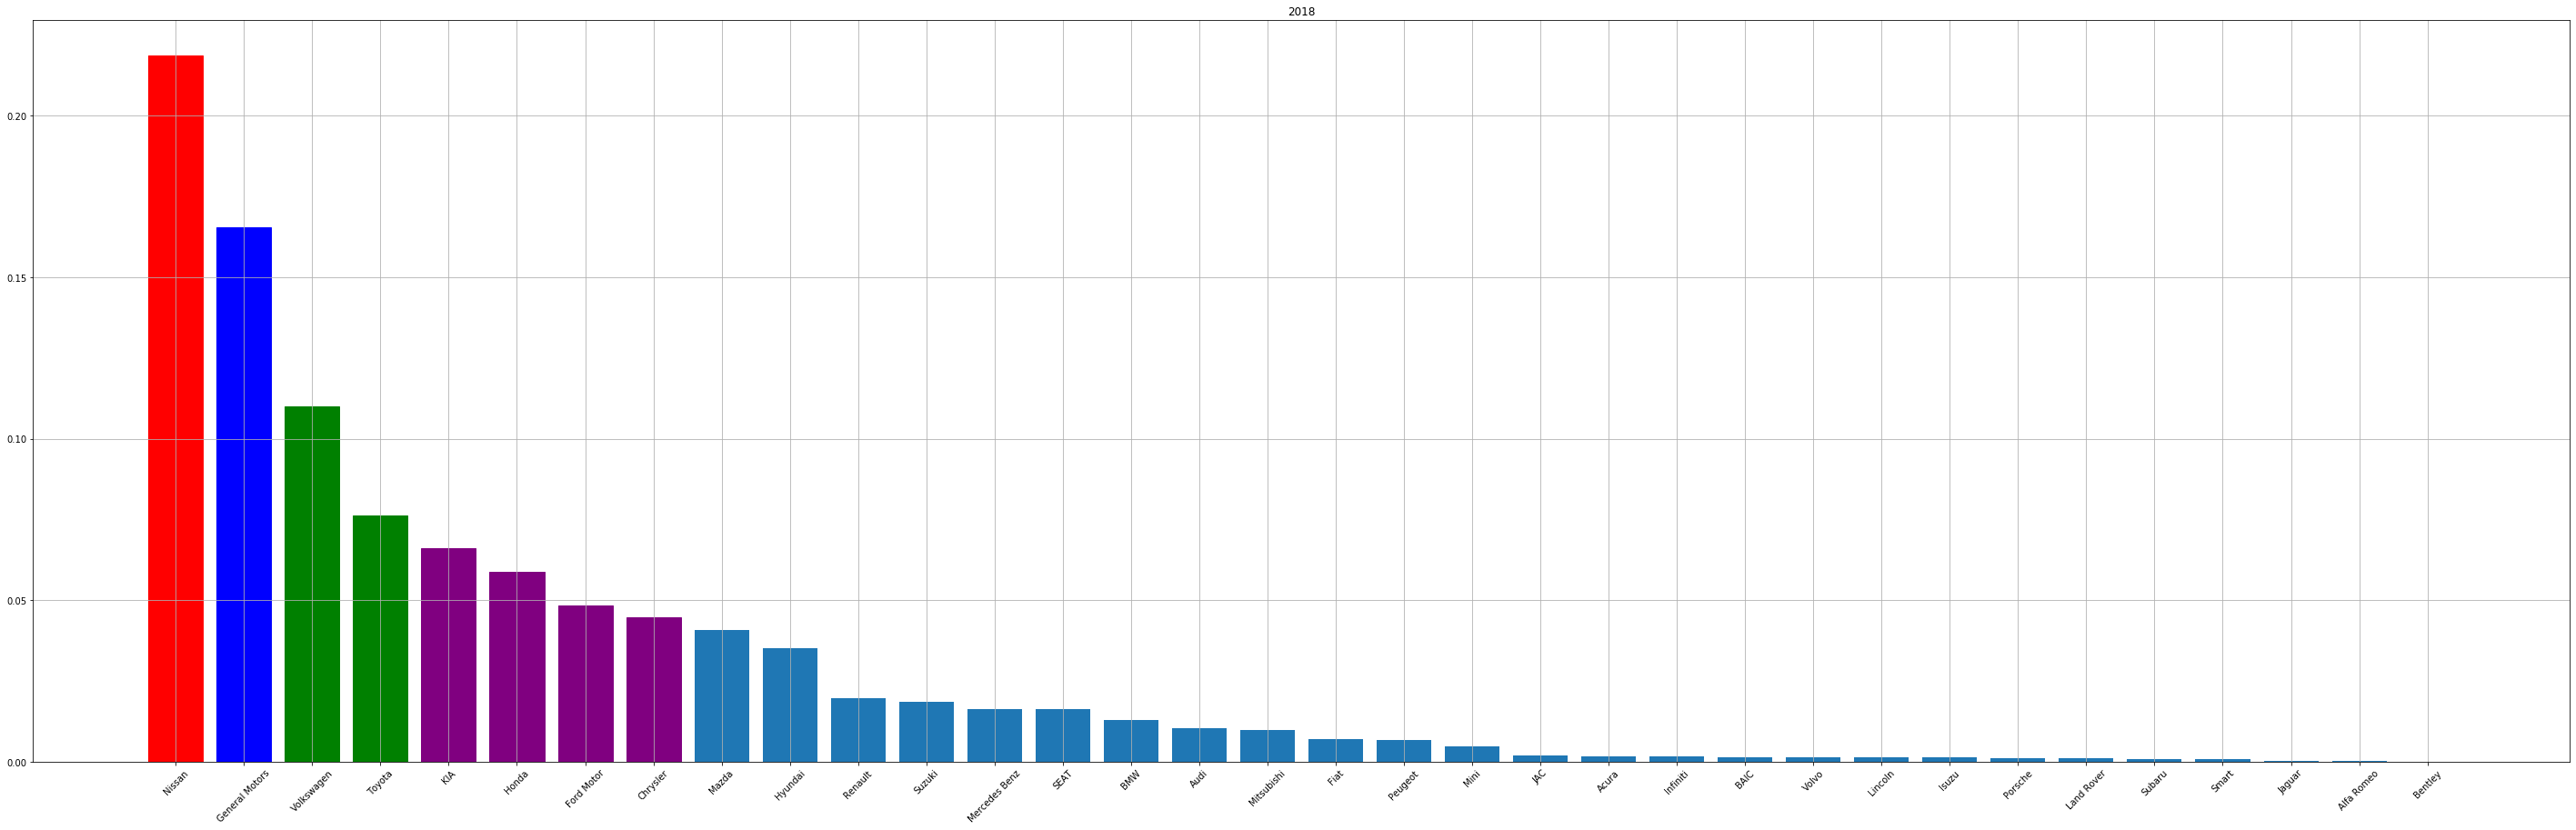

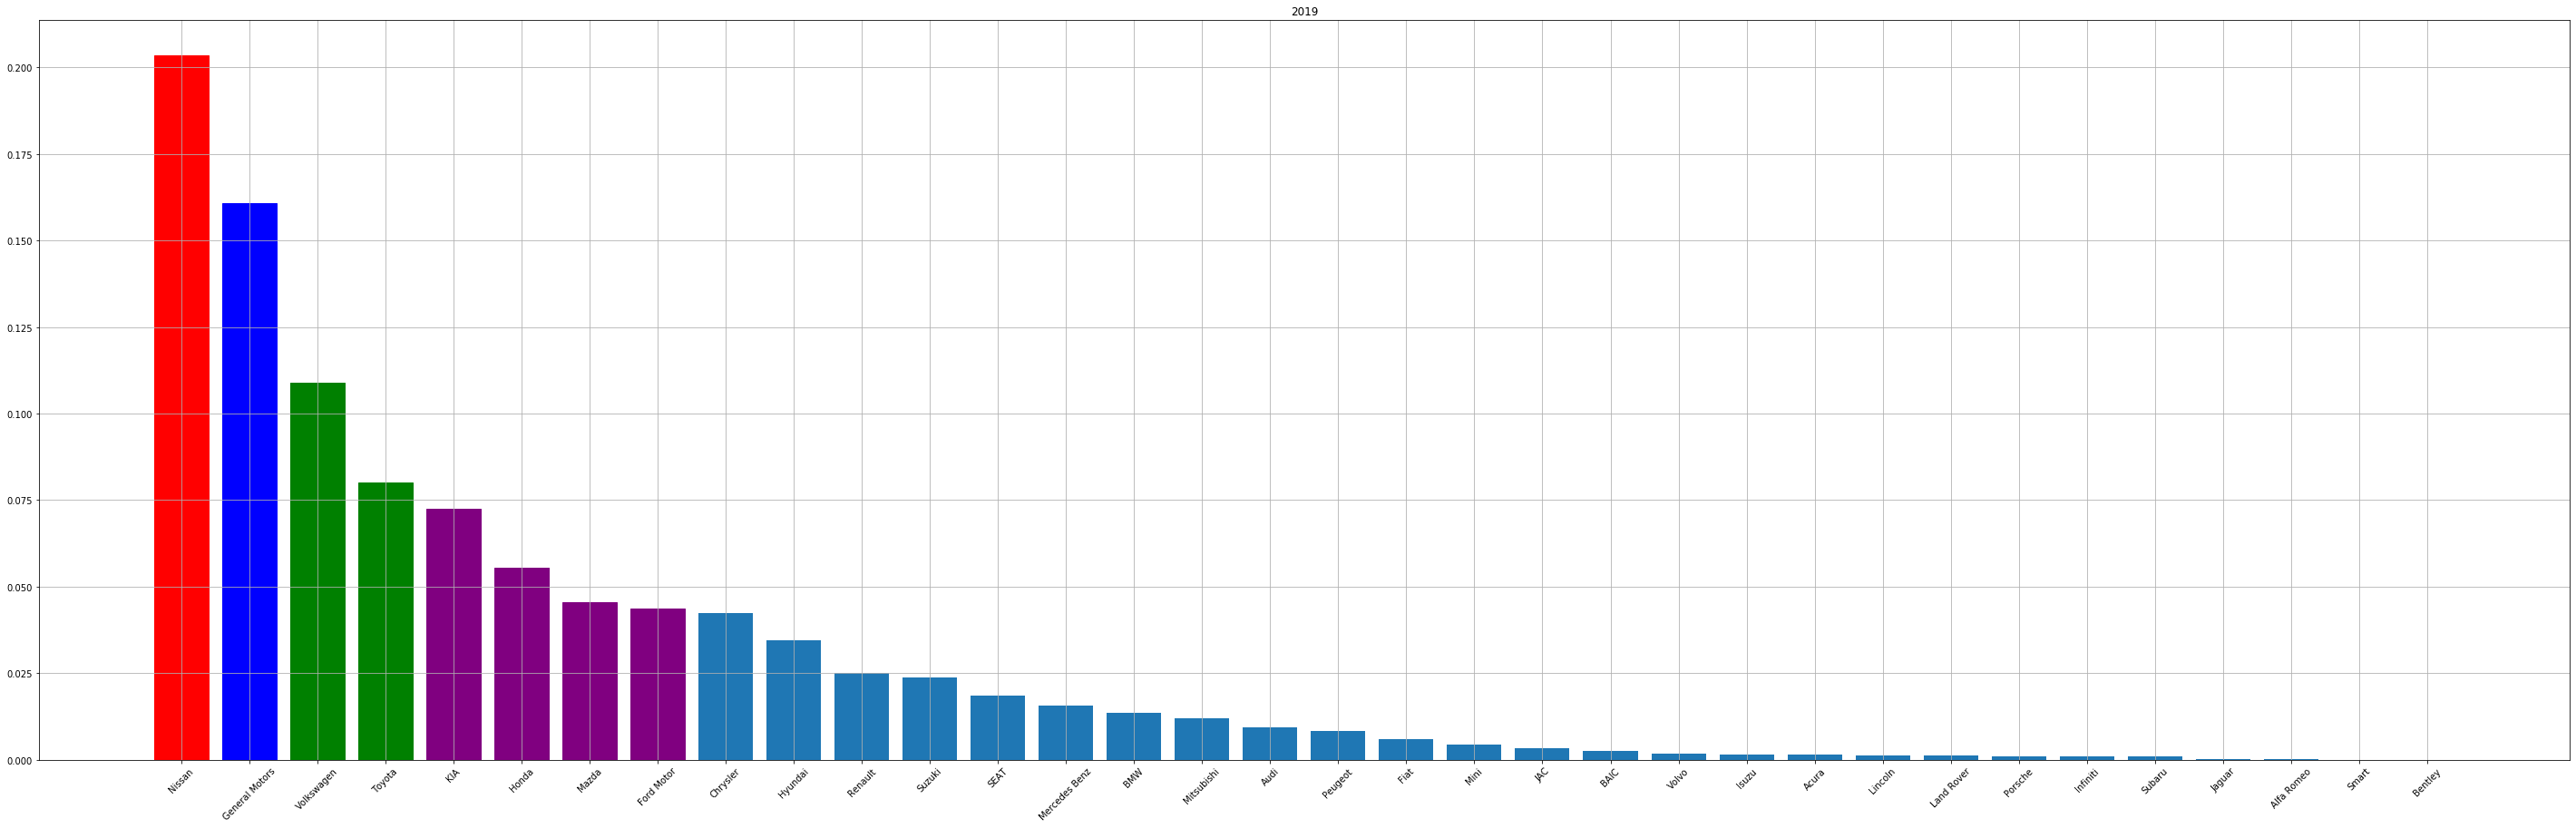

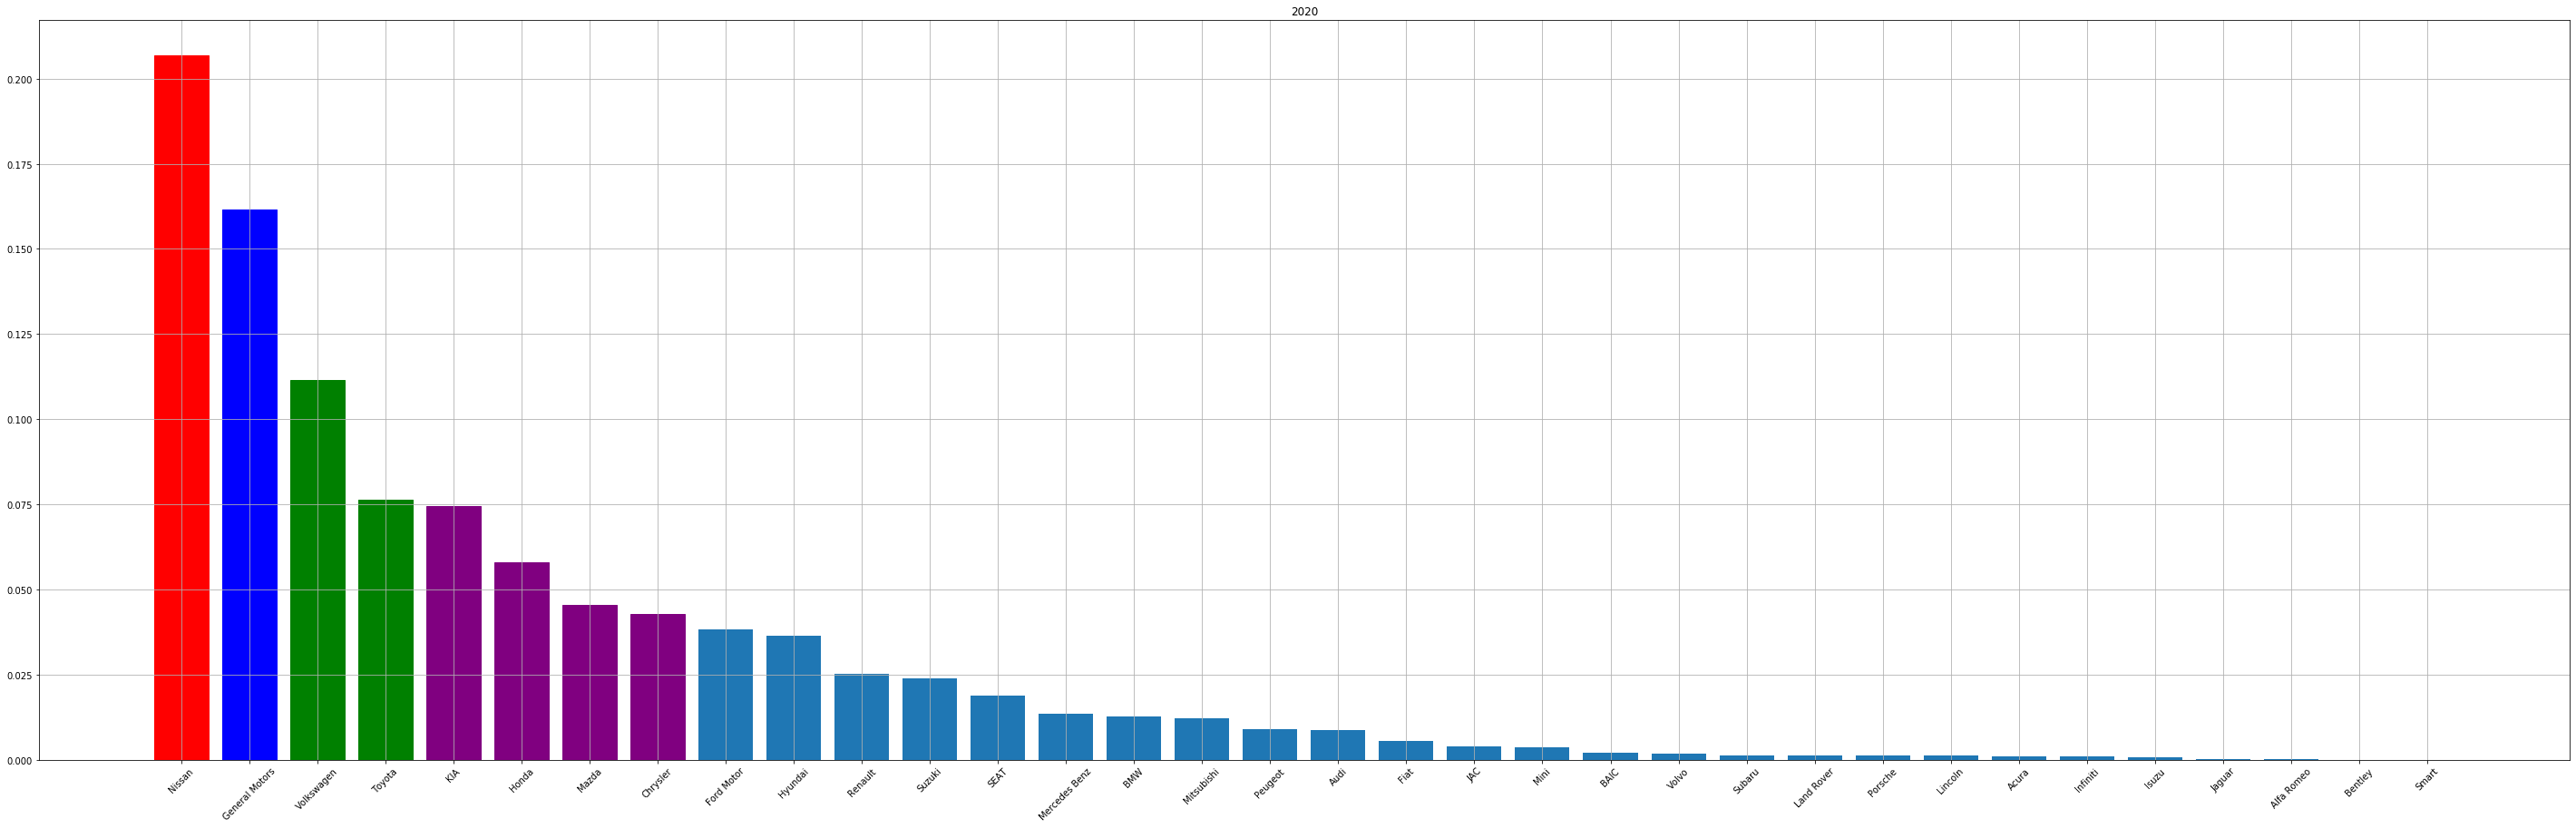

In [338]:
yeartotals = df.groupby(["año"])["cantidad"].sum().reset_index()
percetangeOfSells = {}
colors = [[0.1,"red"],[0.25,"blue"],[0.5,"green"],[0.75,"purple"]]
for i,year in enumerate(uniques["año"]):
    plt.figure(figsize=(50,15))
    yearTotal = yeartotals[yeartotals["año"] == year]["cantidad"]
    filtered = topbrands[year].sort_values(by="cantidad",ascending=False)
    y = filtered["cantidad"].apply(lambda x: x/yearTotal).values.reshape(-1)
    x = filtered["marca"]
    percetangeOfSells[year] = filtered
    plt.title(year)
    bars = plt.bar(x,y)#,label=x)
    total = 0
    for i,val in enumerate(y):
        for color in colors:
            if total < color[0]:
                bars[i].set_color(color[1])
                break
        total += val
    plt.grid()
    #plt.legend(title=year)
    plt.xticks(rotation=45)
    _ = plt.savefig(f"figs/mostsellingbrands/{year}.png")
plt.show(block=False)

## The seasonality of the car selling

In [340]:
modelYearGrouped2 =  df.groupby(["mes"]).mean().reset_index().sort_values(by="mes")["cantidad"]
count =  df.groupby(["mes"]).count().reset_index().sort_values(by="mes")["cantidad"]

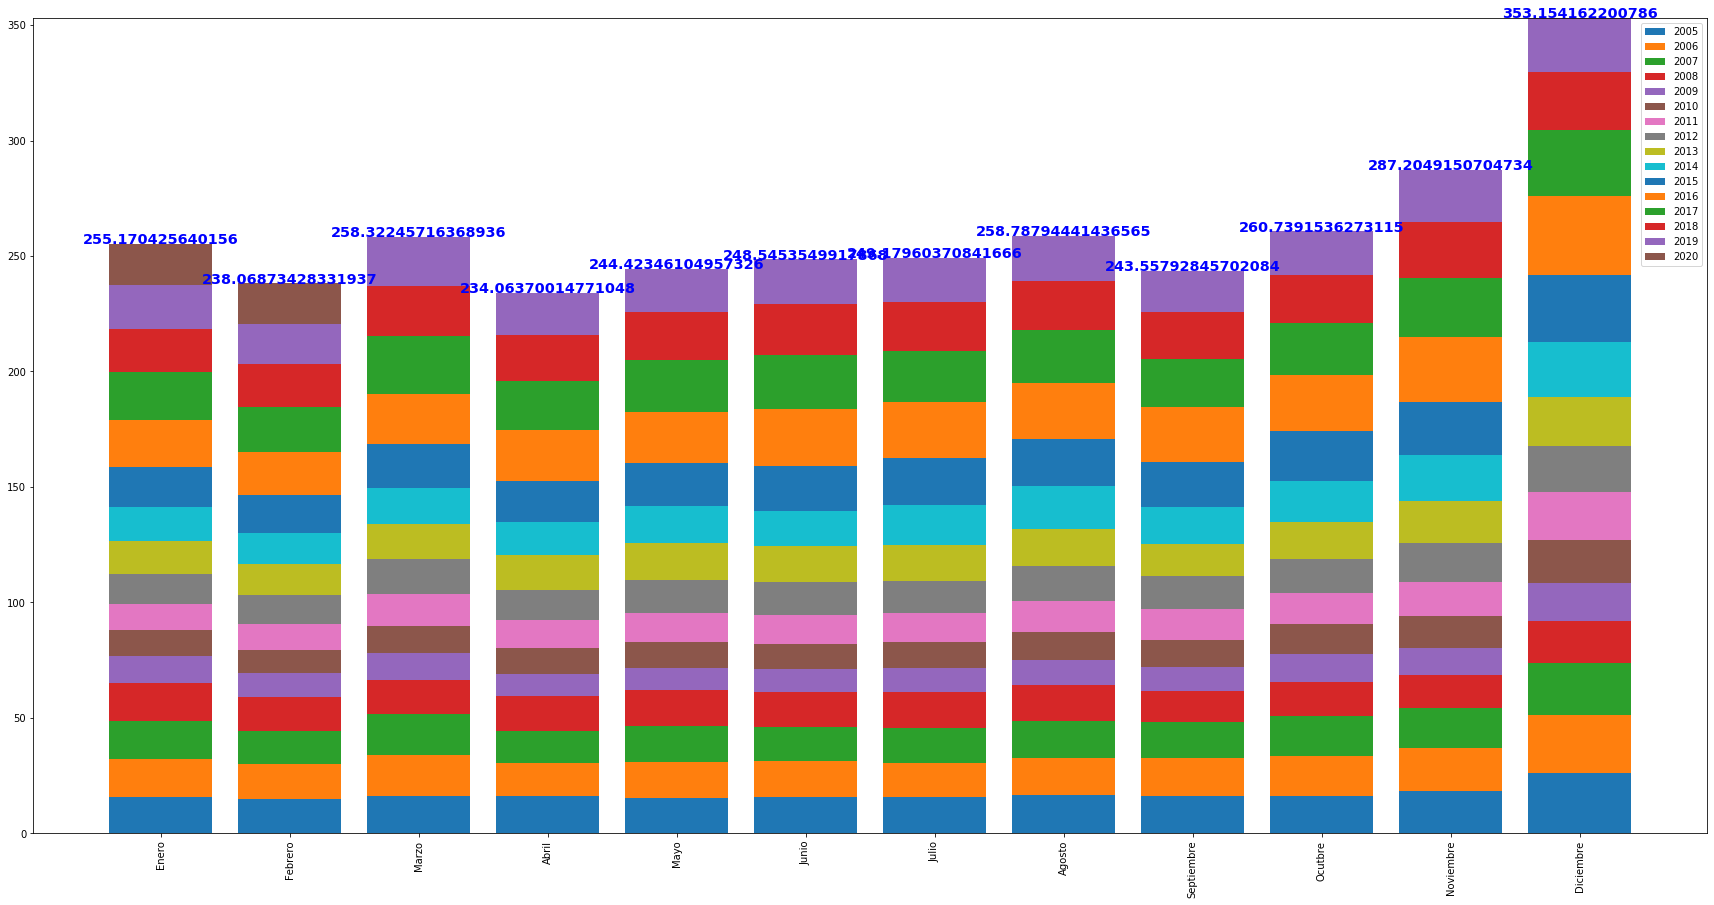

In [342]:
plt.figure(figsize=(30,15))
bottom = None
months = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Ocutbre","Noviembre","Diciembre"]
for i,year in enumerate(uniques["año"]):
    filtered = df[df["año"] == year]
    filtered = filtered.groupby(["mes"])["cantidad"].sum().reset_index().sort_values(by="mes")
    y = np.divide(filtered["cantidad"].values,count.values[:len(filtered)])
    y = np.array(list([(y[i] if i < len(y) else 0) for i in range(12)]))
    x = months
    if bottom is None:
        plt.bar(x,y,label=year)
        bottom = np.array(list([ j for j in y]))
    else:
        try:
            plt.bar(x,y,bottom=bottom,label=year)
        except Exception as e:
            print(e,x,y,bottom, np.shape(x),np.shape(y),np.shape(bottom))
        bottom += np.array(list([ j for j in y]))
    

for i, v in enumerate(modelYearGrouped2):
    plt.text(i, v, f"{v}", color='blue',ha="center", fontsize="x-large",fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.savefig("figs/monthly_selling_mean.png")



## Historic of the selling per brand each month

In [348]:
brandGrouped = df.groupby(["marca","MMYYYY"])["cantidad"].sum().reset_index()

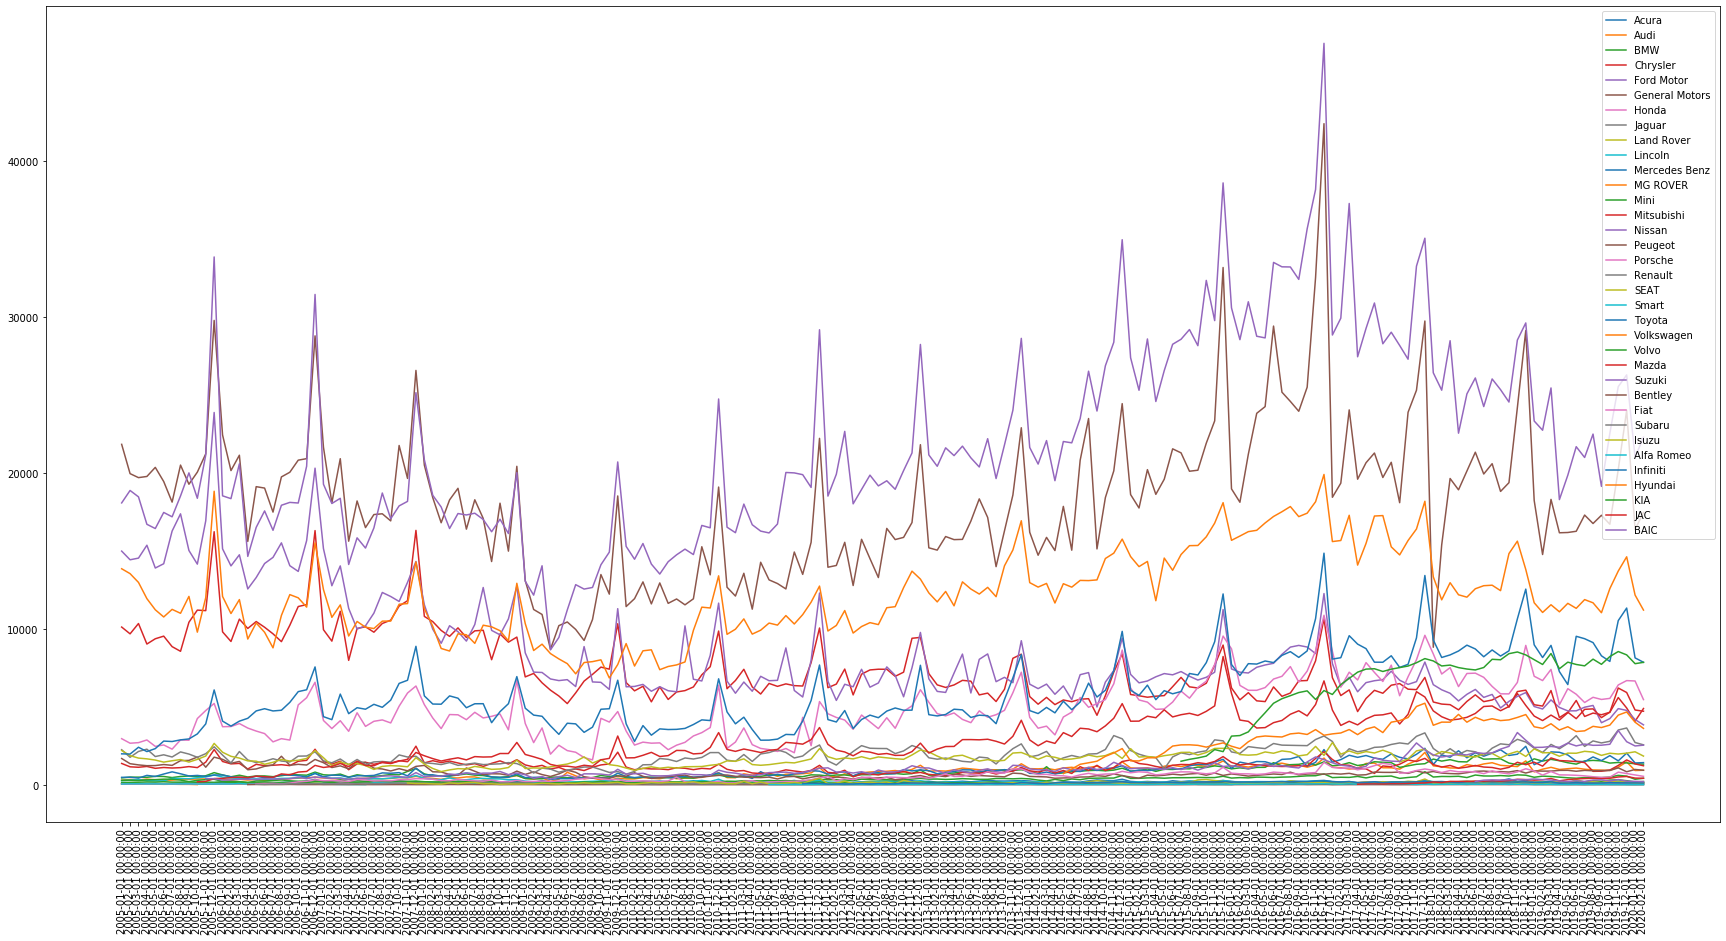

In [354]:
plt.figure(figsize=(30,15))
for brand in uniques["marca"]:
    filtered = brandGrouped[brandGrouped["marca"] == brand].sort_values(by="MMYYYY")
    y = filtered["cantidad"]
    x = list(map(lambda x: str(x),filtered["MMYYYY"]))
    plt.plot(x,y,label=brand)
    plt.legend()
    plt.xticks(rotation=90)
plt.savefig("figs/brands_car_selling_historic.png")

## Historic of top 10 selling brand each month 

In [359]:
brandYearlyGrouped = df.groupby(["marca","año"])["cantidad"].sum().reset_index()
top10brands = {}
for year in uniques["año"]:
    top10brands[year] = brandYearlyGrouped[brandYearlyGrouped["año"] == year].sort_values(by="cantidad",ascending=False)[:10].reset_index()

In [360]:
topbrands = set()
for year in uniques["año"]:
    topbrands = topbrands.union(set(top10brands[year]["marca"]))
topbrands

{'Chrysler',
 'Ford Motor',
 'General Motors',
 'Honda',
 'Hyundai',
 'KIA',
 'Mazda',
 'Mitsubishi',
 'Nissan',
 'Peugeot',
 'Renault',
 'SEAT',
 'Toyota',
 'Volkswagen'}

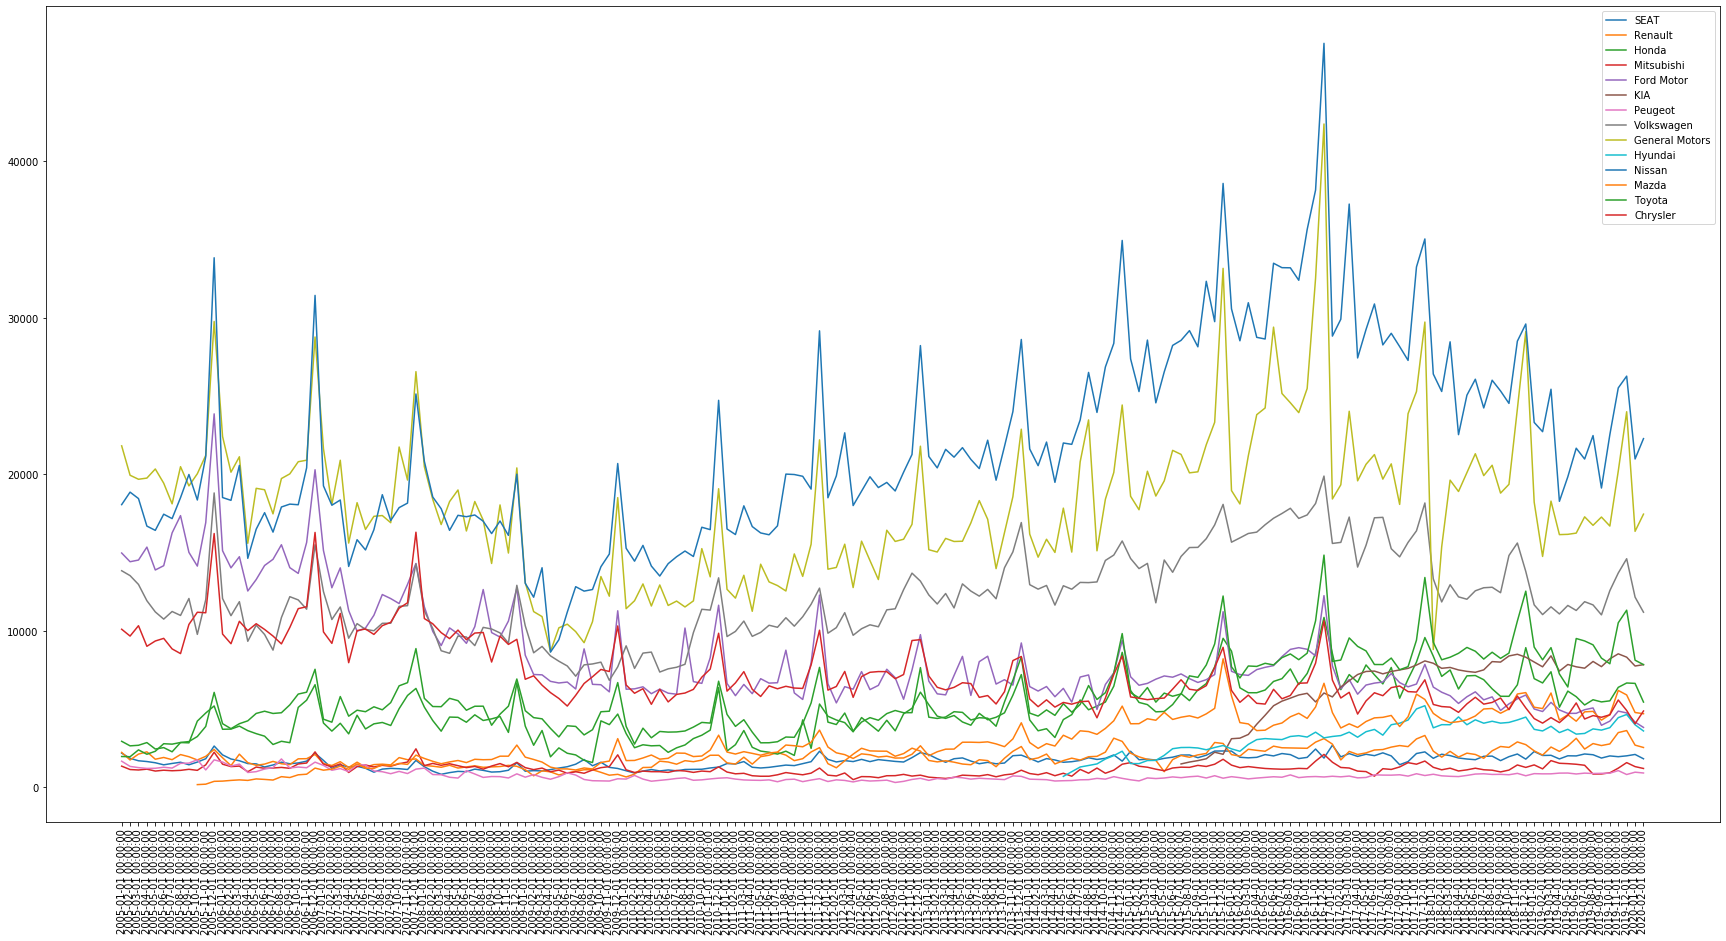

In [361]:
plt.figure(figsize=(30,15))
for brand in topbrands:
    filtered = brandGrouped[brandGrouped["marca"] == brand].sort_values(by="MMYYYY")
    y = filtered["cantidad"]
    x = list(map(lambda x: str(x),filtered["MMYYYY"]))
    plt.plot(x,y,label=brand)
    plt.legend()
    plt.xticks(rotation=90)
plt.savefig("figs/top_10_brands_car_selling_historic.png")